In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import collections
from wordcloud import WordCloud

from eunjeon import Mecab
from konlpy.tag import Okt


In [3]:
import matplotlib.font_manager as fm
font_list = [font.name for font in fm.fontManager.ttflist]
# print(font_list)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 키워드 : 1번 데이터

In [4]:
number1 = pd.read_csv('D:\PY4E\DS\snsscrape/1번_라벨링.csv')
number1.describe()

,Unnamed: 0,Like Count,pred
count,136.000000,136.000000,136.000000
mean,87.794118,27.669118,0.750000
std,46.310245,149.165533,0.434613
min,12.000000,0.000000,0.000000
25%,48.750000,0.000000,0.750000
50%,84.500000,0.000000,1.000000
75%,125.250000,2.000000,1.000000
max,179.000000,1389.000000,1.000000


## USERNAME 분석: 트윗을 가장 많이 작성한 User TOP 20

In [5]:
# 총 Username 갯수
number1['Username'].nunique()

81

In [6]:
# 총 유저의 트윗 작성 갯수 및 평균 갯수
total_user = number1['Username'].value_counts()
total_user.describe()

count    81.000000
mean      1.679012
std       2.166952
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      14.000000
Name: Username, dtype: float64

In [7]:
# Top20 유저의 총 트윗 작성 갯수 및 평균 갯수
top20_user = number1['Username'].value_counts()[:20]
print(top20_user.describe(), top20_user)


count    20.000000
mean      3.750000
std       3.711646
min       1.000000
25%       2.000000
50%       2.000000
75%       4.000000
max      14.000000
Name: Username, dtype: float64 drpDv7PZvAYXlKw    14
llll00279937       13
chickahoy69         7
siwalrea13          6
ladyofjuli          4
LuisU1287           4
sannyashin          4
byeongchunyang      3
DawnBreaks_KR       2
jobsul              2
joobilate           2
KANGDJELLO          2
WiseManU            2
krazyeom            2
YB09506239          2
semilee98           2
chnletoile          1
free_fly_top        1
Sechzhona           1
pjmin1220           1
Name: Username, dtype: int64


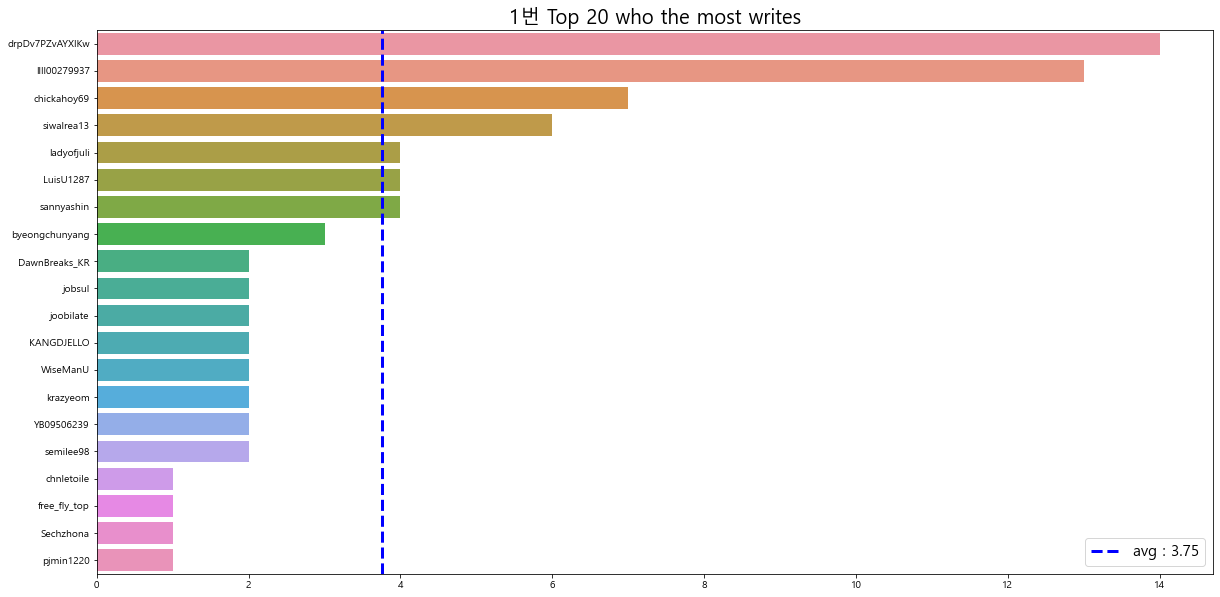

In [8]:
# print(number1['Username'].value_counts()[:20])
plt.figure(figsize=(20,10))
sns.barplot(x=number1['Username'].value_counts()[:20].values, 
            y=number1['Username'].value_counts()[:20].index, orient='h')
plt.title('1번 Top 20 who the most writes', fontsize=20)
avg = number1['Username'].value_counts()[:20].mean()
plt.axvline(x=np.average(number1['Username'].value_counts()[:20].values), color='b', linestyle='--', linewidth=3, label=f'avg : {avg}')
plt.legend(fontsize=15)
plt.show()


In [9]:
find_user1 = number1[number1['Username'] == 'drpDv7PZvAYXlKw'].reset_index(drop = True)
find_user2 = number1[number1['Username'] == 'llll00279937'].reset_index(drop = True)
find_user3 = number1[number1['Username'] == 'chickahoy69'].reset_index(drop = True)
find_user3 = number1[number1['Username'] == 'siwalrea13'].reset_index(drop = True)
#컬러 매핑하여 보기 쉽게.
find_user2.style.background_gradient(cmap='Blues')

,Unnamed: 0,Datetime,Username,Like Count,Text,pred
0,114,2022-03-01,llll00279937,1,#일잘하는_이재명_1번 💙1번💙,1
1,115,2022-03-01,llll00279937,1,#일잘하는_이재명_1번 이재명이 답이다,1
2,116,2022-03-01,llll00279937,1,#일잘하는_이재명_1번 1번 찍자,1
3,117,2022-03-01,llll00279937,0,#일잘하는_이재명_1번 사전투표 꼭 합시다,1
4,118,2022-03-01,llll00279937,1,#일잘하는_이재명_1번 일잘하는 이재명,1
5,119,2022-03-01,llll00279937,1,#일잘하는_이재명_1번 유능한 이재명,1
6,120,2022-03-01,llll00279937,1,#일잘하는_이재명_1번 1번,1
7,121,2022-03-01,llll00279937,1,#일잘하는_이재명_1번 1번 뽑자.사전투표 합시다,1
8,122,2022-03-01,llll00279937,1,#일잘하는_이재명_1번,1
9,123,2022-03-01,llll00279937,0,#일잘하는_이재명_1번 무능한 사람을 뽑을건가요? 유능하고 일잘하는사람을 뽑을 건가요?,0


In [10]:
# 데이터 png로 추출
dfi.export(find_user1.style.background_gradient(cmap='Blues'), './graph\images/1번 top username table1.png', max_cols=-1, max_rows=-1)
dfi.export(find_user2.style.background_gradient(cmap='Blues'), './graph\images/1번 top username table2.png', max_cols=-1, max_rows=-1)

C:\Users\USER\anaconda3\envs\twitterscrape\lib\site-packages\dataframe_image\_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'


## TEXT 분포 분석 : 트윗 TEXT 길이 분포 확인
- Text의 길이로 트윗의 유효성 및 유의미한 데이터인지 확인 할 수 있다.

In [11]:
# Number of characters in tweets
def length(text):    
    '''a function which returns the length of text'''
    return len(text)

In [12]:
''' 문장 데이터 밀집 분석 '''
#Number of characters in tweets
def length(text):    
    '''a function which returns the length of text'''
    return len(text)
number1['Length'] = number1['Text'].apply(length)
number1



,Unnamed: 0,Datetime,Username,Like Count,Text,pred,Length
0,12,2022-03-09,the_b017,2,;- 1번 뽑혔을때 ...,0,57
1,13,2022-03-09,Ruee_3012,0,#상큼발랄하게~#오늘도~#1번 ! #이러기,0,23
2,14,2022-03-09,huaaaaang1,0,#1번 뽑고 멋지게 떡쳐라 !!!,1,18
3,15,2022-03-09,sunday0317,82,“이재명후보 믿고 여기까지 왔습니다!!” 민주당은 박지현씨를 철저하게 지켜주고 지...,1,78
4,17,2022-03-09,semilee98,0,오늘은 세계 여성의 날 입니다. 인류 역사상 여성들은 항상 역사의 그늘에 가려져 있...,0,117
...,...,...,...,...,...,...,...
131,170,2022-02-17,sena77kim,0,#일을하고싶은 #1번_이재명,0,16
132,171,2022-02-17,yj6747,0,_ _ #1번 #울림마트,1,21
133,174,2022-02-15,jobsul,0,여러분 1번입니다. 1번을 찍어야 나라가 삽니다. #윤석열 #1번,1,39
134,175,2022-02-15,subsky888,0,"2월 일(화)""선거운동 첫 날"" 눈이 내리는 선거운동 첫 날! 운동원으로 등록하...",1,142


C:\Users\USER\anaconda3\envs\twitterscrape\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\envs\twitterscrape\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


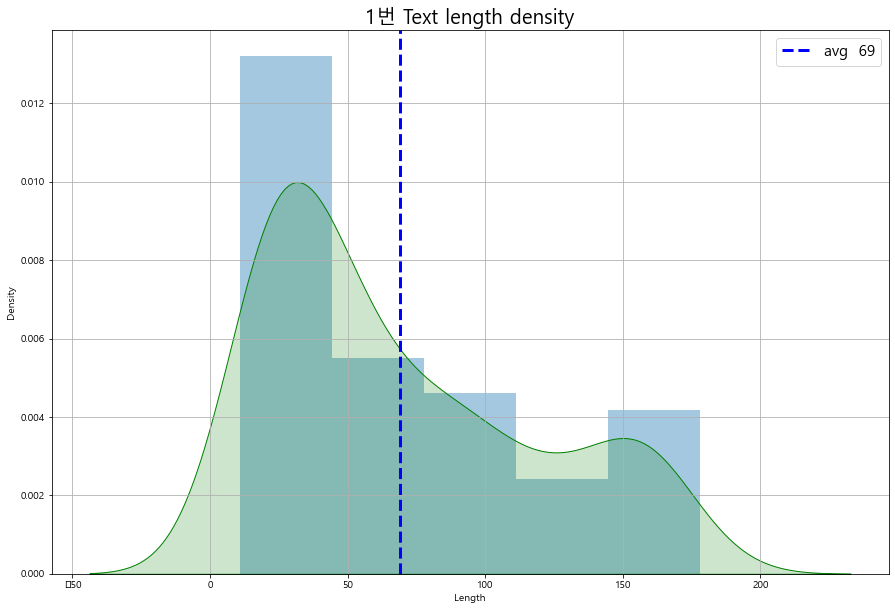

In [13]:
plt.figure(figsize=(15,10))
plt.grid()
sns.distplot(a= number1['Length'], bins=5, kde=True, kde_kws={"color":"g", "alpha":0.2, "linewidth":1, "shade":True})
x_label = int(np.average(number1['Length']))
plt.axvline(x=np.average(number1['Length']), color='b', linestyle='--', linewidth=3, label=f'avg  {x_label}')
plt.legend(fontsize=15)
plt.title("1번 Text length density", fontsize=20)

plt.show()
# save_fig('Text length distribution')

## USERNAME 분석: 트윗을 가장 많이 작성한 User TOP 20

In [14]:
number1['Length'] = number1['Text'].apply(length)
number1['Length'].describe()


count    136.000000
mean      69.044118
std       48.773683
min       11.000000
25%       28.000000
50%       52.000000
75%      101.000000
max      178.000000
Name: Length, dtype: float64

In [15]:
# 긍정데이터 describe
pos_char_length = number1[number1['pred'] == 1]['Length']
pos_char_length.describe()

count    102.000000
mean      62.294118
std       44.942557
min       11.000000
25%       26.000000
50%       48.000000
75%       87.750000
max      164.000000
Name: Length, dtype: float64

In [16]:
# 부정데이터 describe
neg_char_length = number1[number1['pred'] == 0]['Length']
neg_char_length.describe()

count     34.000000
mean      89.294118
std       54.649034
min       16.000000
25%       41.250000
50%       79.000000
75%      133.250000
max      178.000000
Name: Length, dtype: float64

## HASHTAG 분석 : 어떤 해시태그가 사용되었는지 확인

In [17]:
hashs = number1[number1['Text'].apply(lambda x : x.startswith('#'))]
print(hashs)
hashs['Text'] = hashs['Text'].str.split('\n').apply(lambda x : [i for i in x if i.startswith('#') ])
hashs['Text'] = hashs['Text'].apply(lambda x: ' '.join(x))
hashs['Text'] = hashs['Text'].str.split(' ').apply(lambda x : [i for i in x if i.startswith('#') ])


     Unnamed: 0    Datetime         Username  Like Count  \
1            13  2022-03-09        Ruee_3012           0   
2            14  2022-03-09       huaaaaang1           0   
6            19  2022-03-09       Kirajang79           0   
13           26  2022-03-08  drpDv7PZvAYXlKw          96   
16           29  2022-03-08  drpDv7PZvAYXlKw           0   
24           38  2022-03-08      toureve_pmj           0   
26           40  2022-03-08  drpDv7PZvAYXlKw           0   
34           49  2022-03-06       Gaia220309           0   
41           57  2022-03-06  drpDv7PZvAYXlKw           0   
42           58  2022-03-06          son1501          24   
46           62  2022-03-05    DawnBreaks_KR           0   
47           63  2022-03-05    DawnBreaks_KR           0   
54           71  2022-03-05  drpDv7PZvAYXlKw           0   
55           72  2022-03-05  drpDv7PZvAYXlKw           1   
60           77  2022-03-05      jeonghanul4         478   
62           79  2022-03-05       ladyof

C:\Users\USER\AppData\Local\Temp\ipykernel_18884\22371054.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hashs['Text'] = hashs['Text'].str.split('\n').apply(lambda x : [i for i in x if i.startswith('#') ])
C:\Users\USER\AppData\Local\Temp\ipykernel_18884\22371054.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hashs['Text'] = hashs['Text'].apply(lambda x: ' '.join(x))
C:\Users\USER\AppData\Local\Temp\ipykernel_18884\22371054.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [18]:
# 단어 주머니 만들기
word_of_Bag = sum(hashs['Text'], [])
print(word_of_Bag)

['#상큼발랄하게~#오늘도~#1번', '#이러기', '#1번', '#나를위해', '#나라를위해', '#1번', '#이재명', '#대통령', '#지지합니다', '#이재명', '#경제대통령', '#1번', '#밭갈기', '#투표로말해요', '#청계광장', '#파랗을물들이다', '#이재명', '#1번', '#투표합시다', '#유능한경제대통령', '#누굴찍을지_고민되신다면', '#이번에는', '#1번', '#재명이입니다', '#명심하세요', '#당신의_소중한_한표가_필요합니다', '#이재명의_공약이_실현되도록', '#꼭투표해주십시오', '#이재명', '#1번', '#이재명', '#내삶을바꿀사람', '#경제대통령', '#김종배', '#사전투표', '#이재명', '#1번', '#경제대통령', '#이재명', '#1번', '#경제대통령', '#밭갈기가답이다', '#1번_우리의_미래입니다', '#부산도이재명입니다', '#1번', '#기표된', '#투표용지발견', '#1번', '#이재명', '#미리찍어놓은', '#투표용지발견', '#나를위해', '#1번', '#이재명', '#이재명', '#1번', '#류근', '#나를위해', '#사전투표', '#싱크유스', '#나를위해1', '#이재명', '#1번', '#사전투표', '#이재명', '#1번', '#사전투표', '#이재명', '#1번', '#간절함이곧승리', '#이재명', '#1번', '#사전투표', '#나를위해이재명', '#1번', '#이재명', '#경제대통령', '#사전투표', '#국민과단일화', '#안철수', '#1번', '#이재명', '#1번', '#나를위해_이재명', '#재외국민투표_일본', '#1번', '#대한민국만세', '#안철수', '#1번', '#1번', '#일잘하는_이재명_1번', '#일잘하는_이재명_1번', '#일잘하는_이재명_1번', '#일잘하는_이재명_1번', '#일잘하는_이재명_1번', '#일잘하는_이재명_1번', '#일잘하는_이재명_1번', '#일잘하는_이재명_1번', '#일잘하는_이재명_1번', '#일

C:\Users\USER\anaconda3\envs\twitterscrape\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


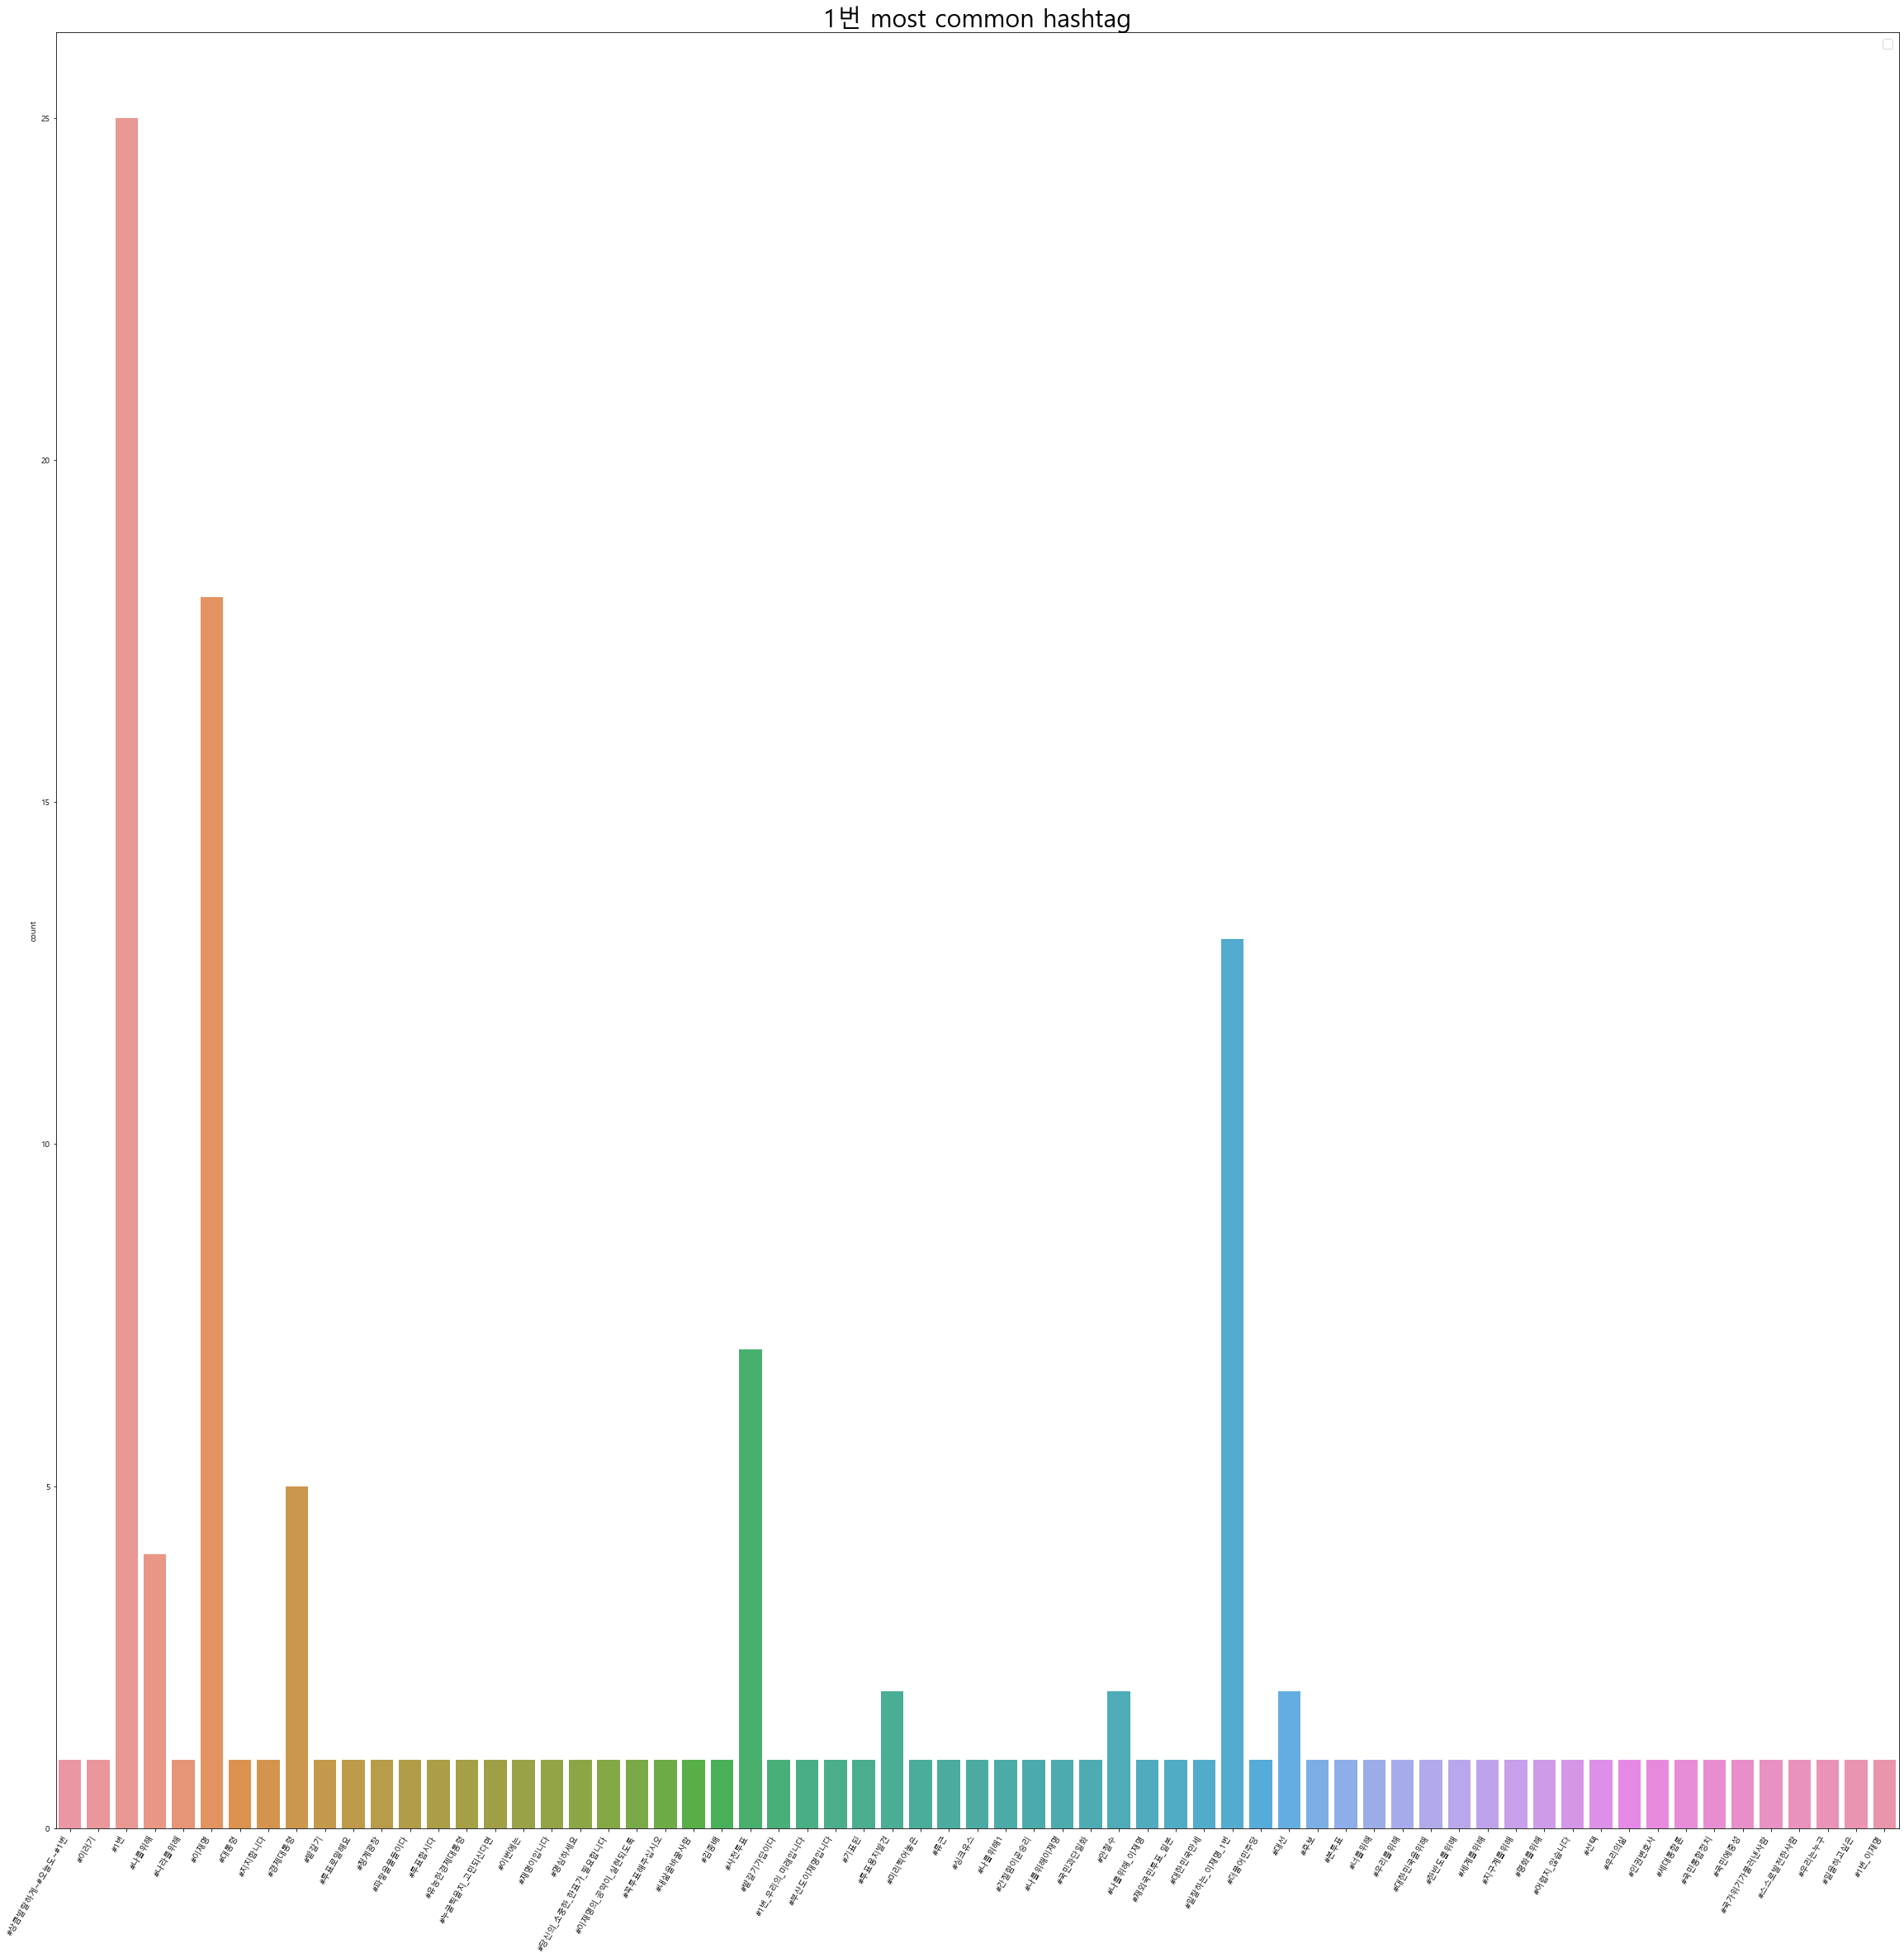

In [19]:
# 가장 많이 사용된 해시태그 그래프
plt.figure(figsize=(40,40))
plot = sns.countplot(word_of_Bag)
plot.set_xticklabels(plot.get_xticklabels(), rotation=60, horizontalalignment='right')
plt.title('1번 most common hashtag', fontsize=30)
plt.legend(fontsize=15)
plt.show()

### 해시태그 top10 확인

In [20]:
import operator
w_count={}
for n in word_of_Bag:
    try: w_count[n] += 1
    except: w_count[n] = 1
w_count
ww = sorted(w_count.items(), key=operator.itemgetter(1), reverse=True)
# ww[0][0]
# ww[0][1]
ww[:10]

[('#1번', 25),
 ('#이재명', 18),
 ('#일잘하는_이재명_1번', 13),
 ('#사전투표', 7),
 ('#경제대통령', 5),
 ('#나를위해', 4),
 ('#투표용지발견', 2),
 ('#안철수', 2),
 ('#대선', 2),
 ('#상큼발랄하게~#오늘도~#1번', 1)]

In [21]:
why1 = hashs[hashs['Text'].str.contains('안철수')]
dfi.export(why1.style.background_gradient(cmap='Blues'), './graph\images/1번 hashtag.png', max_cols=-1, max_rows=-1)
why1

KeyError: "None of [Float64Index([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,\n              nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,\n              nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,\n              nan, nan],\n             dtype='float64')] are in the [columns]"

In [ ]:
why2 = hashs[hashs['Text'].str.contains('투표용지발견')]
dfi.export(why2.style.background_gradient(cmap='Blues'), './graph\images/1번 hashtag why2.png', max_cols=-1, max_rows=-1)
why2

C:\Users\USER\anaconda3\envs\twitterscrape\lib\site-packages\dataframe_image\_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'


,Unnamed: 0,Datetime,Username,Like Count,Text,pred
46,62,2022-03-05,DawnBreaks_KR,0,#1번 #기표된 #투표용지발견 [사전투표] 특정후보 기표된 용지 배부…항의에 투표 ...,1
47,63,2022-03-05,DawnBreaks_KR,0,#1번 #이재명 #미리찍어놓은 #투표용지발견 되다,0


In [ ]:
why3 = hashs[hashs['Text'].str.contains('일잘하는_이재명')]
dfi.export(why3.style.background_gradient(cmap='Blues'), './graph\images/1번 hashtag why3.png', max_cols=-1, max_rows=-1)
why3

C:\Users\USER\anaconda3\envs\twitterscrape\lib\site-packages\dataframe_image\_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'


,Unnamed: 0,Datetime,Username,Like Count,Text,pred
90,114,2022-03-01,llll00279937,1,#일잘하는_이재명_1번 💙1번💙,1
91,115,2022-03-01,llll00279937,1,#일잘하는_이재명_1번 이재명이 답이다,1
92,116,2022-03-01,llll00279937,1,#일잘하는_이재명_1번 1번 찍자,1
93,117,2022-03-01,llll00279937,0,#일잘하는_이재명_1번 사전투표 꼭 합시다,1
94,118,2022-03-01,llll00279937,1,#일잘하는_이재명_1번 일잘하는 이재명,1
95,119,2022-03-01,llll00279937,1,#일잘하는_이재명_1번 유능한 이재명,1
96,120,2022-03-01,llll00279937,1,#일잘하는_이재명_1번 1번,1
97,121,2022-03-01,llll00279937,1,#일잘하는_이재명_1번 1번 뽑자.사전투표 합시다,1
98,122,2022-03-01,llll00279937,1,#일잘하는_이재명_1번,1
99,123,2022-03-01,llll00279937,0,#일잘하는_이재명_1번 무능한 사람을 뽑을건가요? 유능하고 일잘하는사람을 뽑을 건가요?,0


## N-gram 분석
	모델명	                        구현 결과
1	Unigram(N=1)	오늘, 점심, 추천, 메뉴, 파스타, 피자

2	Bigram(N=2)	오늘 점심, 점심 추천, 추천 메뉴, 메뉴 파스타, 파스타, 피자

3	Trigram(N=3)	오늘 점심 추천, 점심 추천 메뉴, 추천 메뉴 파스타, 메뉴 파스타 피자

4	4-gram(N=4)	오늘 점심 추천 메뉴, 점심 추천 메뉴 파스타, 추천 메뉴 파스타 피자

In [ ]:
n_gram_df = number1['Text'].str.split()
n_gram_df = n_gram_df.values.tolist()
n_gram_df

[[';-', '1번', '뽑혔을때', '2번', '뽑혔을때-', ';'],
 ['#상큼발랄하게~#오늘도~#1번', '!', '#이러기'],
 ['#1번', '뽑고', '멋지게', '떡쳐라', '!!!'],
 ['“이재명후보',
  '믿고',
  '여기까지',
  '왔습니다!!”',
  '민주당은',
  '박지현씨를',
  '철저하게',
  '지켜주고',
  '지원해줘야',
  '합니다!!!',
  '#박지현',
  '_',
  '_',
  '#1번',
  '#이재명'],
 ['오늘은',
  '세계',
  '여성의',
  '날',
  '입니다.',
  '인류',
  '역사상',
  '여성들은',
  '항상',
  '역사의',
  '그늘에',
  '가려져',
  '있었습니다.',
  '그러나',
  '이젠',
  '때가',
  '왔습니다.',
  '투표로',
  '진짜',
  '여성들의',
  '이야기를',
  '들을',
  '사람을',
  '#대통령',
  '으로',
  '만들어',
  '주세요.',
  '#1번',
  '#이재명'],
 ['화합을', '이야기', '하는', '사람이', '미래를', '만들', '수', '있습니다.', '#1번', '#이재명'],
 ['#나를위해', '#나라를위해', '🇰🇷', '#1번', '#이재명', '#대통령', '👍', '#지지합니다', '!!!'],
 ['이재명이였습니다....', '걱정', '마요,', '재명!', '#오늘은_이_뽑는_날', '#1번_이재명으로'],
 ['투표완료💙💙💙', '#1번', '#이재명'],
 ['기호', '1번', '이재명에게', '투표해주십이요.', '#1번.'],
 ['‘년',
  '초여름날',
  '성남으로',
  '이사가려고',
  '삼사일',
  '머물면서',
  '시장,',
  '택시,',
  '식당,',
  '수퍼에',
  '들려서',
  '직선적으로',
  '이재명',
  '시장님에',
  '대한',
  '생각을',
  '물었었다.',
  '모두가',
  '주저없이',
  '최

In [ ]:
ngram_words = [n for n in n_gram_df if len(n) > 1]
corpus = sum(ngram_words, [])
corpus

[';-',
 '1번',
 '뽑혔을때',
 '2번',
 '뽑혔을때-',
 ';',
 '#상큼발랄하게~#오늘도~#1번',
 '!',
 '#이러기',
 '#1번',
 '뽑고',
 '멋지게',
 '떡쳐라',
 '!!!',
 '“이재명후보',
 '믿고',
 '여기까지',
 '왔습니다!!”',
 '민주당은',
 '박지현씨를',
 '철저하게',
 '지켜주고',
 '지원해줘야',
 '합니다!!!',
 '#박지현',
 '_',
 '_',
 '#1번',
 '#이재명',
 '오늘은',
 '세계',
 '여성의',
 '날',
 '입니다.',
 '인류',
 '역사상',
 '여성들은',
 '항상',
 '역사의',
 '그늘에',
 '가려져',
 '있었습니다.',
 '그러나',
 '이젠',
 '때가',
 '왔습니다.',
 '투표로',
 '진짜',
 '여성들의',
 '이야기를',
 '들을',
 '사람을',
 '#대통령',
 '으로',
 '만들어',
 '주세요.',
 '#1번',
 '#이재명',
 '화합을',
 '이야기',
 '하는',
 '사람이',
 '미래를',
 '만들',
 '수',
 '있습니다.',
 '#1번',
 '#이재명',
 '#나를위해',
 '#나라를위해',
 '🇰🇷',
 '#1번',
 '#이재명',
 '#대통령',
 '👍',
 '#지지합니다',
 '!!!',
 '이재명이였습니다....',
 '걱정',
 '마요,',
 '재명!',
 '#오늘은_이_뽑는_날',
 '#1번_이재명으로',
 '투표완료💙💙💙',
 '#1번',
 '#이재명',
 '기호',
 '1번',
 '이재명에게',
 '투표해주십이요.',
 '#1번.',
 '‘년',
 '초여름날',
 '성남으로',
 '이사가려고',
 '삼사일',
 '머물면서',
 '시장,',
 '택시,',
 '식당,',
 '수퍼에',
 '들려서',
 '직선적으로',
 '이재명',
 '시장님에',
 '대한',
 '생각을',
 '물었었다.',
 '모두가',
 '주저없이',
 '최고라고',
 '답하더라.',
 '너무',
 '많이',
 '변하고',
 '좋아져

In [ ]:
c_vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
bag_of_words = c_vec.transform(corpus)
sum_words = bag_of_words.sum(axis=0)
sum_words

matrix([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int64)

In [ ]:
words_freq = [(word, sum_words[0, idx])  for word, idx in c_vec.vocabulary_.items()]
words_freq

[('상큼발랄하게 오늘도', 1),
 ('오늘도 1번', 1),
 ('였습니다 좋은하루', 1),
 ('출처 이재명', 1),
 ('이라고 내가', 1),
 ('깨고 나도', 1),
 ('조작되는것이다 총선과', 1),
 ('배부 항의에', 1),
 ('후예다 라고', 1),
 ('모습 국민들은', 1),
 ('통증 이준석', 1),
 ('뽑자 사전투표', 1),
 ('마음만 이재명', 1),
 ('닥쳐 사악한', 1),
 ('모르는가 이런후보지지하면', 1),
 ('이재명이다 이재명뽑고', 1),
 ('있나 생각만해도', 1)]

In [ ]:
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq

[('상큼발랄하게 오늘도', 1),
 ('오늘도 1번', 1),
 ('였습니다 좋은하루', 1),
 ('출처 이재명', 1),
 ('이라고 내가', 1),
 ('깨고 나도', 1),
 ('조작되는것이다 총선과', 1),
 ('배부 항의에', 1),
 ('후예다 라고', 1),
 ('모습 국민들은', 1),
 ('통증 이준석', 1),
 ('뽑자 사전투표', 1),
 ('마음만 이재명', 1),
 ('닥쳐 사악한', 1),
 ('모르는가 이런후보지지하면', 1),
 ('이재명이다 이재명뽑고', 1),
 ('있나 생각만해도', 1)]

In [ ]:
top_n_bigrams = words_freq[:10]
x,y=map(list,zip(*top_n_bigrams))
top_n_bigrams

[('상큼발랄하게 오늘도', 1),
 ('오늘도 1번', 1),
 ('였습니다 좋은하루', 1),
 ('출처 이재명', 1),
 ('이라고 내가', 1),
 ('깨고 나도', 1),
 ('조작되는것이다 총선과', 1),
 ('배부 항의에', 1),
 ('후예다 라고', 1),
 ('모습 국민들은', 1)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


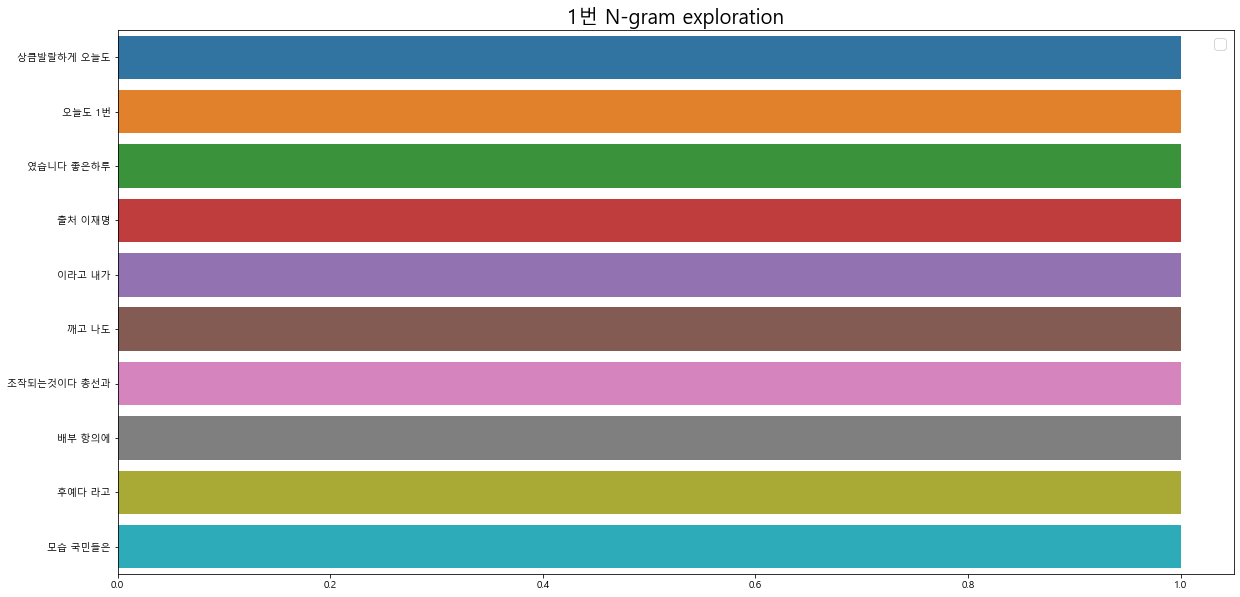

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x=y,y=x)
plt.title('1번 N-gram exploration', fontsize=20)
plt.legend(fontsize=15)
plt.show()

## 날짜별 분석
- Preprocessing code with Mecab


In [ ]:
# from eunjeon import Mecab
#dicpath="/usr/local/lib/mecab/dic/mecab-ko-dic"
mecab = Mecab()# Mecab User Dic Path


In [13]:
def preprocessing_mecab(readData):
    
    #### Clean text
    #sentence = CleanText(readData)
    
    #### Tokenize
    morphs = mecab.pos(readData)
    
    JOSA = ["JKS", "JKC", "JKG", "JKO", "JKB", "JKV", "JKQ", "JX", "JC"] # 조사
    SIGN = ["SF", "SE", "SSO", "SSC", "SC", "SY"] # 문장 부호
    TERMINATION = ["EP", "EF", "EC", "ETN", "ETM"] # 어미
    SUPPORT_VERB = ["VX"] # 보조 용언
    NUMBER = ["SN"]
    
    # Remove JOSA, EOMI, etc
    morphs[:] = (morph for morph in morphs if morph[1] not in JOSA+SIGN+TERMINATION+SUPPORT_VERB)
        
    # Remove length-1 words  
    morphs[:] = (morph for morph in morphs if not (len(morph[0]) == 1))
    
    # Remove Numbers
    # morphs[:] = (morph for morph in morphs if morph[1] not in NUMBER)

    # Result pop-up
    result = []
    for morph in morphs:
        result.append(morph[0])
        
    return result

In [37]:
stop_words = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
plus_stop_words = ['이재명','재명','남자', '아스트로','로하','오프', '진짜','번남번남', '이번', '지금', '우리', '번남', '정말','때문','사실', '오늘','한다', '세요', '합니다', '입니다', 'ㅋㅋㅋ', 'ㅋㅋ','진짜', '아니', '근데', '그냥', '라고', '한다고', '해서', '이런', '어차피', '버리', '된다는','생겼', '인데', '해도', '된다', '이거']
for word in plus_stop_words:
    stop_words.append(word) 

In [38]:
daily_df = number1.copy()

In [39]:
daily_df['Tokenized'] = daily_df['Text'].apply(lambda x: preprocessing_mecab(x))
daily_df['Tokenized'] = daily_df['Tokenized'].apply(lambda x: [item for item in x if item not in stop_words])
daily_df.head(5)

,Unnamed: 0,Datetime,Username,Like Count,Text,pred,Tokenized
0,12,2022-03-09,the_b017,2,;- 1번 뽑혔을때 ...,0,"[뽑혔, 뽑혔]"
1,13,2022-03-09,Ruee_3012,0,#상큼발랄하게~#오늘도~#1번 ! #이러기,0,"[상큼, 발랄, 이러]"
2,14,2022-03-09,huaaaaang1,0,#1번 뽑고 멋지게 떡쳐라 !!!,1,"[멋지, 쳐라]"
3,15,2022-03-09,sunday0317,82,“이재명후보 믿고 여기까지 왔습니다!!” 민주당은 박지현씨를 철저하게 지켜주고 지...,1,"[후보, 여기, 민주당, 박지현, 철저, 지켜, 지원, 줘야, 박지현]"
4,17,2022-03-09,semilee98,0,오늘은 세계 여성의 날 입니다. 인류 역사상 여성들은 항상 역사의 그늘에 가려져 있...,0,"[세계, 여성, 인류, 역사, 여성, 항상, 역사, 그늘, 가려져, 그러나, 이젠,..."


In [18]:
#  날짜별 최빈단어와 빈도수 찾는 함수
def common_words(words, k):
    c = Counter(words)
    cw = c.most_common(k)
    return c, cw

def add_value_labels(ax, spacing=5):
    for idx, rect in enumerate(ax.patches):
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'

        label = "{0}".format(date_df['Word'][idx])

        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)


### Daily most word

In [17]:
daily_df['Datetime'].unique()

array(['2022-03-09', '2022-03-08', '2022-03-07', '2022-03-06',
       '2022-03-05', '2022-03-04', '2022-03-03', '2022-03-02',
       '2022-03-01', '2022-02-28', '2022-02-27', '2022-02-26',
       '2022-02-25', '2022-02-24', '2022-02-23', '2022-02-22',
       '2022-02-21', '2022-02-20', '2022-02-19', '2022-02-17',
       '2022-02-15', '2022-02-13'], dtype=object)

In [20]:
# 날짜별 가장 많이 언급된 단어와 단어의 갯수를 dict형태로 가져와서 dataframe으로 만들어주는 과정
date = []
word_list = []
count_list = []

for i in daily_df['Datetime'].unique():
    tokenizing = sum(daily_df[daily_df['Datetime'] == i]['Tokenized'],[])
    c, cw = common_words(tokenizing, 1)    
    word = cw[0][0]
    count = cw[0][1]
    date.append(i)
    word_list.append(word)
    count_list.append(count)


IndexError: list index out of range

In [21]:
date_word_dict = {'Date' : date, 'Word' : word_list, 'Count' : count_list}

date_df = pd.DataFrame(date_word_dict, columns=['Date', 'Word', 'Count'])
date_df.head()

,Date,Word,Count
0,2022-03-09,위해,4
1,2022-03-08,사람,6
2,2022-03-07,이길,2
3,2022-03-06,윤석열,8
4,2022-03-05,투표,20


C:\Users\USER\anaconda3\envs\twitterscrape\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


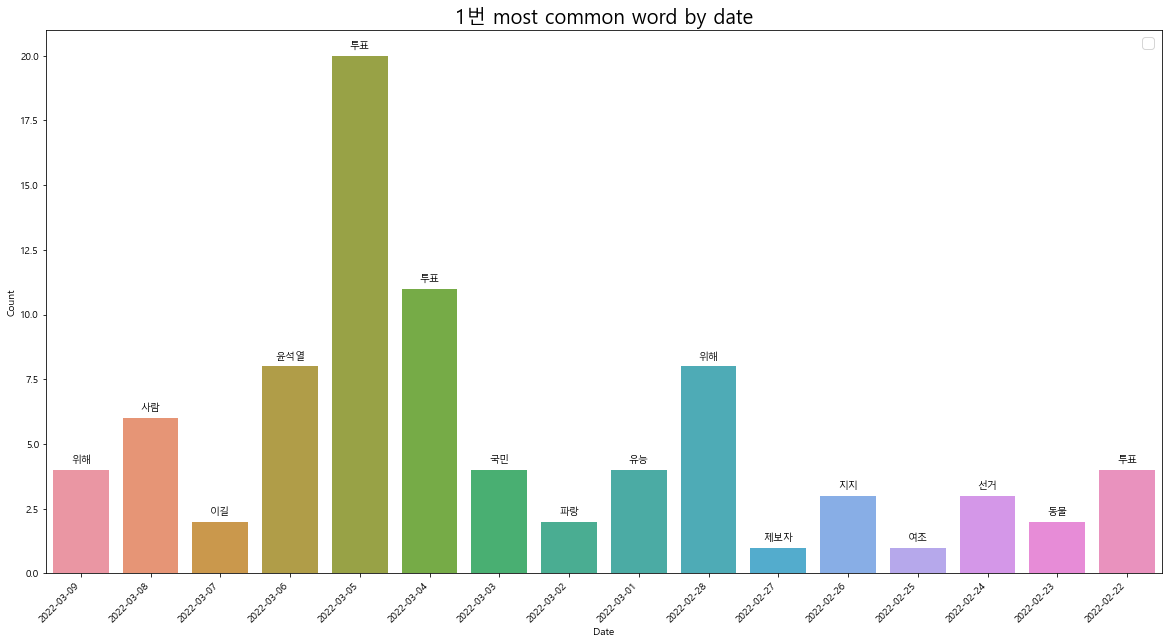

In [22]:
# graph
fig, ax = plt.subplots(1, figsize=(20,10))
plot = sns.barplot(date_df['Date'], date_df['Count'])
add_value_labels(ax)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('1번 most common word by date', fontsize=20)
plt.legend(fontsize=15)
plt.show()

In [26]:
dfi.export(date_df.style.background_gradient(cmap='Blues'), './graph\images/1번 daily most word table.png', max_cols=-1, max_rows=-1)
date_df

,Date,Word,Count
0,2022-03-09,위해,4
1,2022-03-08,사람,6
2,2022-03-07,이길,2
3,2022-03-06,윤석열,8
4,2022-03-05,투표,20
5,2022-03-04,투표,11
6,2022-03-03,국민,4
7,2022-03-02,파랑,2
8,2022-03-01,유능,4
9,2022-02-28,위해,8


### Weekly most word

In [398]:
weekly_df = daily_df.copy()
weekly_df['Datetime'].unique()

array(['2022-03-09', '2022-03-08', '2022-03-07', '2022-03-06',
       '2022-03-05', '2022-03-04', '2022-03-03', '2022-03-02',
       '2022-03-01', '2022-02-28', '2022-02-27', '2022-02-26',
       '2022-02-25', '2022-02-24', '2022-02-23', '2022-02-22',
       '2022-02-21', '2022-02-20', '2022-02-19', '2022-02-17',
       '2022-02-15', '2022-02-13'], dtype=object)

In [44]:
#전체 일자 주별로 나누기
# week2
weekly_df1= weekly_df[weekly_df['Datetime']<='2022-02-15' ]
weekly_df1 = pd.DataFrame(weekly_df1, columns=['Datetime', 'Usernamerd', 'Like Count','Text','pred', 'Tokenized'])

#week2
weekly_df2 = weekly_df[weekly_df['Datetime'] <= '2022-02-22']
weekly_df2 = weekly_df2[weekly_df2['Datetime'] > '2022-02-15']

weekly_df2 = pd.DataFrame(weekly_df2, columns=['Datetime', 'Usernamerd', 'Like Count','Text','pred', 'Tokenized'])

weekly_df3 = weekly_df[weekly_df['Datetime'] <= '2022-03-01']
weekly_df3 = weekly_df3[weekly_df3['Datetime'] > '2022-02-22']
weekly_df3 = pd.DataFrame(weekly_df3, columns=['Datetime', 'WUsernamerd', 'Like Count','Text','pred', 'Tokenized'])

weekly_df4 = weekly_df[weekly_df['Datetime'] <= '2022-03-09']
weekly_df4 = weekly_df4[weekly_df4['Datetime'] > '2022-03-01']
weekly_df4 = pd.DataFrame(weekly_df4, columns=['Datetime', 'WUsernamerd', 'Like Count','Text','pred', 'Tokenized'])

weekly_df4


,Datetime,WUsernamerd,Like Count,Text,pred,Tokenized
0,2022-03-09,NaN,2,;- 1번 뽑혔을때 ...,0,"[뽑혔, 뽑혔]"
1,2022-03-09,NaN,0,#상큼발랄하게~#오늘도~#1번 ! #이러기,0,"[상큼, 발랄, 이러]"
2,2022-03-09,NaN,0,#1번 뽑고 멋지게 떡쳐라 !!!,1,"[멋지, 쳐라]"
3,2022-03-09,NaN,82,“이재명후보 믿고 여기까지 왔습니다!!” 민주당은 박지현씨를 철저하게 지켜주고 지...,1,"[후보, 여기, 민주당, 박지현, 철저, 지켜, 지원, 줘야, 박지현]"
4,2022-03-09,NaN,0,오늘은 세계 여성의 날 입니다. 인류 역사상 여성들은 항상 역사의 그늘에 가려져 있...,0,"[세계, 여성, 인류, 역사, 여성, 항상, 역사, 그늘, 가려져, 그러나, 이젠,..."
...,...,...,...,...,...,...
85,2022-03-03,NaN,0,"위기에 강하고 유능한, 경제대통령! 국민통합대통령! #기호_1번_이재명! ""정치는...",1,"[위기, 강하, 유능, 경제, 대통령, 국민, 통합, 대통령, 기호, 정치, 정치인..."
86,2022-03-03,NaN,7,윤안 단일화에 잠깐 맨붕왔지만 전투력은 더 솟아 오르는데~^^ 열심히 지인들을 독려...,1,"[단일, 잠깐, 전투력, 오르, 열심히, 지인, 독려, 해야지]"
87,2022-03-03,NaN,0,어렵게 찾았다. 오늘도 한끼 떼우고 밭을 갈자~ #1번,1,"[어렵, 떼우]"
88,2022-03-02,NaN,2,모두 힘모아 총력전!! _ 아침 출근길 파랑파랑 보기좋다!! 앞으로 제대로...,1,"[모두, 모아, 총력전, 아침, 출근길, 파랑, 파랑, 제대로, 위해]"


In [45]:
w_tokenized1 = weekly_df2['Text'].apply(lambda x: preprocessing_mecab(x))
w_tokenized2 = weekly_df2['Text'].apply(lambda x: preprocessing_mecab(x))
w_tokenized3 = weekly_df3['Text'].apply(lambda x: preprocessing_mecab(x))
w_tokenized4 = weekly_df4['Text'].apply(lambda x: preprocessing_mecab(x))

In [46]:
w_tokenized = [w_tokenized1, w_tokenized2, w_tokenized3, w_tokenized4]
w_tokenized

[120                                   [이재명, 점점, 커지, 이재명]
 121    [존경, 재외, 동포, 여러분, 매일, 오전, 오후, 재외, 국민, 투표, 진행, ...
 122    [어렵, 대선, 선택, 우리, 이재명, 인권, 변호사, 세대, 통합, 국민, 통합,...
 123    [인기, 비결, 별게, 청량, 특별, 그저, 기본, 충실, 매일, 매일, 꾸준, 노...
 124                                                   []
 125                                                   []
 126                                                   []
 127                                                   []
 128                                             [우리, 누구]
 129                                           [정상인, 이재명]
 130                            [정상, 사고, 사람, 윤석열, 절대, 궁금]
 131                                                [이재명]
 132                                             [울림, 마트]
 Name: Text, dtype: object,
 120                                   [이재명, 점점, 커지, 이재명]
 121    [존경, 재외, 동포, 여러분, 매일, 오전, 오후, 재외, 국민, 투표, 진행, ...
 122    [어렵, 대선, 선택, 우리, 이재명, 인권, 변호사, 세대, 통합, 국민, 통합,...
 123    [인기, 비결, 별게, 청량, 특별, 그저, 기본, 충실, 매일,

In [59]:
def weekly_distribution(w_tokenized):
    n_corpus = [] 
    for t in w_tokenized:
        for j in t:
            if j not in stop_words:
                n_corpus.append(j) #mecab에서 명사 추출

    count = collections.Counter(n_corpus) 
    most = count.most_common() #빈도 수 순으로 추출 
    x, y= [], [] 
    for word,count in most[:20]: 
        x.append(word) 
        y.append(count)
    plt.rcParams['font.family'] = "Malgun Gothic"
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(10,10)) 
    plt.title('1번 most common word by weeks', fontsize=20)
    sns.barplot(x=y,y=x)

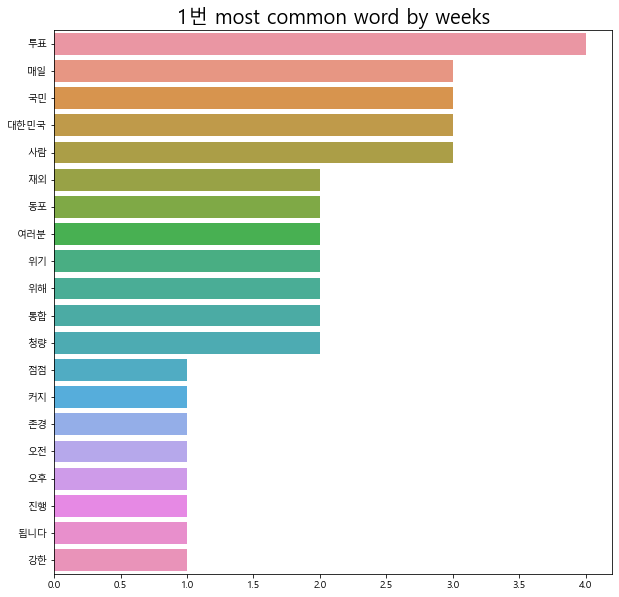

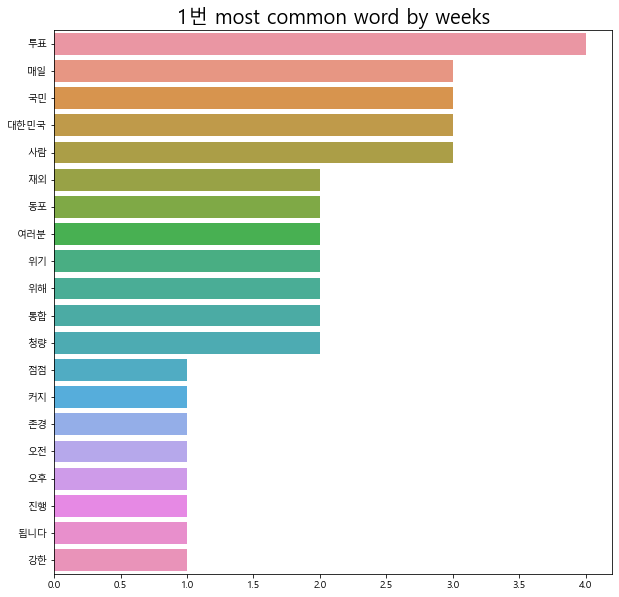

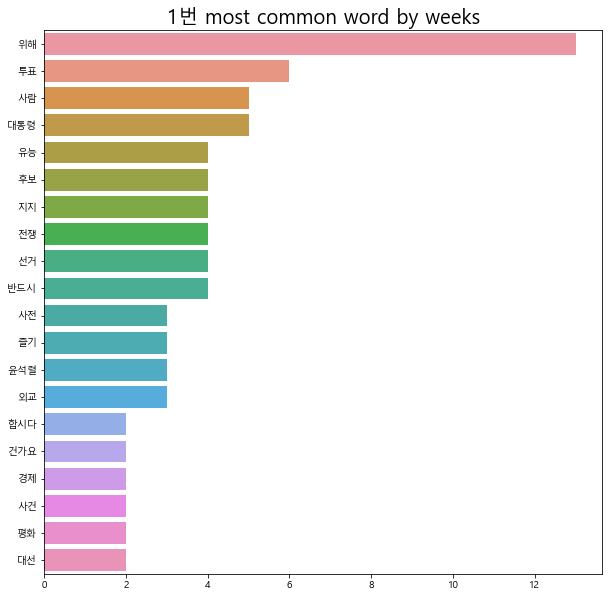

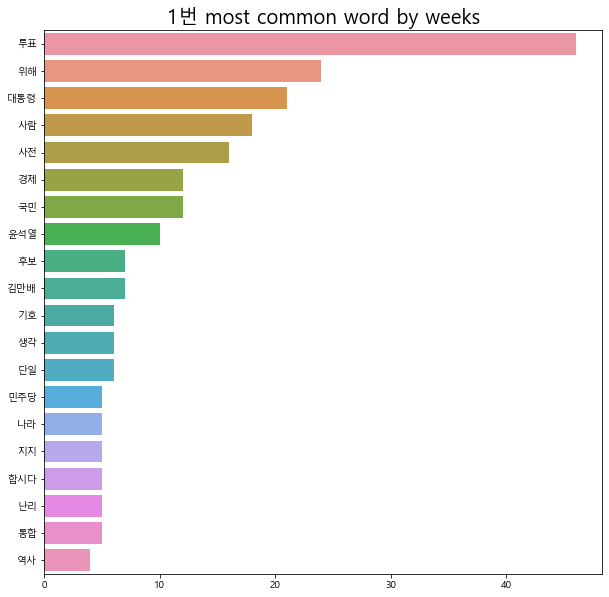

In [60]:
for i in w_tokenized:
    weekly_distribution(i)

In [68]:
why4 = number1[number1['Text'].str.contains('김만배')].reset_index(drop=True)
dfi.export(why4.style.background_gradient(cmap='Blues'), './graph\images/1번 weekly why 김만배.png', max_cols=-1, max_rows=-1)
why4

C:\Users\USER\anaconda3\envs\twitterscrape\lib\site-packages\dataframe_image\_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'


,Unnamed: 0,Datetime,Username,Like Count,Text,pred
0,45,2022-03-07,LuisU1287,0,"영남, 서울 심상찮아 제주도는 갈 엄두도 못내고 서울만 댕기며 대장동, 빨갱...",0
1,46,2022-03-06,drpDv7PZvAYXlKw,0,윤석열이 부산저축은행 불법대출 덮었다. 김만배가 박영수 소개 윤석열이가 박영수 얘기...,1
2,48,2022-03-06,drpDv7PZvAYXlKw,0,통했구나 그랬구나 김만배가 박에게부탁했더니 오래전부터 친분 관계였던 서결이가 봐줬구...,1
3,50,2022-03-06,munparang,1,윤석열이 뉴스타파가 공개한 ;김만배 녹취록 ;를 듣고 난 다음 취한 행동은 무엇일...,0


## EDA 분석
- 탐색적 데이터 분석 (EDA - Exploratory Data Analysis)
- 데이터를 분석하기 전에 데이터의 특성을 관찰하고 이해하는 단계

In [82]:
from konlpy.tag import Okt

#### 민주당

In [144]:
eda_1 = number1[number1['Text'].str.contains('민주당')]
dfi.export(eda_1.style.background_gradient(cmap='Blues'), './graph\images/1번 민주당 EDA Table.png', max_cols=-1, max_rows=-1)

eda_1.style.background_gradient(cmap='Blues')


C:\Users\USER\anaconda3\envs\twitterscrape\lib\site-packages\dataframe_image\_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'


,Unnamed: 0,Datetime,Username,Like Count,Text,pred
3,15,2022-03-09,sunday0317,82,“이재명후보 믿고 여기까지 왔습니다!!” 민주당은 박지현씨를 철저하게 지켜주고 지원해줘야 합니다!!! #박지현 _ _ #1번 #이재명,1
29,43,2022-03-07,diengine80,0,이재명 제주 연설... 한표가 소중합니다. 사전투표 안하신분들 3월 9일 투표로 국민들이 살아있다는걸 느끼게 해주십시오. #이재명 #1번 #제주동문로터리연설 #더불어민주당 동문시장 東門水産市場,1
48,65,2022-03-05,cnplog,0,모두 다 #1번 투표하자! #이재명 #민주당 #더불어민주당 #1번남 (년 1월 제작),1
78,96,2022-03-04,kjhhiru,0,충청과 대에서 우위로 돌아섰네. 서울과 대에서 투표 독려하면 이길수 있다. #1번_민주당_이재명투표,1
106,131,2022-02-28,WiseManU,2,#이재명 #더불어민주당 #대선 #후보 #사전투표 #본투표 #1번 #나를위해 #너를위해 #우리를위해 #대한민국을위해 #한반도를위해 #세계를위해 #지구계를위해 #평화를위해 ‘사진 세장을 보냈고 모두 해주면 감사하다고 했고 한 장 골라서 해 주셔도 된다고 하였더니 이 사진’,1


In [145]:
# 형태소분석 및 명사 카운터 
okt = Okt()
text = str(eda_1['Text'].values)
nouns = okt.nouns(text) # 명사만 추출
words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외
c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함
c

Counter({'이재명': 2,
         '후보': 1,
         '여기': 1,
         '민주당': 1,
         '박지현': 1,
         '지원': 1,
         '제주': 1,
         '연설': 1,
         '사전투표': 1,
         '투표': 3,
         '국민': 1,
         '동문': 1,
         '시장': 1,
         '모두': 2,
         '제작': 1,
         '충청': 1,
         '우위': 1,
         '서울': 1,
         '독려': 1,
         '사진': 2})

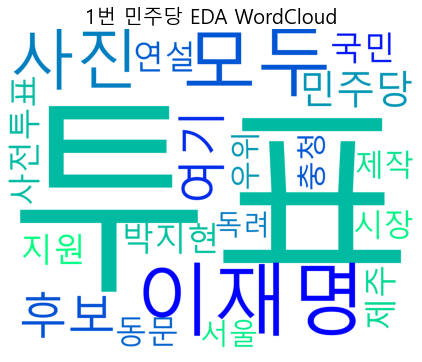

In [154]:
wc = WordCloud(font_path= 'malgun',stopwords=stop_words,background_color ='white', colormap='winter', width=1000, height=800, scale=2.0, max_font_size=500)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.axis("off")
plt.title('1번 민주당 EDA WordCloud', fontsize=20)
plt.imshow(gen)
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_18152\2289666169.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda_1['Length'] = eda_1['Text'].apply(length)
C:\Users\USER\anaconda3\envs\twitterscrape\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


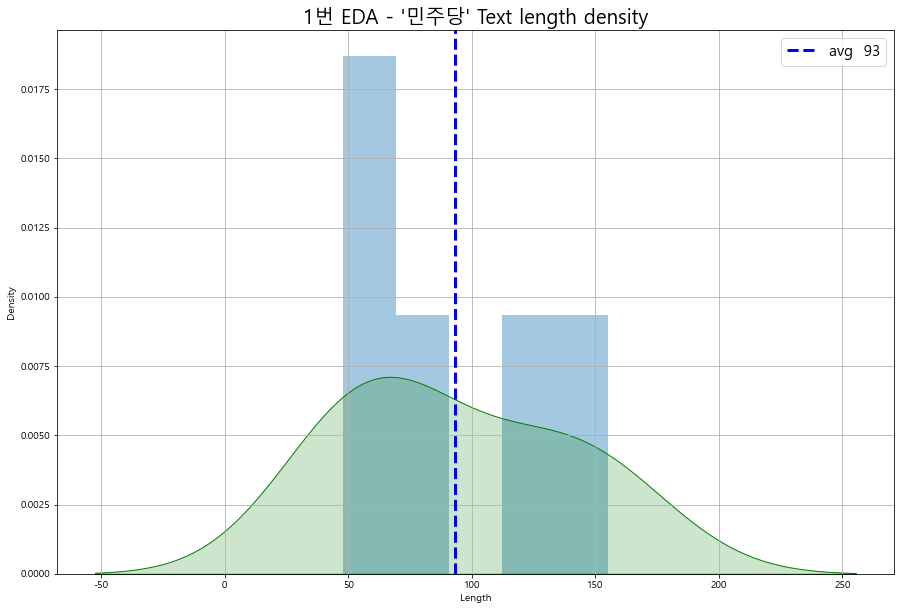

In [124]:
''' 문장 데이터 밀집 분석 '''
#Number of characters in tweets
def length(text):    
    '''a function which returns the length of text'''
    return len(text)
eda_1['Length'] = eda_1['Text'].apply(length)
eda_1
plt.figure(figsize=(15,10))
plt.grid()
sns.distplot(a= eda_1['Length'], bins=5, kde=True, kde_kws={"color":"g", "alpha":0.2, "linewidth":1, "shade":True})
x_label = int(np.average(eda_1['Length']))
plt.axvline(x=np.average(eda_1['Length']), color='b', linestyle='--', linewidth=3, label=f'avg  {x_label}')
plt.legend(fontsize=15)
plt.title("1번 EDA - '민주당' Text length density", fontsize=20)

plt.show()
# save_fig('Text length distribution')


#### 투표

In [138]:
eda_2= number1[number1['Text'].str.contains('투표')]
eda_2 = eda_2[eda_2['Like Count'] >=10]
dfi.export(eda_2.style.background_gradient(cmap='Blues'), './graph\images/1번 투표 EDA Table.png', max_cols=-1, max_rows=-1)
eda_2.style.background_gradient(cmap='Blues')

,Unnamed: 0,Datetime,Username,Like Count,Text,pred
13,26,2022-03-08,drpDv7PZvAYXlKw,96,#이재명 #경제대통령 #1번 #밭갈기 #투표로말해요 #청계광장 #파랗을물들이다 1번 찍으면 1번이 됩니다.,1
19,32,2022-03-08,onearthon,14,모두에게 가치있는 한표. #투표 #1번,1
45,61,2022-03-05,allin8899,14,;((봉투속 투표지에 1번 이재명이 투표되었있다?)) 누가 조작했나? ((관리자는 선관위? 만든자도 선관위?)) 5%만 조작해도? % 투표율이 조작되는것이다?총선과 똑같다? ;,0
51,68,2022-03-05,myinglife,242,"참1슬 1잔에 정치 시름을 달래면서 1념으로 1번 지지하다 #내가만든1, #나를위해1투표, #1번_이재명",1
60,77,2022-03-05,jeonghanul4,478,#나를위해1 #이재명 #1번 #사전투표,1
73,90,2022-03-04,jhappylove0201,918,서초1동 주민센터에서 사전투표 완료!!~~^^ #무조건_1번 #이재명심자 #이재명 #사전투표_이재명,1
121,153,2022-02-22,Jaemyung_Lee,1389,";존경하는 재외동포 여러분, 일부터 일 매일 오전 8시부터 오후 5시까지 재외국민 투표가 진행됩니다. 위기에 강한 대한민국을 위해, 더 크게 도약할 대한민국을 위해 기호 1번 이재명에게 꼭 투표해주십시오. 동포 여러분의 더 큰 자랑이 되는 조국 대한민국을 만들겠습니다. ;",1


C:\Users\USER\anaconda3\envs\twitterscrape\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


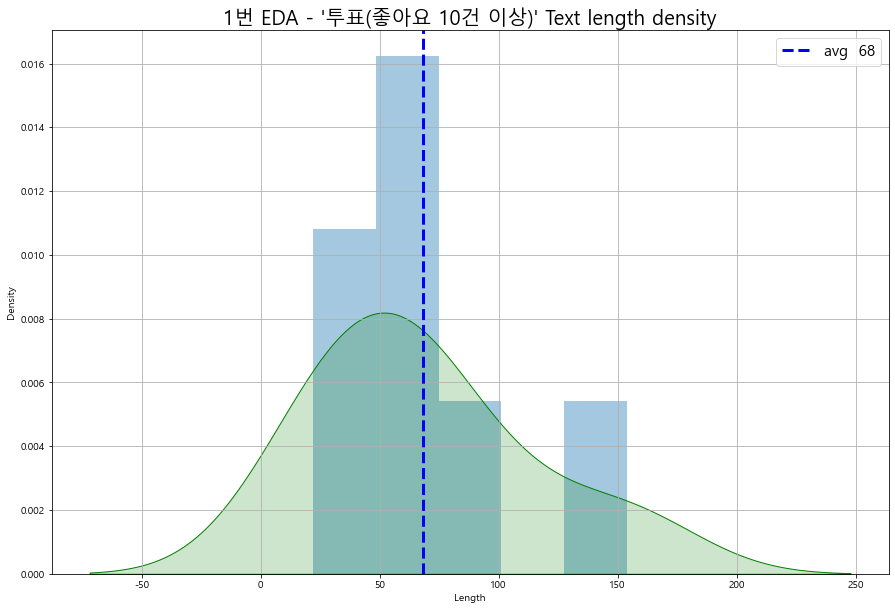

In [139]:
''' 문장 데이터 밀집 분석 '''
eda_2['Length'] = eda_2['Text'].apply(length)
eda_2
plt.figure(figsize=(15,10))
plt.grid()
sns.distplot(a= eda_2['Length'], bins=5, kde=True, kde_kws={"color":"g", "alpha":0.2, "linewidth":1, "shade":True})
x_label = int(np.average(eda_2['Length']))
plt.axvline(x=np.average(eda_2['Length']), color='b', linestyle='--', linewidth=3, label=f'avg  {x_label}')
plt.legend(fontsize=15)
plt.title("1번 EDA - '투표(좋아요 10건 이상)' Text length density", fontsize=20)
plt.show()
# save_fig('Text length distribution')


In [155]:
text2 = str(eda_2['Text'].values)
nouns = okt.nouns(text2) # 명사만 추출
words2 = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외
c2 = Counter(words2) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함
c2


Counter({'모두': 1,
         '가치': 1,
         '봉투': 1,
         '투표': 5,
         '이재명': 2,
         '누가': 1,
         '조작': 3,
         '관리자': 1,
         '선관위': 2,
         '자도': 1,
         '총선': 1,
         '정치': 1,
         '시름': 1,
         '지지': 1,
         '서초': 1,
         '주민': 1,
         '센터': 1,
         '사전투표': 1,
         '완료': 1,
         '존경': 1,
         '재외동포': 1,
         '여러분': 2,
         '매일': 1,
         '오전': 1,
         '오후': 1,
         '재외국민': 1,
         '진행': 1,
         '위기': 1,
         '대한민국': 3,
         '위해': 2,
         '크게': 1,
         '도약': 1,
         '기호': 1,
         '동포': 1,
         '자랑': 1,
         '조국': 1})

In [158]:
# 대표단어 삭제
# ignore = ['남자','번녀','웅웅', '아스트로','로하','오프', '진짜','번남번남', '이번', '지금', '우리', '번남', '정말','때문','사실', '오늘','한다', '세요', '합니다', '입니다', 'ㅋㅋㅋ', 'ㅋㅋ','진짜', '아니', '근데', '그냥', '라고', '한다고', '해서', '이런', '어차피', '버리', '된다는','생겼', '인데', '해도', '된다', '이거'] #제거할 불필요한 단어 및 표현 리스트
ignore = ['투표']
for word in ignore:
    if word in c2:
        del c2[word] #위에서 정한 불필요한 단어 및 표현 리스트에 속한 단어 및 표현을 제거

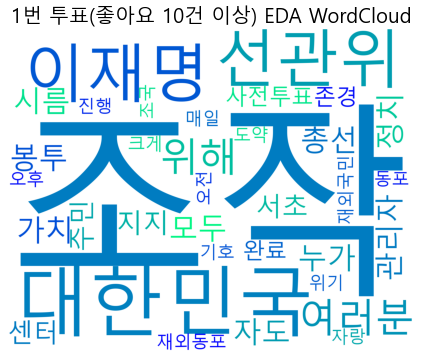

In [159]:
gen2 = wc.generate_from_frequencies(c2)
plt.figure()
plt.axis("off")
plt.title('1번 투표(좋아요 10건 이상) EDA WordCloud', fontsize=20)
plt.imshow(gen2)
plt.show()

#### 이재명

In [167]:
eda_3= number1[number1['Text'].str.contains('이재명')]
eda_3 = eda_3[eda_3['Like Count'] >=10]
dfi.export(eda_3.style.background_gradient(cmap='Blues'), './graph\images/1번 이재명 EDA Table.png', max_cols=-1, max_rows=-1)
eda_3.style.background_gradient(cmap='Blues')

C:\Users\USER\anaconda3\envs\twitterscrape\lib\site-packages\dataframe_image\_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'


,Unnamed: 0,Datetime,Username,Like Count,Text,pred
3,15,2022-03-09,sunday0317,82,“이재명후보 믿고 여기까지 왔습니다!!” 민주당은 박지현씨를 철저하게 지켜주고 지원해줘야 합니다!!! #박지현 _ _ #1번 #이재명,1
13,26,2022-03-08,drpDv7PZvAYXlKw,96,#이재명 #경제대통령 #1번 #밭갈기 #투표로말해요 #청계광장 #파랗을물들이다 1번 찍으면 1번이 됩니다.,1
40,55,2022-03-06,joobilate,21,"위기에 강하고 유능한, 경제대통령! 국민통합대통령! 이재명! ✅'국민이 당신의 명품빽이 되어 드릴게요~♡ 이재명이 희망이다^^' ✅""역사와 국민을 믿습니다. 민생, 경제, 평화, 통합의 길을 꿋꿋하게 걸어가겠습니다"" #기호_1번_이재명 [출처:이재명 후보 인스타그램 ]",1
42,58,2022-03-06,son1501,24,#1번_우리의_미래입니다 정철 작품. #부산도이재명입니다,0
45,61,2022-03-05,allin8899,14,;((봉투속 투표지에 1번 이재명이 투표되었있다?)) 누가 조작했나? ((관리자는 선관위? 만든자도 선관위?)) 5%만 조작해도? % 투표율이 조작되는것이다?총선과 똑같다? ;,0
51,68,2022-03-05,myinglife,242,"참1슬 1잔에 정치 시름을 달래면서 1념으로 1번 지지하다 #내가만든1, #나를위해1투표, #1번_이재명",1
56,73,2022-03-05,drpDv7PZvAYXlKw,113,그래서 이재명 입니다 #이재명 #경제대통령 #1번,1
60,77,2022-03-05,jeonghanul4,478,#나를위해1 #이재명 #1번 #사전투표,1
61,78,2022-03-05,ladyofjuli,17,오징어 게임에 나왔던 1번남 #이재명 #1번,1
62,79,2022-03-05,ladyofjuli,30,#이재명 교육공약 비교 #1번 찍어 교육 대국으로 가자,1


C:\Users\USER\anaconda3\envs\twitterscrape\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


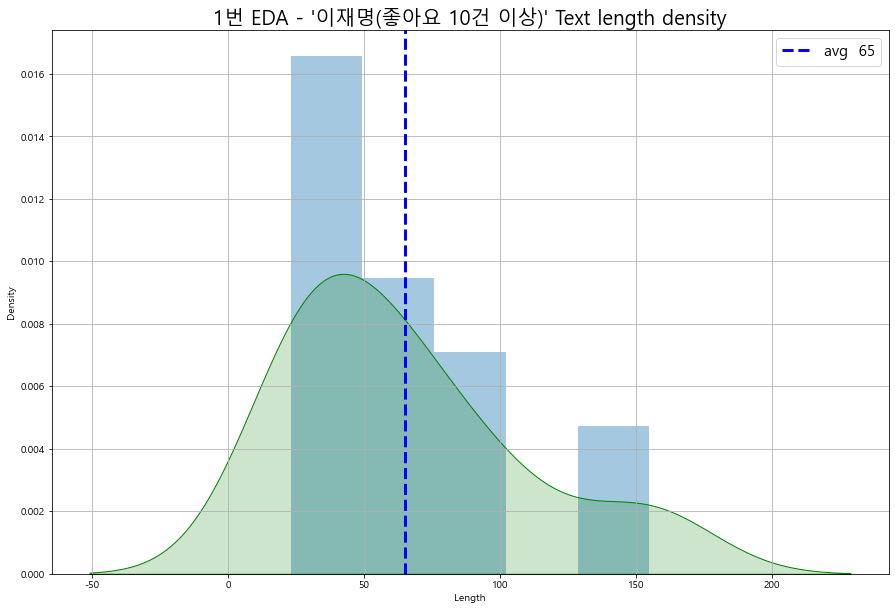

In [168]:
''' 문장 데이터 밀집 분석 '''
eda_3['Length'] = eda_3['Text'].apply(length)
eda_3
plt.figure(figsize=(15,10))
plt.grid()
sns.distplot(a= eda_3['Length'], bins=5, kde=True, kde_kws={"color":"g", "alpha":0.2, "linewidth":1, "shade":True})
x_label = int(np.average(eda_3['Length']))
plt.axvline(x=np.average(eda_3['Length']), color='b', linestyle='--', linewidth=3, label=f'avg  {x_label}')
plt.legend(fontsize=15)
plt.title("1번 EDA - '이재명(좋아요 10건 이상)' Text length density", fontsize=20)
plt.show()
# save_fig('Text length distribution')


In [169]:
text3 = str(eda_3['Text'].values)
nouns = okt.nouns(text3) # 명사만 추출
words3 = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외
c3 = Counter(words3) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함
c3


Counter({'이재명': 9,
         '후보': 2,
         '여기': 1,
         '민주당': 1,
         '박지현': 1,
         '지원': 1,
         '위기': 2,
         '경제': 2,
         '대통령': 2,
         '국민': 4,
         '통합': 2,
         '당신': 1,
         '명품': 1,
         '희망이': 1,
         '역사': 1,
         '민생': 1,
         '평화': 1,
         '출처': 1,
         '인스타그램': 1,
         '정철': 1,
         '작품': 1,
         '봉투': 1,
         '투표': 5,
         '누가': 1,
         '조작': 3,
         '관리자': 1,
         '선관위': 2,
         '자도': 1,
         '총선': 1,
         '정치': 2,
         '시름': 1,
         '지지': 2,
         '오징어': 1,
         '게임': 1,
         '번남': 1,
         '교육': 2,
         '공약': 1,
         '비교': 1,
         '대국': 1,
         '사람': 1,
         '서초': 1,
         '주민': 1,
         '센터': 1,
         '사전투표': 1,
         '완료': 1,
         '처럼': 1,
         '다짐': 1,
         '타임지': 1,
         '기사': 1,
         '청와대로': 1,
         '기득권': 1,
         '나라': 1,
         '예비군': 1,
         '소집': 1,
         '

In [171]:
# 대표단어 삭제
# ignore = ['남자','번녀','웅웅', '아스트로','로하','오프', '진짜','번남번남', '이번', '지금', '우리', '번남', '정말','때문','사실', '오늘','한다', '세요', '합니다', '입니다', 'ㅋㅋㅋ', 'ㅋㅋ','진짜', '아니', '근데', '그냥', '라고', '한다고', '해서', '이런', '어차피', '버리', '된다는','생겼', '인데', '해도', '된다', '이거'] #제거할 불필요한 단어 및 표현 리스트
ignore = ['이재명']
for word in ignore:
    if word in c3:
        del c3[word] #위에서 정한 불필요한 단어 및 표현 리스트에 속한 단어 및 표현을 제거

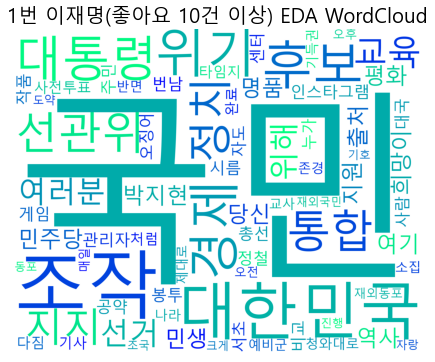

In [172]:
gen3 = wc.generate_from_frequencies(c3)
plt.figure()
plt.axis("off")
plt.title('1번 이재명(좋아요 10건 이상) EDA WordCloud', fontsize=20)
plt.imshow(gen3)
plt.show()

### 감성분석

In [251]:
print(number1['pred'].describe())
number1['pred'].value_counts()

count    136.000000
mean       0.750000
std        0.434613
min        0.000000
25%        0.750000
50%        1.000000
75%        1.000000
max        1.000000
Name: pred, dtype: float64


1    102
0     34
Name: pred, dtype: int64

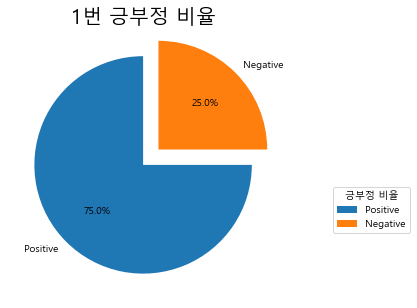

In [247]:
plt.rcParams['font.family'] = "Malgun Gothic"
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(5,5)) 
plt.title('1번 긍부정 비율', fontsize=20)
plt.pie(number1['pred'].value_counts(), autopct='%0.1f%%', labels=['Positive','Negative'], counterclock=False, explode = [0, 0.2])
plt.legend(loc = (1.2, 0.25), title = '긍부정 비율')

#### 긍정

In [265]:
pos_df = number1[number1['pred']==1].reset_index(drop=True) #긍정
# #그룹핑 사용시 
# number1.groupby('pred').get_group(1) #긍정
print(pos_df.info())
dfi.export(pos_df.style.background_gradient(cmap='Blues'), './graph\images/1번 긍정분석 Table.png', max_cols=-1, max_rows=-1)

pos_df.style.background_gradient(cmap='Blues')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  102 non-null    int64 
 1   Datetime    102 non-null    object
 2   Username    102 non-null    object
 3   Like Count  102 non-null    int64 
 4   Text        102 non-null    object
 5   pred        102 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 4.9+ KB
None


C:\Users\USER\anaconda3\envs\twitterscrape\lib\site-packages\dataframe_image\_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'


,Unnamed: 0,Datetime,Username,Like Count,Text,pred
0,14,2022-03-09,huaaaaang1,0,#1번 뽑고 멋지게 떡쳐라 !!!,1
1,15,2022-03-09,sunday0317,82,“이재명후보 믿고 여기까지 왔습니다!!” 민주당은 박지현씨를 철저하게 지켜주고 지원해줘야 합니다!!! #박지현 _ _ #1번 #이재명,1
2,18,2022-03-09,semilee98,0,화합을 이야기 하는 사람이 미래를 만들 수 있습니다. #1번 #이재명,1
3,19,2022-03-09,Kirajang79,0,#나를위해 #나라를위해 🇰🇷 #1번 #이재명 #대통령 👍 #지지합니다 !!!,1
4,20,2022-03-09,LuisU1287,1,"이재명이였습니다.... 걱정 마요, 재명! #오늘은_이_뽑는_날 #1번_이재명으로",1
5,21,2022-03-09,pnw4563,0,투표완료💙💙💙 #1번 #이재명,1
6,22,2022-03-09,krazyeom,0,기호 1번 이재명에게 투표해주십이요. #1번.,1
7,23,2022-03-09,WiseManU,0,"‘년 초여름날 성남으로 이사가려고 삼사일 머물면서 시장, 택시, 식당, 수퍼에 들려서 직선적으로 이재명 시장님에 대한 생각을 물었었다. 모두가 주저없이 최고라고 답하더라. 너무 많이 변하고 좋아져서 만족도가 높았다는 것.’ #이재명 #너를위해 #나를위해 #1번",1
8,25,2022-03-08,hosanna02040204,3,제가 새벽에 꿈을 꿨는데요. 광화문에서 #파란물결 #1번 #이재명 을 환호하고 축하하고 음악소리까지.. 이게 #개꿈 일까요? 아니면 #예지몽 일까요?? - #전영이 꿈!! #이재명지지 #퀸즈영이마켓 #쇼핑몰 #패션의류잡화 # #전영이 였습니다.좋은하루 되세요 ☘️,1
9,26,2022-03-08,drpDv7PZvAYXlKw,96,#이재명 #경제대통령 #1번 #밭갈기 #투표로말해요 #청계광장 #파랗을물들이다 1번 찍으면 1번이 됩니다.,1


In [267]:
pos_df_like_top20 = pos_df[pos_df['Like Count'] >= 20].sort_values(["Like Count"], ascending=[True]).reset_index(drop=True)
dfi.export(pos_df_like_top20.style.background_gradient(cmap='Blues'), './graph\images/1번 긍정 좋아요 20이상 Table.png', max_cols=-1, max_rows=-1)

pos_df_like_top20.style.background_gradient(cmap='Blues')


,Unnamed: 0,Datetime,Username,Like Count,Text,pred
0,55,2022-03-06,joobilate,21,"위기에 강하고 유능한, 경제대통령! 국민통합대통령! 이재명! ✅'국민이 당신의 명품빽이 되어 드릴게요~♡ 이재명이 희망이다^^' ✅""역사와 국민을 믿습니다. 민생, 경제, 평화, 통합의 길을 꿋꿋하게 걸어가겠습니다"" #기호_1번_이재명 [출처:이재명 후보 인스타그램 ]",1
1,79,2022-03-05,ladyofjuli,30,#이재명 교육공약 비교 #1번 찍어 교육 대국으로 가자,1
2,133,2022-02-27,moolpang,30,"제보자 검사들이 사건 조서에도 남기지 않은, 확인할 수 없는 말들을 기자들에게 흘려주면서 끝까지 선거판을 흔들려고 합니다. #흔들리지_말고_1번!",1
3,94,2022-03-04,ladyofjuli,32,#안철수 처럼 정치하지 않기로 다짐합니다. #1번 이재명,1
4,15,2022-03-09,sunday0317,82,“이재명후보 믿고 여기까지 왔습니다!!” 민주당은 박지현씨를 철저하게 지켜주고 지원해줘야 합니다!!! #박지현 _ _ #1번 #이재명,1
5,26,2022-03-08,drpDv7PZvAYXlKw,96,#이재명 #경제대통령 #1번 #밭갈기 #투표로말해요 #청계광장 #파랗을물들이다 1번 찍으면 1번이 됩니다.,1
6,73,2022-03-05,drpDv7PZvAYXlKw,113,그래서 이재명 입니다 #이재명 #경제대통령 #1번,1
7,95,2022-03-04,ladyofjuli,116,#이재명 타임지 기사 나옴 #1번 찍어 재명이를 청와대로 보내자,1
8,68,2022-03-05,myinglife,242,"참1슬 1잔에 정치 시름을 달래면서 1념으로 1번 지지하다 #내가만든1, #나를위해1투표, #1번_이재명",1
9,77,2022-03-05,jeonghanul4,478,#나를위해1 #이재명 #1번 #사전투표,1


In [259]:
# 형태소분석 및 명사 카운터 
okt = Okt()
text_pos = str(pos_df['Text'].values)
like20_text_pos = str(pos_df_like_top20['Text'].values)
nouns = okt.nouns(text_pos) # 명사만 추출
like20_nouns = okt.nouns(like20_text_pos) # 명사만 추출

words_pos = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외
like20_words_pos = [n for n in like20_nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

c_pos = Counter(words_pos) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함
like20_c_pos = Counter(like20_words_pos)
print(c_pos, like20_c_pos)


Counter({'이재명': 31, '투표': 15, '위해': 13, '대통령': 12, '후보': 9, '국민': 9, '사람': 8, '사전투표': 6, '모두': 5, '경제': 5, '생각': 4, '반드시': 4, '윤석열': 4, '통합': 4, '나라': 4, '대한민국': 4, '선거': 4, '완료': 3, '기호': 3, '윤석렬': 3, '대선': 3, '위기': 3, '정치': 3, '지지': 3, '정답': 3, '아침': 3, '노인': 3, '노통': 3, '맹박': 3, '뿌리': 3, '제거': 3, '일화': 3, '문재인': 3, '여러분': 3, '시장': 2, '하루': 2, '존중': 2, '오늘': 2, '중도': 2, '선택': 2, '만배': 2, '박영수': 2, '커피': 2, '사건': 2, '인사': 2, '특검': 2, '이유': 2, '부탁': 2, '역사': 2, '민생': 2, '평화': 2, '우리나라': 2, '상황': 2, '벌써': 2, '우리': 2, '교육': 2, '비교': 2, '시민': 2, '모습': 2, '독려': 2, '파랑': 2, '제대로': 2, '해도': 2, '사진': 2, '최악': 2, '선거운동': 2, '여기': 1, '민주당': 1, '박지현': 1, '지원': 1, '화합': 1, '이야기': 1, '미래': 1, '걱정': 1, '여름날': 1, '성남': 1, '사가': 1, '려고': 1, '삼사일': 1, '택시': 1, '식당': 1, '수퍼': 1, '직선': 1, '시장님': 1, '대한': 1, '주저': 1, '최고': 1, '만족도': 1, '새벽': 1, '광화문': 1, '환호': 1, '축하': 1, '음악': 1, '소리': 1, '지위': 1, '체계': 1, '막론': 1, '자체': 1, '관심': 1, '부모님': 1, '안내': 1, '항후': 1, '명운': 1, '이기자': 1, '승리': 1, '공복': 1, '사용': 

In [261]:
# 대표단어 삭제
# ignore = ['남자','번녀','웅웅', '아스트로','로하','오프', '진짜','번남번남', '이번', '지금', '우리', '번남', '정말','때문','사실', '오늘','한다', '세요', '합니다', '입니다', 'ㅋㅋㅋ', 'ㅋㅋ','진짜', '아니', '근데', '그냥', '라고', '한다고', '해서', '이런', '어차피', '버리', '된다는','생겼', '인데', '해도', '된다', '이거'] #제거할 불필요한 단어 및 표현 리스트
ignore = ['이재명']
for word in ignore:
    if word in c_pos:
        del c_pos[word] #위에서 정한 불필요한 단어 및 표현 리스트에 속한 단어 및 표현을 제거
        
for like20_word in ignore:
    if like20_word in like20_c_pos:
        del like20_c_pos[like20_word] #위에서 정한 불필요한 단어 및 표현 리스트에 속한 단어 및 표현을 제거

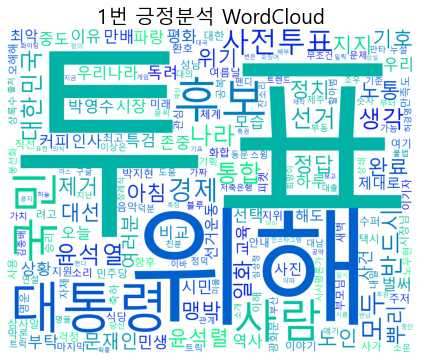

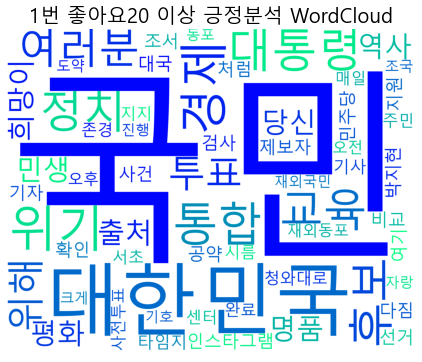

In [262]:
wc = WordCloud(font_path= 'malgun',stopwords=stop_words,background_color ='white', colormap='winter', width=1000, height=800, scale=2.0, max_font_size=1000)
pos_gen = wc.generate_from_frequencies(c_pos)
plt.figure()
plt.axis("off")
plt.title('1번 긍정분석 WordCloud', fontsize=20)
plt.imshow(pos_gen)
plt.show()

like20_pos_gen = wc.generate_from_frequencies(like20_c_pos)
plt.figure()
plt.axis("off")
plt.title('1번 좋아요20 이상 긍정분석 WordCloud', fontsize=20)
plt.imshow(like20_pos_gen)
plt.show()


In [219]:
pos_df_like_top10 =pos_df.sort_values(by=['Like Count'], ascending=False)
pos_df_like_top10 = pos_df_like_top10[:10]
dfi.export(pos_df_like_top10.style.background_gradient(cmap='Blues'), './graph\images/1번 긍정분석 like top 10 Table.png', max_cols=-1, max_rows=-1)
pos_df_like_top10.style.background_gradient(cmap='Blues')

,Unnamed: 0,Datetime,Username,Like Count,Text,pred
121,153,2022-02-22,Jaemyung_Lee,1389,";존경하는 재외동포 여러분, 일부터 일 매일 오전 8시부터 오후 5시까지 재외국민 투표가 진행됩니다. 위기에 강한 대한민국을 위해, 더 크게 도약할 대한민국을 위해 기호 1번 이재명에게 꼭 투표해주십시오. 동포 여러분의 더 큰 자랑이 되는 조국 대한민국을 만들겠습니다. ;",1
73,90,2022-03-04,jhappylove0201,918,서초1동 주민센터에서 사전투표 완료!!~~^^ #무조건_1번 #이재명심자 #이재명 #사전투표_이재명,1
60,77,2022-03-05,jeonghanul4,478,#나를위해1 #이재명 #1번 #사전투표,1
51,68,2022-03-05,myinglife,242,"참1슬 1잔에 정치 시름을 달래면서 1념으로 1번 지지하다 #내가만든1, #나를위해1투표, #1번_이재명",1
77,95,2022-03-04,ladyofjuli,116,#이재명 타임지 기사 나옴 #1번 찍어 재명이를 청와대로 보내자,1
56,73,2022-03-05,drpDv7PZvAYXlKw,113,그래서 이재명 입니다 #이재명 #경제대통령 #1번,1
13,26,2022-03-08,drpDv7PZvAYXlKw,96,#이재명 #경제대통령 #1번 #밭갈기 #투표로말해요 #청계광장 #파랗을물들이다 1번 찍으면 1번이 됩니다.,1
3,15,2022-03-09,sunday0317,82,“이재명후보 믿고 여기까지 왔습니다!!” 민주당은 박지현씨를 철저하게 지켜주고 지원해줘야 합니다!!! #박지현 _ _ #1번 #이재명,1
76,94,2022-03-04,ladyofjuli,32,#안철수 처럼 정치하지 않기로 다짐합니다. #1번 이재명,1
62,79,2022-03-05,ladyofjuli,30,#이재명 교육공약 비교 #1번 찍어 교육 대국으로 가자,1


#### 부정

In [270]:
neg_df = number1[number1['pred']==0] #부정
# 그룹핑으로 부정 검색
# data1 = data.groupby('pred').get_group(0) 
dfi.export(neg_df.style.background_gradient(cmap='Reds'), './graph\images/1번 부정분석 Table.png', max_cols=-1, max_rows=-1)
neg_df.style.background_gradient(cmap='Reds')

,Unnamed: 0,Datetime,Username,Like Count,Text,pred
0,12,2022-03-09,the_b017,2,;- 1번 뽑혔을때 2번 뽑혔을때- ;,0
1,13,2022-03-09,Ruee_3012,0,#상큼발랄하게~#오늘도~#1번 ! #이러기,0
4,17,2022-03-09,semilee98,0,오늘은 세계 여성의 날 입니다. 인류 역사상 여성들은 항상 역사의 그늘에 가려져 있었습니다. 그러나 이젠 때가 왔습니다. 투표로 진짜 여성들의 이야기를 들을 사람을 #대통령 으로 만들어 주세요. #1번 #이재명,0
11,24,2022-03-09,suicidaltrialmo,0,투표소 잘못 알아가지고 아침부터 쌩쇼를 했다. 어쩐지... 멀더라니 #1번,0
15,28,2022-03-08,mr_mianeyo,1,내일 깡소주로 병나발을 부느냐 우아하게 샴페인 혹은 와인을 마시느냐는 선거 결과에 달려있습니다.. 내 간을 지켜주세요. #간을위해_1번,0
17,30,2022-03-08,LuisU1287,0,오늘 광명 사자후 유세 보니 임오경은 장군깜이여.. 차차기까진 광명 책임져야 할 듯! #이재명_1번 #임오경_1번,0
22,35,2022-03-08,mulderxfile,1,"최근 연락온 사람들에게 슬쩍 떠봄 한명은 2번은 무조건 아니다 그래서 1번, 한명은 토론회 보고 3번 호감도 올라 갔는데 단일화 선언해 1번으로 갈아탄다고. 설득할 필요도 없이 맞장구 쳐주다 끊음. 속이 편안~ #밭갈기 #1번 #이재명",0
27,41,2022-03-07,drpDv7PZvAYXlKw,2,어둠은 빛을 이길수 없습니다 참은 거짓을이길수 없습니다. 끝까지 밭갈기만이 승리의길입니다. #이재명 #1번 #나를위해 #국민과단일화 #경제대통령,0
30,45,2022-03-07,LuisU1287,0,"영남, 서울 심상찮아 제주도는 갈 엄두도 못내고 서울만 댕기며 대장동, 빨갱이팔이 그리고 어퍼컷만을 연짱 시연하는 모지리들. 오늘 김만배 녹취록 나오고 이잼 부산 가신다더라, 색히드라!! #이재명_1번 #김만배_녹취록은_윤떡_정수리를_겨냥 #백오십만_경찰가족_빅엿먹인_윤떡",0
32,47,2022-03-06,chickahoy69,0,조국 딸 문제로 가장 난리 친 사람 - 장제원 문제로 젤 난리 친 사람 - 윤희숙 법카에 젤 난리 친 사람 - 원희룡 남의 자식 뇌물 문제로 젤 난리 친 사람 - 곽상도 대장동으로 젤 난리 친 사람 - 윤석열 -펌- ‘똥 싼 놈이 가장 큰 소리를 쳐왔다!’ 이 놈들 모조리 보내버리자. #내가뽑은_1번,0


In [272]:
neg_df_like_top10 =neg_df.sort_values(by=['Like Count'], ascending=False)
neg_df_like_top10 = neg_df_like_top10[:10]
dfi.export(neg_df_like_top10.style.background_gradient(cmap='Reds'), './graph\images/1번 부정분석 like top 10 Table.png', max_cols=-1, max_rows=-1)
neg_df_like_top10.style.background_gradient(cmap='Reds')

,Unnamed: 0,Datetime,Username,Like Count,Text,pred
68,85,2022-03-04,SBLEE2014,40,2번 지지하는 사람들은 년이라서 2번에는 2번이 될 거라는데 2번에는 2번이 2등할 거 같지 않나요? #1번 #1번이1등 #이재명 #이재명_당선_확실시 #이재명대통령 #윤석열감옥행,0
42,58,2022-03-06,son1501,24,#1번_우리의_미래입니다 정철 작품. #부산도이재명입니다,0
45,61,2022-03-05,allin8899,14,;((봉투속 투표지에 1번 이재명이 투표되었있다?)) 누가 조작했나? ((관리자는 선관위? 만든자도 선관위?)) 5%만 조작해도? % 투표율이 조작되는것이다?총선과 똑같다? ;,0
105,130,2022-02-28,sannyashin,4,엿같다. 전쟁 정말... 그 전쟁이 우크라이나에서만 일어나란 법이 있겠나? 역사에선 그 어떤 것도 보장할 수가 없다. 우연과 필연의 그 어디메쯤에서 사건들이 발발한다. 우리가 할 수 있는 건 최대한 #평화 쪽으로 그 매듭을 끌어오는 것밖에... 그래서 #1번 !! 꼭 이기자!! #,0
135,179,2022-02-13,la_primavera904,3,"윤석열은 진짜 국민의힘 엑스맨이 확실하다. 저렇게 온 몸을 던져 ""나말고 이재명을 찍어!"" 라고 호소를 하는데 제발 말 좀 들어주자. 저건 진심이라고. #윤석열말고_이재명 #2번말고_1번 #무당말고_상식 #나를위해_이재명💜💜💜",0
119,149,2022-02-23,moch_mabi,3,; 레캐 1번 / 어... 시왜썼으니까... 6번인가? ;,0
112,140,2022-02-26,siwalrea13,2,한반도 전쟁위가 높아지면 주식시장 곤두박질하고 경제망가지고 국민들 삶이 처참히 망가지는거 모르는가??이런후보지지하면 자식들에게 대죄를 짓는것이다 내자식들위해 우리의 미래를 의해 #1번 이재명이다~~이재명뽑고 주식시장 가즈아!!!,0
0,12,2022-03-09,the_b017,2,;- 1번 뽑혔을때 2번 뽑혔을때- ;,0
27,41,2022-03-07,drpDv7PZvAYXlKw,2,어둠은 빛을 이길수 없습니다 참은 거짓을이길수 없습니다. 끝까지 밭갈기만이 승리의길입니다. #이재명 #1번 #나를위해 #국민과단일화 #경제대통령,0
52,69,2022-03-05,GuiroHd,1,"촛불혁명 당시 지인들은 차려입고 축제를 즐겼지만, 나는 항상 검정색 전투복 차림이었음 왜그러냐 물으면 난 항상 '저들은 전두환의 후예다'라고 답변하였고, 지인들은 비웃었음 오늘 우린 알고있다 공수부대는 언제라도 투입될 수 있었음을 지금도 그때와 크게 다르지 않다 #투표장으로 #1번",0


In [273]:
# 형태소분석 및 명사 카운터 
okt = Okt()
text_neg = str(neg_df['Text'].values)
like20_text_neg = str(neg_df_like_top10['Text'].values)
nouns = okt.nouns(text_neg) # 명사만 추출
like20_nouns = okt.nouns(like20_text_neg) # 명사만 추출

words_neg = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외
like20_words_neg = [n for n in like20_nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

c_neg = Counter(words_neg) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함
like20_c_neg= Counter(like20_words_neg)
print(c_neg, like20_c_neg)


Counter({'사람': 15, '투표': 9, '이재명': 8, '난리': 5, '오늘': 4, '윤석열': 4, '여성': 3, '항상': 3, '문제': 3, '자식': 3, '조작': 3, '전쟁': 3, '외교': 3, '역사': 2, '진짜': 2, '광명': 2, '선언': 2, '서울': 2, '대장동': 2, '어퍼컷': 2, '만배': 2, '녹취록': 2, '가장': 2, '주변': 2, '누구': 2, '생각': 2, '이번': 2, '선관위': 2, '지인': 2, '지금': 2, '사전투표': 2, '지지': 2, '다당제': 2, '거대': 2, '우리': 2, '주식시장': 2, '국민': 2, '세계': 1, '인류': 1, '역사상': 1, '그늘': 1, '이야기': 1, '투표소': 1, '잘못': 1, '아침': 1, '쌩쇼': 1, '어쩐지': 1, '멀더': 1, '내일': 1, '소주': 1, '나발': 1, '샴페인': 1, '와인': 1, '선거': 1, '결과': 1, '사자후': 1, '유세': 1, '임오': 1, '경은': 1, '장군깜': 1, '차기': 1, '최근': 1, '연락': 1, '번은': 1, '무조건': 1, '토론회': 1, '보고': 1, '호감': 1, '일화': 1, '설득': 1, '필요': 1, '맞장구': 1, '끊음': 1, '편안': 1, '어둠': 1, '거짓': 1, '갈기': 1, '승리': 1, '영남': 1, '심상': 1, '제주도': 1, '엄두': 1, '못내': 1, '댕기': 1, '빨갱이': 1, '팔이': 1, '시연': 1, '지리': 1, '부산': 1, '히드라': 1, '조국': 1, '장제원': 1, '윤희': 1, '법카': 1, '원희룡': 1, '뇌물': 1, '곽상도': 1, '소리': 1, '모조리': 1, '뉴스타파': 1, '공개': 1, '다음': 1, '취한': 1, '행동': 1, '무엇': 1, '자기': 1, '얼굴': 

In [274]:
# 대표단어 삭제
# ignore = ['남자','번녀','웅웅', '아스트로','로하','오프', '진짜','번남번남', '이번', '지금', '우리', '번남', '정말','때문','사실', '오늘','한다', '세요', '합니다', '입니다', 'ㅋㅋㅋ', 'ㅋㅋ','진짜', '아니', '근데', '그냥', '라고', '한다고', '해서', '이런', '어차피', '버리', '된다는','생겼', '인데', '해도', '된다', '이거'] #제거할 불필요한 단어 및 표현 리스트
ignore = ['이재명']
for word in ignore:
    if word in c_neg:
        del c_neg[word] #위에서 정한 불필요한 단어 및 표현 리스트에 속한 단어 및 표현을 제거

for like20_word in ignore:
    if like20_word in like20_c_neg:
        del like20_c_neg[like20_word] #위에서 정한 불필요한 단어 및 표현 리스트에 속한 단어 및 표현을 제거

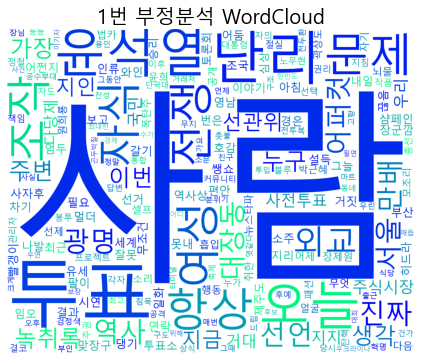

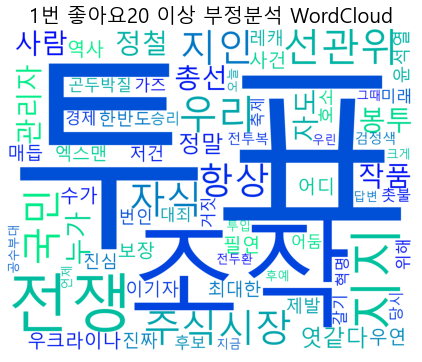

In [275]:
wc = WordCloud(font_path= 'malgun',stopwords=stop_words,background_color ='white', colormap='autumn', width=1000, height=800, scale=2.0, max_font_size=1000)
neg_gen = wc.generate_from_frequencies(c_neg)
plt.figure()
plt.axis("off")
plt.title('1번 부정분석 WordCloud', fontsize=20)
plt.imshow(neg_gen)
plt.show()

like20_neg_gen = wc.generate_from_frequencies(like20_c_neg)
plt.figure()
plt.axis("off")
plt.title('1번 좋아요20 이상 부정분석 WordCloud', fontsize=20)
plt.imshow(like20_neg_gen)
plt.show()


# 키워드: 2번 데이터

In [39]:
number2 = pd.read_csv('D:\PY4E\DS\snsscrape/2번_라벨링.csv')
number2.describe()

,Unnamed: 0,Like Count,pred
count,277.000000,277.000000,277.000000
mean,148.389892,12.314079,0.610108
std,86.474715,52.741566,0.488608
min,0.000000,0.000000,0.000000
25%,74.000000,0.000000,0.000000
50%,149.000000,2.000000,1.000000
75%,222.000000,8.000000,1.000000
max,303.000000,670.000000,1.000000


## USERNAME 분석: 트윗을 가장 많이 작성한 User TOP 20

In [40]:
# 총 Username 갯수
number2['Username'].nunique()
# 총 유저의 트윗 작성 갯수 및 평균 갯수
total_user2 = number2['Username'].value_counts()
print(total_user2, total_user.describe())

7mzdpBckxrIhhye    36
lehlovey0          28
bh5742             18
cocomong337        13
kapuchi14796891    12
                   ..
babo_baboya         1
yJ4s3gyQeouoiWD     1
taesooni            1
MayJunoS            1
SoHaPins            1
Name: Username, Length: 97, dtype: int64 count    81.000000
mean      1.679012
std       2.166952
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      14.000000
Name: Username, dtype: float64


In [41]:
# Top20 유저의 총 트윗 작성 갯수 및 평균 갯수
top20_user2 = number2['Username'].value_counts()[:20]
print(top20_user2.describe(), top20_user2)

count    20.000000
mean      9.350000
std       8.875009
min       3.000000
25%       4.000000
50%       5.500000
75%      12.000000
max      36.000000
Name: Username, dtype: float64 7mzdpBckxrIhhye    36
lehlovey0          28
bh5742             18
cocomong337        13
kapuchi14796891    12
ba1675510          12
miokida            10
liIIIliIiliilII     7
flowergen85         7
AvalosOrdonez       6
jhchoi915jh         5
kyoko1600           5
_bearyi             4
Dongjinary          4
love007i            4
2needukjeel         4
cell_block_D        3
kim2jae1            3
EzPastel            3
chadoolj            3
Name: Username, dtype: int64


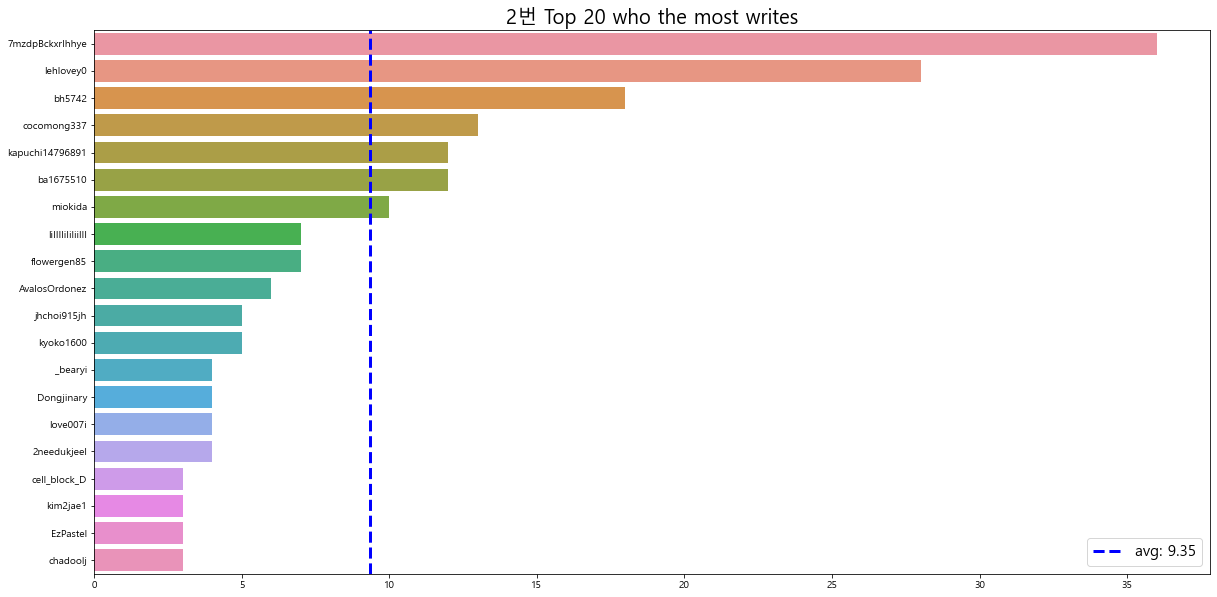

In [42]:
plt.figure(figsize=(20,10))
sns.barplot(x=number2['Username'].value_counts()[:20].values, 
            y=number2['Username'].value_counts()[:20].index, orient='h')
plt.title('2번 Top 20 who the most writes', fontsize=20)
avg = number2['Username'].value_counts()[:20].mean()
plt.axvline(x=np.average(number2['Username'].value_counts()[:20].values), color='b', linestyle='--', linewidth=3, label=f'avg: {round(avg, 2)}')
plt.legend(fontsize=15)
plt.show()

In [43]:
find_user1 = number2[number2['Username'] == '7mzdpBckxrIhhye'].reset_index(drop = True)
find_user2 = number2[number2['Username'] == 'lehlovey0'].reset_index(drop = True)
find_user3 = number2[number2['Username'] == 'bh5742'].reset_index(drop = True)
find_user4 = number2[number2['Username'] == 'cocomong337'].reset_index(drop = True)
# number2[number2['Username'] == 'kapuchi14796891'].style.background_gradient(cmap='Reds')

In [44]:
#컬러 매핑하여 보기 쉽게.
find_user1 = find_user1.style.background_gradient(cmap='Reds')
find_user2 = find_user2.style.background_gradient(cmap='Reds')
find_user3 = find_user3.style.background_gradient(cmap='Reds')
find_user4 = find_user4.style.background_gradient(cmap='Reds')


# 데이터 png로 추출
dfi.export(find_user1, './graph\images/2번 top username table1.png', max_cols=-1, max_rows=-1)
dfi.export(find_user2, './graph\images/2번 top username table2.png', max_cols=-1, max_rows=-1)
dfi.export(find_user3, './graph\images/2번 top username table3.png', max_cols=-1, max_rows=-1)
dfi.export(find_user4, './graph\images/2번 top username table4.png', max_cols=-1, max_rows=-1)


C:\Users\USER\anaconda3\envs\twitterscrape\lib\site-packages\dataframe_image\_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'


In [45]:
find_user4

,Unnamed: 0,Datetime,Username,Like Count,Text,pred
0,77,2022-03-04,cocomong337,14,책 좋아하시는분들 도서정가제 개선되길 바라시죠? 동네서점이 다시 살아나길 바라시죠? #2번_윤석열_도서정가제_약화 시키겠답니다 조용한 동네서점에서 익숙한 얼굴들과 마주보며 책 고르고 싶지 않으세요?,0
1,110,2022-03-01,cocomong337,14,트친님 글보고 북한에서 선물받은 청와대에 있는 풍산개들을 잊고 있었네요 풍산개들 잘 돌볼 사람 #2번_윤석열 풍산개들을 위해서도 #윤석열 이 꼭 청와대 가야 합니다 행복이처럼 풍산개도 이렇게 삐쩍 마르면 어떡해요,0
2,259,2022-02-22,cocomong337,136,대한민국 건국이래 최초로 지역을 넘어 진영을 넘어 정당을 넘어 사람을 보고 투표합시다 #2번엔_2번_윤석열,1
3,260,2022-02-22,cocomong337,18,식물 대통령 윤석열 제대로 쭉쭉 키워 거목으로 만들어보자 #2번엔_윤석열 거목으로 클수 있는 가능성이 많은 #2번_윤석열 (페북 김성민님 글 인용),1
4,284,2022-02-19,cocomong337,9,맞는말 대잔치 김대중 노무현 대통령님 정신을 이어받지도 않으면서 선거철만 되면 이름 팔아서 장사함 #2번에는_윤석열 진영과 지역을 넘어 #2번_윤석열,0
5,292,2022-02-17,cocomong337,80,용민아 늦었어 돌아가 우린 #2번_윤석열 찍을거야 조상님들이 그러셨지 사람은 안변한다고,0
6,293,2022-02-17,cocomong337,500,이짤도 너무 맘에든다 문구가 내맘 현근택 김어준 김용민 안치환 황교익 고민정 덕분에 고민없이 #2번_윤석열,1
7,296,2022-02-16,cocomong337,51,파란을 더하다 #날아라_윤더조이 #악귀를잡을땐_힘을합친다 낡은 진영논리는 이제 버립시다 #2번_윤석열,0
8,297,2022-02-16,cocomong337,22,#윤더조이 #일반인을_단한번도_고발한적이없는_2번_윤석열 서초동 검찰청앞 집회때 집회하는 시민들을 시위하게 내버려뒀던 윤석열 이런 사람인데 정치보복 안합니다,1
9,300,2022-02-15,cocomong337,13,중도층들은 욕댓글 천박한 비속어가 난무하는 댓글들 그냥 안읽고 패쓰하는거 다들 아시죠 우리 품위있게 #2번_윤석열 홍보합시다 #내가살기위해_2번_윤석열,1


## TEXT 분포 분석 : 트윗 TEXT 길이 분포 확인
- Text의 길이로 트윗의 유효성 및 유의미한 데이터인지 확인 할 수 있다.

In [341]:
# Number of characters in tweets
def length(text):    
    '''a function which returns the length of text'''
    return len(text)
number2['Length'] = number2['Text'].apply(length)
print('total dist :','\n', number2['Length'].describe())

# 긍정데이터 describe
pos_char_length = number2[number2['pred'] == 1]['Length']
print('positive dist : ','\n',pos_char_length.describe())

# 부정데이터 describe
neg_char_length = number2[number2['pred'] == 0]['Length']
print('negative dist : ','\n', neg_char_length.describe())

total dist : 
 count    277.000000
mean      71.137184
std       44.687189
min       10.000000
25%       37.000000
50%       61.000000
75%      100.000000
max      238.000000
Name: Length, dtype: float64
positive dist :  
 count    169.000000
mean      63.550296
std       43.652839
min       10.000000
25%       32.000000
50%       49.000000
75%       85.000000
max      203.000000
Name: Length, dtype: float64
negative dist :  
 count    108.000000
mean      83.009259
std       43.885044
min       10.000000
25%       46.500000
50%       72.000000
75%      120.500000
max      238.000000
Name: Length, dtype: float64


C:\Users\USER\anaconda3\envs\twitterscrape\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


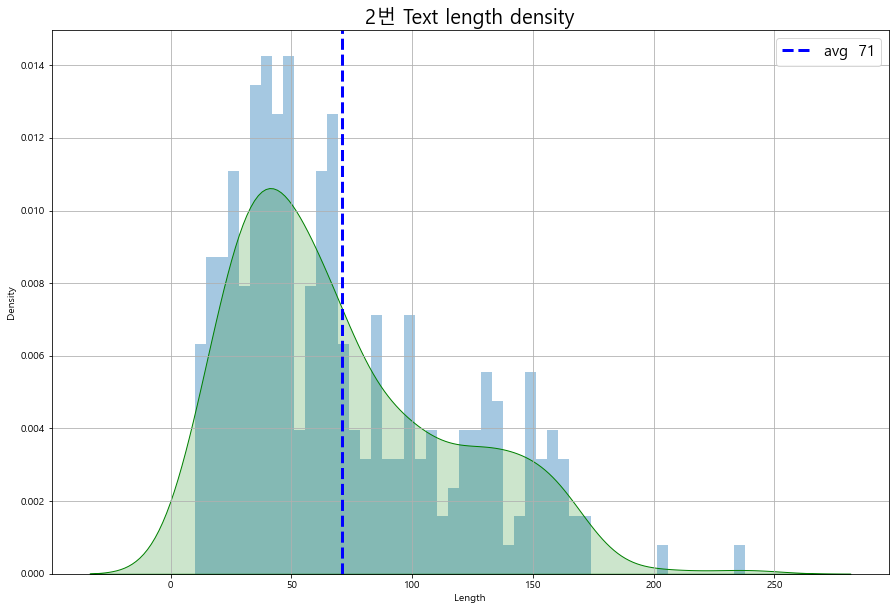

In [330]:
plt.figure(figsize=(15,10))
plt.grid()
sns.distplot(a= number2['Length'], bins=50, kde=True, kde_kws={"color":"g", "alpha":0.2, "linewidth":1, "shade":True})
x_label = int(np.average(number2['Length']))
plt.axvline(x=np.average(number2['Length']), color='b', linestyle='--', linewidth=3, label=f'avg  {x_label}')
plt.legend(fontsize=15)
plt.title("2번 Text length density", fontsize=20)

plt.show()
# save_fig('Text length distribution')

## HASHTAG 분석 : 어떤 해시태그가 사용되었는지 확인

In [364]:
hashs2 = number2[number2['Text'].apply(lambda x : x.startswith('#'))]
print(hashs2)
hashs2['Text'] = hashs2['Text'].str.split('\n').apply(lambda x : [i for i in x if i.startswith('#') ])
hashs2['Text'] = hashs2['Text'].apply(lambda x: ' '.join(x))
hashs2['Text'] = hashs2['Text'].str.split(' ').apply(lambda x : [i for i in x if i.startswith('#') ])
hashs2['Text']

     Unnamed: 0    Datetime         Username  Like Count  \
1             1  2022-03-09      NBCsergeant           0   
4             4  2022-03-09        couple089           0   
5             5  2022-03-09   worldcutyjimin           2   
7             7  2022-03-09          makgang           0   
8             8  2022-03-09    workout_jinhe           0   
17           17  2022-03-08   dogecointheman           0   
20           20  2022-03-08      flowergen85           1   
30           31  2022-03-07        ba1675510           1   
33           35  2022-03-07        catzeroth           1   
35           37  2022-03-06          sesim29           0   
38           40  2022-03-06    AvalosOrdonez           0   
42           45  2022-03-05         love007i           0   
43           46  2022-03-05         love007i           2   
44           48  2022-03-05         love007i           5   
55           59  2022-03-04  qDwvgsmAjVaeqT8          66   
60           64  2022-03-04      babo_ba

C:\Users\USER\AppData\Local\Temp\ipykernel_18152\2075425871.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hashs2['Text'] = hashs2['Text'].str.split('\n').apply(lambda x : [i for i in x if i.startswith('#') ])
C:\Users\USER\AppData\Local\Temp\ipykernel_18152\2075425871.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hashs2['Text'] = hashs2['Text'].apply(lambda x: ' '.join(x))
C:\Users\USER\AppData\Local\Temp\ipykernel_18152\2075425871.py:5: SettingWithCopyWarning: 
A value is trying to be set on a 

1                                            [#2번, #윤석열]
4                              [#회대통령선거, #2번, #대통령선거인증샷]
5                         [#2번엔_2번_윤석열, #민주당응징, #이재명_감옥]
7                                     [#윤석열, #유리천장, #2번]
8                                  [#윤석열대통령, #투표완료, #2번]
17                                                 [#2번]
20                         [#2번엔_2번_윤석열, #윤석열찍고_이재명퇴치하자]
30                                          [#2번_윤석열대통령]
33                                   [#궁금하면_2번, #대장동_몸통]
35                    [#일단_2번, #대장동_언박싱, #더민주_오렌지뻐꾸기_청산]
38                              [#윤희진, #국민의힘, #윤석열, #2번]
42                                          [#2번, #정권교체]
43                          [#2번, #윤석열, #정권교체, #2번, #2번]
44                                    [#2번, #윤석열, #정권교체]
55                                                 [#2번]
60                     [#2긴다, #2번엔, #2번, #2가, #2번에도사전투표]
61                                            [#박제, #2번]
66                             

In [347]:
# 단어 주머니 만들기
word_of_Bag2 = sum(hashs2['Text'], [])
print(word_of_Bag2)

['#2번', '#윤석열', '#회대통령선거', '#2번', '#대통령선거인증샷', '#2번엔_2번_윤석열', '#민주당응징', '#이재명_감옥', '#윤석열', '#유리천장', '#2번', '#윤석열대통령', '#투표완료', '#2번', '#2번', '#2번엔_2번_윤석열', '#윤석열찍고_이재명퇴치하자', '#2번_윤석열대통령', '#궁금하면_2번', '#대장동_몸통', '#일단_2번', '#대장동_언박싱', '#더민주_오렌지뻐꾸기_청산', '#윤희진', '#국민의힘', '#윤석열', '#2번', '#2번', '#정권교체', '#2번', '#윤석열', '#정권교체', '#2번', '#2번', '#2번', '#윤석열', '#정권교체', '#2번', '#2긴다', '#2번엔', '#2번', '#2가', '#2번에도사전투표', '#박제', '#2번', '#2번', '#', '#윤석열', '#사전투표', '#2번', '#사전투표', '#2번', '#2번에도_2번_찍는다', '#윤석열찍으면_김용민_너때문인줄알아라', '#이니_여리', '#이니_여리', '#사전투표_여리에게', '#2번엔_2번_여리', '#이번엔_2번_윤석열', '#이번에도_2번_윤석열', '#유권자_단일화_2번', '#국민단일후보', '#2번', '#국민단일후보', '#2번', '#윤석열', '#2/', '#', '#', '#이재명_망신', '#이재명_파이낸셜타임즈망신', '#이재명_부정선거', '#이재명_게이트', '#대장동주범이재명', '#대장동비리개발결재권자이재명수사', '#윤석열_지지선언', '#윤석열찍고_이재명퇴치하자', '#윤석열찍으면이재명감옥간다', '#나를위해윤석열', '#2번엔_2번_윤석열', '#힘을_통한_평화', '#2번엔_2번_윤석열', '#선제타격_지지', '#', '#힘을통한_평화', '#2번엔_2번_윤석열', '#2번엔_2번_윤석열', '#', '#2번엔_2번_윤석열', '#2번엔_윤석열', '#2번엔_2번_윤석열', '#2번에는_2번_윤석렬로_가는거야', '#이번엔_2번

C:\Users\USER\anaconda3\envs\twitterscrape\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


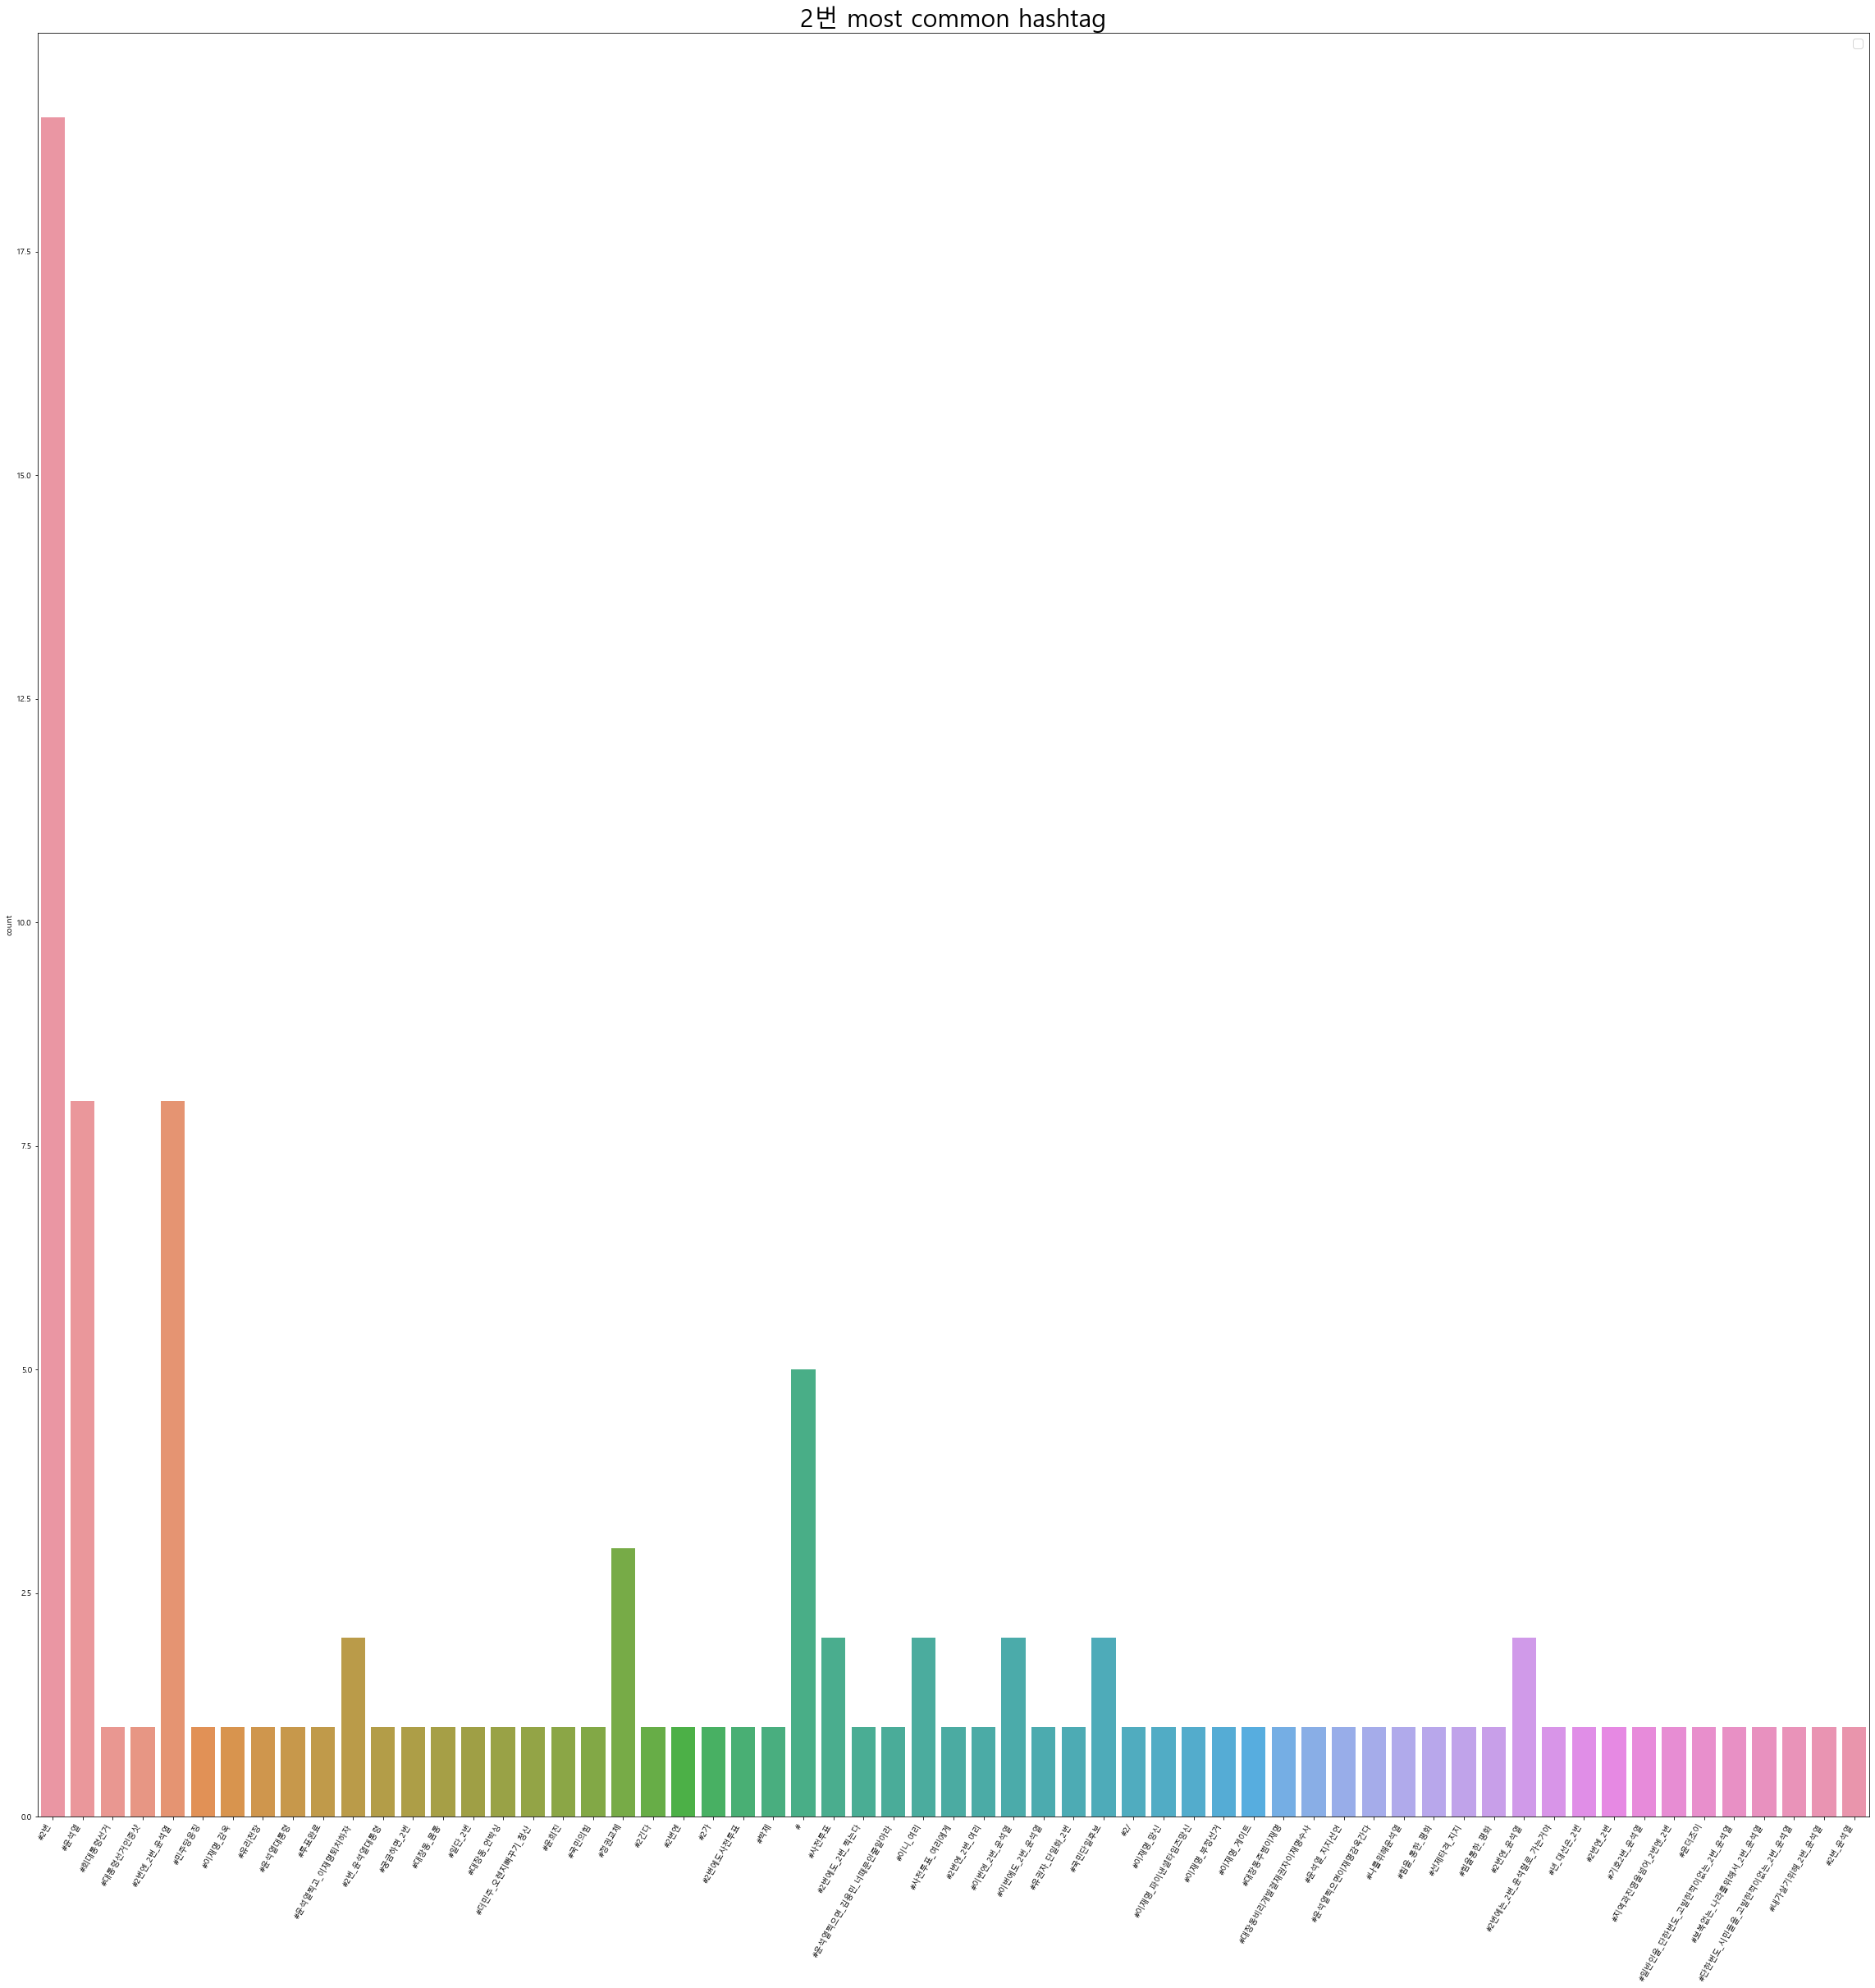

In [350]:
# 가장 많이 사용된 해시태그 그래프
plt.figure(figsize=(40,40))
plot = sns.countplot(word_of_Bag2)
plot.set_xticklabels(plot.get_xticklabels(), rotation=60, horizontalalignment='right')
plt.title('2번 most common hashtag', fontsize=30)
plt.legend(fontsize=15)
plt.show()

### 해시태그 top10 확인

In [355]:
import operator
w_count={}
for n in word_of_Bag2:
    try: w_count[n] += 1
    except: w_count[n] = 1
w_count
ww = sorted(w_count.items(), key=operator.itemgetter(1), reverse=True)
# ww[0][0]
# ww[0][1]
ww[:10]


[('#2번', 19),
 ('#윤석열', 8),
 ('#2번엔_2번_윤석열', 8),
 ('#', 5),
 ('#정권교체', 3),
 ('#윤석열찍고_이재명퇴치하자', 2),
 ('#사전투표', 2),
 ('#이니_여리', 2),
 ('#이번엔_2번_윤석열', 2),
 ('#국민단일후보', 2)]

In [370]:
why2_1 = number2[number2['Text'].str.contains('이니_여리')]
dfi.export(why2_1.style.background_gradient(cmap='Reds'), './graph\images/2번 hashtag why1.png', max_cols=-1, max_rows=-1)
why2_1.style.background_gradient(cmap='Reds')

,Unnamed: 0,Datetime,Username,Like Count,Text,pred,Length
101,109,2022-03-01,1845dongggle,3,#이니_여리 #이니_여리 #사전투표_여리에게 #2번엔_2번_여리,1,38


In [376]:
why2_2 = number2[number2['Text'].str.contains('#정권교체')]
dfi.export(why2_2.style.background_gradient(cmap='Reds'), './graph\images/2번 hashtag why2.png', max_cols=-1, max_rows=-1)
why2_2.style.background_gradient(cmap='Reds')

,Unnamed: 0,Datetime,Username,Like Count,Text,pred,Length
42,45,2022-03-05,love007i,0,#2번 엔 #정권교체 진정한 국민의 열망이다.,1,26
43,46,2022-03-05,love007i,2,#2번 엔 #윤석열 로 #정권교체 드라마에서도 #2번 전국민이 #2번 을 열망한다. 국민에게 희망이 있는 정정당당 코리아,1,68
44,48,2022-03-05,love007i,5,#2번 엔 #윤석열 로 #정권교체 희망 가득한 대한민국의 미래,1,35
263,286,2022-02-19,moda126917,11,체육인들 여당 지지는 되고 야당 지지는 안된다⁉️ 😱 미친 좌빨 정부 🥵 #이번에는 #2번 #정권교체,0,59


## N-gram 분석
	모델명	                        구현 결과
1	Unigram(N=1)	오늘, 점심, 추천, 메뉴, 파스타, 피자

2	Bigram(N=2)	오늘 점심, 점심 추천, 추천 메뉴, 메뉴 파스타, 파스타, 피자

3	Trigram(N=3)	오늘 점심 추천, 점심 추천 메뉴, 추천 메뉴 파스타, 메뉴 파스타 피자

4	4-gram(N=4)	오늘 점심 추천 메뉴, 점심 추천 메뉴 파스타, 추천 메뉴 파스타 피자

In [381]:
n_gram_df2 = number2['Text'].str.split()
n_gram_df2 = n_gram_df2.values.tolist()
n_gram_df2

[['#', '6️⃣8️⃣', '4️⃣5️⃣', '2번', '-_-'],
 ['#2번', '#윤석열', '방금'],
 [';-', '1번', '뽑혔을때', '2번', '뽑혔을때-', ';'],
 ['뭐', '먹을까?', '고민된다', '일단', '2렇게', '즐겨본다', '#2번_윤석열'],
 ['#회대통령선거', '#2번', '#대통령선거인증샷', '페미', '조지자'],
 ['#2번엔_2번_윤석열', '#민주당응징', '#이재명_감옥'],
 ['빨리', '이', '짤', '보고', '싶네요', '가피우스', '#2번', '#윤석열', '#이재명감옥', '#민주당좋됨'],
 ['#윤석열',
  '되면',
  '#유리천장',
  '절대',
  '안깨진다.',
  '여성들이',
  '#2번',
  '찍는',
  '것은',
  '스스로',
  '발목',
  '잡는거'],
 ['#윤석열대통령', '#투표완료', '#2번', '❤️🥺🥺'],
 ['국민을', '위한다면', '윤', '석', '열', '이지!!', '#2번엔_2번_윤석열'],
 ['원래',
  '약점많고',
  '부패한',
  '사람은',
  '부패한',
  '사람',
  '좋아합니다',
  '"다',
  '집어',
  '넣어요욬~"',
  '몇번을',
  '들어도',
  '빵터진다',
  '우렁찬',
  '아주머니들',
  '짱✌️✌️✌️',
  '잠깐이었지만~',
  '국힘당',
  '아주머니들과',
  '찢빠들',
  '욕',
  '무진장',
  '하고',
  '옴🤭',
  '#투표하세요',
  '#문파라서_2번',
  '✌️✌️✌️'],
 ['1번',
  '-',
  '#-',
  '-',
  '#-',
  '-',
  '-',
  '#-',
  '-',
  '#-',
  '-',
  '-',
  '#-',
  '2번',
  '-',
  '#-',
  '-',
  '-',
  '#-',
  '-',
  '#-',
  '-',
  '#-',
  '-',
  '-',
  '#-',
  '3번',
  

In [382]:
ngram_words2 = [n for n in n_gram_df2 if len(n) > 1]
corpus = sum(ngram_words2, [])
corpus

['#',
 '6️⃣8️⃣',
 '4️⃣5️⃣',
 '2번',
 '-_-',
 '#2번',
 '#윤석열',
 '방금',
 ';-',
 '1번',
 '뽑혔을때',
 '2번',
 '뽑혔을때-',
 ';',
 '뭐',
 '먹을까?',
 '고민된다',
 '일단',
 '2렇게',
 '즐겨본다',
 '#2번_윤석열',
 '#회대통령선거',
 '#2번',
 '#대통령선거인증샷',
 '페미',
 '조지자',
 '#2번엔_2번_윤석열',
 '#민주당응징',
 '#이재명_감옥',
 '빨리',
 '이',
 '짤',
 '보고',
 '싶네요',
 '가피우스',
 '#2번',
 '#윤석열',
 '#이재명감옥',
 '#민주당좋됨',
 '#윤석열',
 '되면',
 '#유리천장',
 '절대',
 '안깨진다.',
 '여성들이',
 '#2번',
 '찍는',
 '것은',
 '스스로',
 '발목',
 '잡는거',
 '#윤석열대통령',
 '#투표완료',
 '#2번',
 '❤️🥺🥺',
 '국민을',
 '위한다면',
 '윤',
 '석',
 '열',
 '이지!!',
 '#2번엔_2번_윤석열',
 '원래',
 '약점많고',
 '부패한',
 '사람은',
 '부패한',
 '사람',
 '좋아합니다',
 '"다',
 '집어',
 '넣어요욬~"',
 '몇번을',
 '들어도',
 '빵터진다',
 '우렁찬',
 '아주머니들',
 '짱✌️✌️✌️',
 '잠깐이었지만~',
 '국힘당',
 '아주머니들과',
 '찢빠들',
 '욕',
 '무진장',
 '하고',
 '옴🤭',
 '#투표하세요',
 '#문파라서_2번',
 '✌️✌️✌️',
 '1번',
 '-',
 '#-',
 '-',
 '#-',
 '-',
 '-',
 '#-',
 '-',
 '#-',
 '-',
 '-',
 '#-',
 '2번',
 '-',
 '#-',
 '-',
 '-',
 '#-',
 '-',
 '#-',
 '-',
 '#-',
 '-',
 '-',
 '#-',
 '3번',
 '-',
 '#-',
 '-',
 '-',
 '#-',
 '-',
 '#-',
 '

In [385]:
c_vec2 = CountVectorizer(ngram_range=(2,2)).fit(corpus)
bag_of_words2 = c_vec2.transform(corpus)
sum_words2 = bag_of_words2.sum(axis=0)
sum_words2

matrix([[3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1]], dtype=int64)

In [386]:
words_freq2 = [(word, sum_words2[0, idx])  for word, idx in c_vec2.vocabulary_.items()]
words_freq2

words_freq2 = sorted(words_freq2, key = lambda x: x[1], reverse=True)
words_freq2

[('4일 5일', 3),
 ('꾸면 그건', 1),
 ('건축가 훈데르트바서의', 1),
 ('있다 2번에도_2번', 1),
 ('한다 2번', 1),
 ('찍으라고 사전투표_2번', 1),
 ('흐믓 해지는', 1),
 ('단독 백범', 1),
 ('약무호남 若無湖南', 1),
 ('시무국가 是無國家', 1),
 ('걱정된다 결과', 1),
 ('초연생 이란', 1),
 ('출신 그래서', 1),
 ('단두대행 2번엔_2번_윤석열', 1),
 ('투표심판할거다 2번엔_2번_윤석열', 1),
 ('했는데 유족', 1),
 ('그래 극문똥파리는', 1),
 ('그냥 가끔', 1),
 ('김대중 노무현', 1),
 ('노무현 문재인대통령', 1),
 ('심판할거다 2번엔_2번_윤석열', 1),
 ('참아냈구나 미안한', 1),
 ('얘들아 이번에', 1)]

In [387]:
top_n_bigrams2 = words_freq2[:10]
x,y=map(list,zip(*top_n_bigrams2))
top_n_bigrams2

[('4일 5일', 3),
 ('꾸면 그건', 1),
 ('건축가 훈데르트바서의', 1),
 ('있다 2번에도_2번', 1),
 ('한다 2번', 1),
 ('찍으라고 사전투표_2번', 1),
 ('흐믓 해지는', 1),
 ('단독 백범', 1),
 ('약무호남 若無湖南', 1),
 ('시무국가 是無國家', 1)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


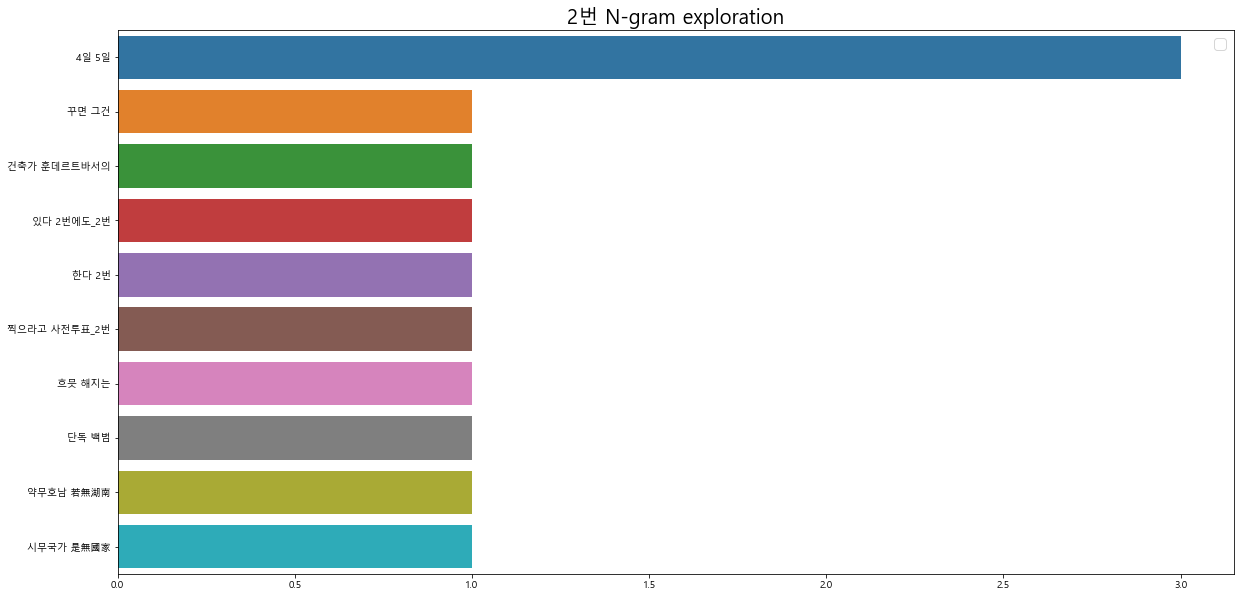

In [388]:
plt.figure(figsize=(20,10))
sns.barplot(x=y,y=x)
plt.title('2번 N-gram exploration', fontsize=20)
plt.legend(fontsize=15)
plt.show()

In [397]:
why2_3 = number2[number2['Text'].str.contains('훈데르트바서의')]
why2_3.style.background_gradient(cmap='Reds')

# dfi.export(why4.style.background_gradient(cmap='Blues'), './graph\images/1번 weekly why 김만배.png', max_cols=-1, max_rows=-1)


,Unnamed: 0,Datetime,Username,Like Count,Text,pred,Length
49,53,2022-03-05,mesodehan,1,"'나 혼자 꿈을 꾸면,그건 한갓 꿈일 뿐이다. 하지만, 우리 모두가 함께 꿈을 꾸면, 그것은 새로운 현실의 출발이다' 치유의 건축가,훈데르트바서의 말이다. 지금 대다수 많은 우리가 같은 꿈을 꾸고 있다.#2번에도_2번",0,122


## 날짜별 분석
- Preprocessing code with Mecab

In [143]:
daily_df2 = number2.copy()
daily_df2

,Unnamed: 0,Datetime,Username,Like Count,Text,pred
0,0,2022-03-09,kimbaeki,0,# 6️⃣8️⃣ 4️⃣5️⃣ 2번 -_-,1
1,1,2022-03-09,NBCsergeant,0,#2번 #윤석열 방금,1
2,2,2022-03-09,the_b017,2,;- 1번 뽑혔을때 ...,0
3,3,2022-03-09,2needukjeel,0,뭐 먹을까? 고민된다 일단 2렇게 즐겨본다 #2번_윤석열,0
4,4,2022-03-09,couple089,0,#회대통령선거 #2번 #대통령선거인증샷 페미 조지자,1
...,...,...,...,...,...,...
272,299,2022-02-15,liIIIliIiliilII,3,_ _ 막아야 합니다! 한표 행사해 주십쇼. #2번,1
273,300,2022-02-15,cocomong337,13,중도층들은 욕댓글 천박한 비속어가 난무하는 댓글들 그냥 안읽고 패쓰하는거 ...,1
274,301,2022-02-15,cocomong337,20,윤석열 영업은 나의 생사가 달린 문제가 됏다 #내가_살기위해서_2번_윤석열 ...,0
275,302,2022-02-15,cocomong337,17,#보복없는_나라를위해서_2번_윤석열 #단한번도_시민들을_고발한적이없는_2번_윤석열,1


In [144]:
import re

def cleasing(text): 
    repl ='' 
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)' # 자음, 모음 제거 
    text = re.sub(pattern= pattern, repl=repl, string=text) 
    pattern = '[^\w\s]' # 특수기호 제거 
    # pattern = '[^가-히\s]' # 특수기호 제거 
    # pattern = ''
    # string = string.replace(u'\xa0', u' ')
    text = re.sub(pattern= pattern, repl=repl, string=text) 
    pattern = '<[^>]*>' # html 제거 
    text = re.sub(pattern = pattern, repl='',string=text) 
    return text

daily_df2['Text'] = daily_df2['Text'].map(lambda x: cleasing(x))
daily_df2['Text']  = daily_df2['Text'].apply(lambda x: str(x).replace(u'\xa0', u''))

daily_df2

,Unnamed: 0,Datetime,Username,Like Count,Text,pred
0,0,2022-03-09,kimbaeki,0,68 45 2번 _,1
1,1,2022-03-09,NBCsergeant,0,2번 윤석열 방금,1
2,2,2022-03-09,the_b017,2,1번 뽑혔을때 2번...,0
3,3,2022-03-09,2needukjeel,0,뭐 먹을까 고민된다 일단 2렇게 즐겨본다 2번_윤석열,0
4,4,2022-03-09,couple089,0,회대통령선거 2번 대통령선거인증샷 페미 조지자,1
...,...,...,...,...,...,...
272,299,2022-02-15,liIIIliIiliilII,3,_ _ 막아야 합니다 한표 행사해 주십쇼 2번,1
273,300,2022-02-15,cocomong337,13,중도층들은 욕댓글 천박한 비속어가 난무하는 댓글들 그냥 안읽고 패쓰하는거 ...,1
274,301,2022-02-15,cocomong337,20,윤석열 영업은 나의 생사가 달린 문제가 됏다 내가_살기위해서_2번_윤석열 ...,0
275,302,2022-02-15,cocomong337,17,보복없는_나라를위해서_2번_윤석열 단한번도_시민들을_고발한적이없는_2번_윤석열,1


In [145]:
mecab = Mecab()# Mecab User Dic Path

def preprocessing_mecab(readData):
    
    #### Clean text
    #sentence = CleanText(readData)
    
    #### Tokenize
    morphs = mecab.pos(readData)
    
    JOSA = ["JKS", "JKC", "JKG", "JKO", "JKB", "JKV", "JKQ", "JX", "JC"] # 조사
    SIGN = ["SF", "SE", "SSO", "SSC", "SC", "SY"] # 문장 부호
    TERMINATION = ["EP", "EF", "EC", "ETN", "ETM"] # 어미
    SUPPORT_VERB = ["VX"] # 보조 용언
    NUMBER = ["SN"]
    
    # Remove JOSA, EOMI, etc
    morphs[:] = (morph for morph in morphs if morph[1] not in JOSA+SIGN+TERMINATION+SUPPORT_VERB)
        
    # Remove length-1 words  
    morphs[:] = (morph for morph in morphs if not (len(morph[0]) == 1))
    
    # Remove Numbers
    # morphs[:] = (morph for morph in morphs if morph[1] not in NUMBER)

    # Result pop-up
    result = []
    for morph in morphs:
        result.append(morph[0])
        
    return result


In [146]:
stop_words = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
plus_stop_words = ['윤석열','아스트로','로하','오프', '진짜','번남번남', '이번', '지금', '우리', '번남', '정말','때문','사실', '오늘','한다', '세요', '합니다', '입니다', 'ㅋㅋㅋ', 'ㅋㅋ','진짜', '아니', '근데', '그냥', '라고', '한다고', '해서', '이런', '어차피', '버리', '된다는','생겼', '인데', '해도', '된다', '이거']
for word in plus_stop_words:
    stop_words.append(word) 

In [147]:
daily_df2['Tokenized'] = daily_df2['Text'].apply(lambda x: preprocessing_mecab(x))
daily_df2['Tokenized'] = daily_df2['Tokenized'].apply(lambda x: [item for item in x if item not in stop_words])
daily_df2.head(5)

,Unnamed: 0,Datetime,Username,Like Count,Text,pred,Tokenized
0,0,2022-03-09,kimbaeki,0,68 45 2번 _,1,"[68, 45]"
1,1,2022-03-09,NBCsergeant,0,2번 윤석열 방금,1,[방금]
2,2,2022-03-09,the_b017,2,1번 뽑혔을때 2번...,0,"[뽑혔, 뽑혔]"
3,3,2022-03-09,2needukjeel,0,뭐 먹을까 고민된다 일단 2렇게 즐겨본다 2번_윤석열,0,"[고민, 일단, 즐겨, 본다]"
4,4,2022-03-09,couple089,0,회대통령선거 2번 대통령선거인증샷 페미 조지자,1,"[대통령, 선거, 대통령, 선거, 인증, 페미, 조지]"


###  날짜별 최빈단어와 빈도수 찾는 함수

In [148]:
def common_words(words, k):
    c = Counter(words)
    cw = c.most_common(k)
    return c, cw

def add_value_labels(ax, spacing=5):
    for idx, rect in enumerate(ax.patches):
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'

        label = "{0}".format(date_df2['Word'][idx])

        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)


### Daily most word

In [149]:
daily_df2['Datetime'].unique()

array(['2022-03-09', '2022-03-08', '2022-03-07', '2022-03-06',
       '2022-03-05', '2022-03-04', '2022-03-03', '2022-03-02',
       '2022-03-01', '2022-02-28', '2022-02-27', '2022-02-26',
       '2022-02-25', '2022-02-24', '2022-02-23', '2022-02-22',
       '2022-02-21', '2022-02-20', '2022-02-19', '2022-02-18',
       '2022-02-17', '2022-02-16', '2022-02-15'], dtype=object)

In [150]:
# 날짜별 가장 많이 언급된 단어와 단어의 갯수를 dict형태로 가져와서 dataframe으로 만들어주는 과정
date = []
word_list = []
count_list = []

for i in daily_df2['Datetime'].unique():
    tokenizing = sum(daily_df2[daily_df2['Datetime'] == i]['Tokenized'],[])
    c, cw = common_words(tokenizing, 1)    
    word = cw[0][0]
    count = cw[0][1]
    date.append(i)
    word_list.append(word)
    count_list.append(count)

date_word_dict2 = {'Date' : date, 'Word' : word_list, 'Count' : count_list}

date_df2 = pd.DataFrame(date_word_dict2, columns=['Date', 'Word', 'Count'])
date_df2

,Date,Word,Count
0,2022-03-09,대통령,3
1,2022-03-08,자식,4
2,2022-03-07,몸통,3
3,2022-03-06,투표,5
4,2022-03-05,정권,3
5,2022-03-04,투표,7
6,2022-03-03,사전,6
7,2022-03-02,후보,13
8,2022-03-01,여리,5
9,2022-02-28,투표,8


C:\Users\USER\anaconda3\envs\twitterscrape\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


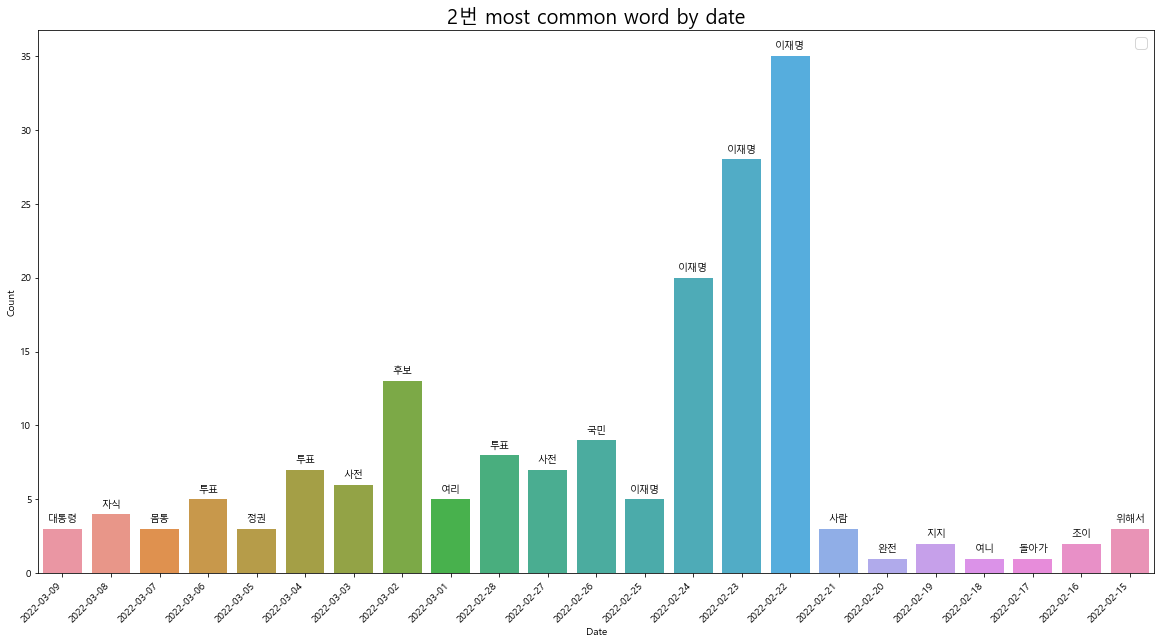

C:\Users\USER\anaconda3\envs\twitterscrape\lib\site-packages\dataframe_image\_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'


,Date,Word,Count
0,2022-03-09,대통령,3
1,2022-03-08,자식,4
2,2022-03-07,몸통,3
3,2022-03-06,투표,5
4,2022-03-05,정권,3
5,2022-03-04,투표,7
6,2022-03-03,사전,6
7,2022-03-02,후보,13
8,2022-03-01,여리,5
9,2022-02-28,투표,8


In [151]:
# graph
fig, ax = plt.subplots(1, figsize=(20,10))
plot = sns.barplot(date_df2['Date'], date_df2['Count'])
add_value_labels(ax)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('2번 most common word by date', fontsize=20)
plt.legend(fontsize=15)
plt.show()

dfi.export(date_df2.style.background_gradient(cmap='Reds'), './graph\images/2번 daily most word table.png', max_cols=-1, max_rows=-1)
date_df2

### Weekly most word

In [152]:
weekly_df_n2 = daily_df2.copy()
weekly_df_n2['Datetime'].unique()

array(['2022-03-09', '2022-03-08', '2022-03-07', '2022-03-06',
       '2022-03-05', '2022-03-04', '2022-03-03', '2022-03-02',
       '2022-03-01', '2022-02-28', '2022-02-27', '2022-02-26',
       '2022-02-25', '2022-02-24', '2022-02-23', '2022-02-22',
       '2022-02-21', '2022-02-20', '2022-02-19', '2022-02-18',
       '2022-02-17', '2022-02-16', '2022-02-15'], dtype=object)

In [154]:
##전체 일자 주별로 나누기
#  week1
weekly_df1= weekly_df_n2[weekly_df_n2['Datetime']<='2022-02-15' ]
weekly_df1 = pd.DataFrame(weekly_df1, columns=['Datetime', 'Username', 'Like Count','Text','pred', 'Tokenized'])

#week2
weekly_df2 = weekly_df_n2[weekly_df_n2['Datetime'] <= '2022-02-22']
weekly_df2 = weekly_df2[weekly_df2['Datetime'] > '2022-02-15']

weekly_df2 = pd.DataFrame(weekly_df2, columns=['Datetime', 'Username', 'Like Count','Text','pred', 'Tokenized'])

weekly_df3 = weekly_df_n2[weekly_df_n2['Datetime'] <= '2022-03-01']
weekly_df3 = weekly_df3[weekly_df3['Datetime'] > '2022-02-22']
weekly_df3 = pd.DataFrame(weekly_df3, columns=['Datetime', 'Username', 'Like Count','Text','pred', 'Tokenized'])

weekly_df4 = weekly_df_n2[weekly_df_n2['Datetime'] <= '2022-03-09']
weekly_df4 = weekly_df4[weekly_df4['Datetime'] > '2022-03-01']
weekly_df4 = pd.DataFrame(weekly_df4, columns=['Datetime', 'Username', 'Like Count','Text','pred', 'Tokenized'])

weekly_df4

,Datetime,Username,Like Count,Text,pred,Tokenized
0,2022-03-09,kimbaeki,0,68 45 2번 _,1,"[68, 45]"
1,2022-03-09,NBCsergeant,0,2번 윤석열 방금,1,[방금]
2,2022-03-09,the_b017,2,1번 뽑혔을때 2번...,0,"[뽑혔, 뽑혔]"
3,2022-03-09,2needukjeel,0,뭐 먹을까 고민된다 일단 2렇게 즐겨본다 2번_윤석열,0,"[고민, 일단, 즐겨, 본다]"
4,2022-03-09,couple089,0,회대통령선거 2번 대통령선거인증샷 페미 조지자,1,"[대통령, 선거, 대통령, 선거, 인증, 페미, 조지]"
...,...,...,...,...,...,...
95,2022-03-02,miokida,2,_ 월드 놈의 사유당 코싸당 이번 대선으로 아주 확찢어지길 바란다 만나서 ...,0,"[월드, 사유, 대선, 아주, 찢어지, 바란다, 만나, 웠고, 다시, 만나]"
96,2022-03-02,mesodehan,4,2번에도_2번_찍는다 윤석열찍으면_김용민_너때문인줄알아라,0,[김용민]
97,2022-03-02,jeonghanivrse,1,2번 ...,1,[]
98,2022-03-02,bh5742,24,년 대선 년 대선 문재인 후보를 지지하고 소중한 한표를 행사 했다 민주당 후보라서가...,0,"[대선, 대선, 문재, 후보, 지지, 소중, 행사, 민주당, 후보, 라서, 문재인,..."


In [155]:
w_tokenized1 = weekly_df1['Text'].apply(lambda x: preprocessing_mecab(x))
w_tokenized2 = weekly_df2['Text'].apply(lambda x: preprocessing_mecab(x))
w_tokenized3 = weekly_df3['Text'].apply(lambda x: preprocessing_mecab(x))
w_tokenized4 = weekly_df4['Text'].apply(lambda x: preprocessing_mecab(x))

w_tokenized = [w_tokenized1, w_tokenized2, w_tokenized3, w_tokenized4]
w_tokenized

[272                                        [합니다, 행사, 십쇼]
 273    [중도, 댓글, 천박, 비속어, 난무, 댓글, 그냥, 우리, 품위있, 윤석열, 홍보...
 274    [윤석열, 영업, 생사, 달린, 문제, 됏다, 위해서, 윤석열, 시민, 발한, 윤석...
 275                      [보복, 나라, 위해서, 윤석열, 시민, 발한, 윤석열]
 276                              [위해, 윤석열, 가입, 위해서, 윤석열]
 Name: Text, dtype: object,
 236                                      [윤석열, 윤석열, 윤석렬]
 237                                            [무슨, 윤석열]
 238                                    [죄명, 처벌, 감옥, 윤석렬]
 239    [껍떼기만, 이재명, 민주당, 이재명, 게이트, 이재명, 민주당, 게이트, 이재명,...
 240    [하루, 번복, 정운현, 단장, 응원, 합니다, 정운현, 윤석열, 후보, 지지, 응...
 241    [미친, 메뚜기, 여기저기, 튀어나오, 민주당, 망할, 징조, 윤석열, 설훈, 때문...
 242                                            [이번, 윤석열]
 243     [대한민국, 건국, 이래, 최초, 지역, 진영, 정당, 사람, 투표, 합시다, 윤석열]
 244    [식물, 대통령, 윤석열, 제대로, 쭉쭉, 키워, 거목, 만들, 윤석열, 거목, 가...
 245                                                 [대선]
 246    [사과, 사과, 어떻게, 같이, 나라, 망한다, 이재명, 게이트, 이재명, 부정, ...
 247    [진짜, 진짜, 경선, 열심히, 오늘, 열심히, 내일, 오늘, 열

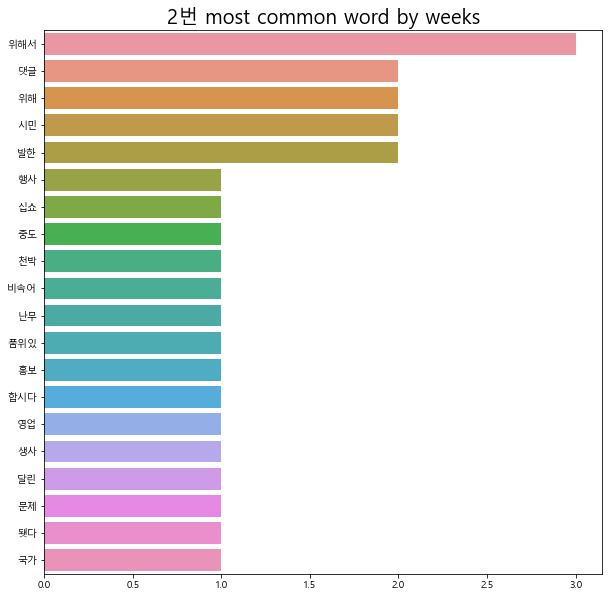

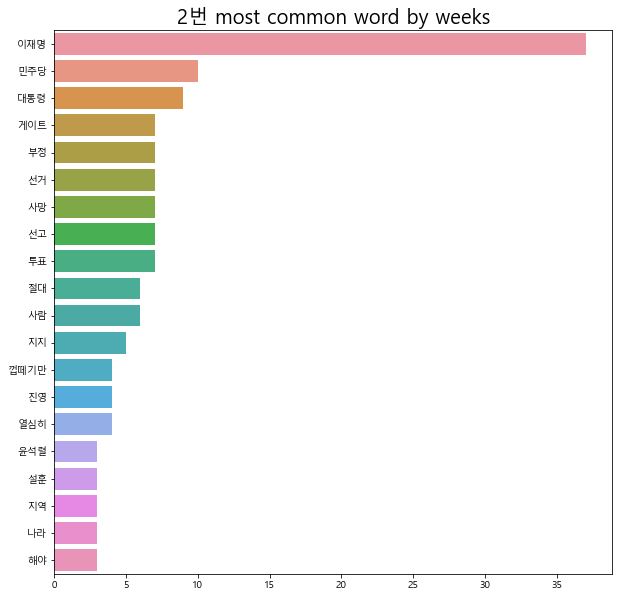

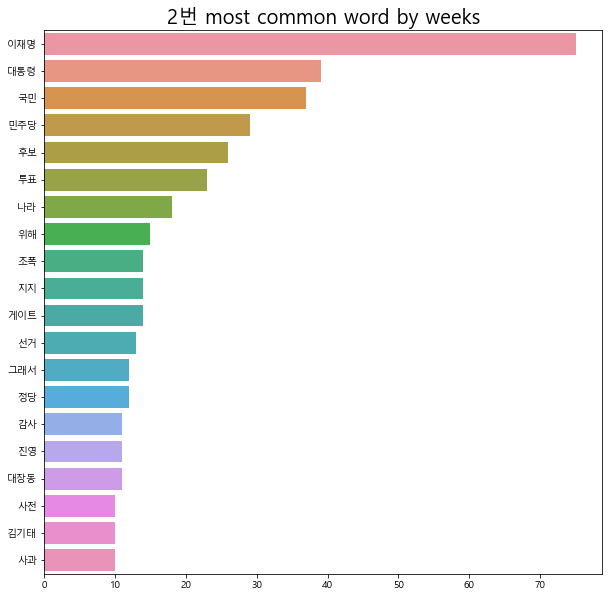

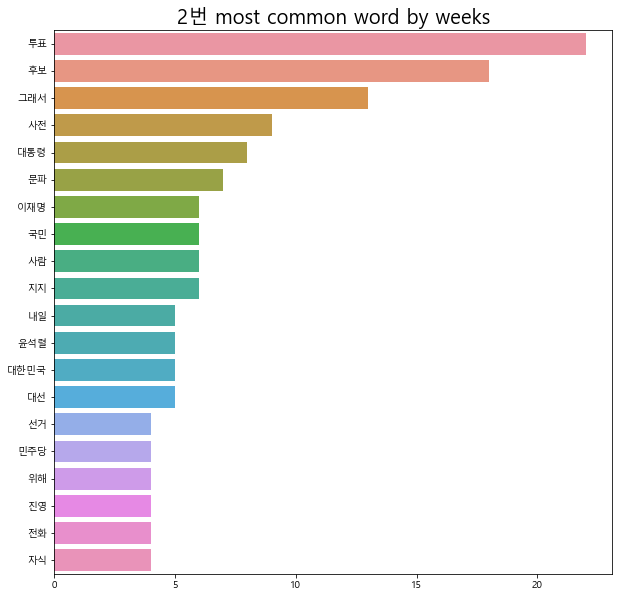

In [156]:
def weekly_distribution(w_tokenized):
    n_corpus = [] 
    for t in w_tokenized:
        for j in t:
            if j not in stop_words:
                n_corpus.append(j) #mecab에서 명사 추출

    count = collections.Counter(n_corpus) 
    most = count.most_common() #빈도 수 순으로 추출 
    x, y= [], [] 
    for word,count in most[:20]: 
        x.append(word) 
        y.append(count)
    plt.rcParams['font.family'] = "Malgun Gothic"
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(10,10)) 
    plt.title('2번 most common word by weeks', fontsize=20)
    sns.barplot(x=y,y=x)


for i in w_tokenized:
    weekly_distribution(i)

In [161]:
w_why1 = number2[number2['Text'].str.contains('김기태')].reset_index(drop=True)
dfi.export(w_why1.style.background_gradient(cmap='Reds'), './graph\images/2번 weekly why 김기태.png', max_cols=-1, max_rows=-1)
w_why1

C:\Users\USER\anaconda3\envs\twitterscrape\lib\site-packages\dataframe_image\_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'


,Unnamed: 0,Datetime,Username,Like Count,Text,pred
0,124,2022-02-28,yjs081013,1,2. .월. 9: 싱어게인2 파이널 문자투표 김기태 2번 #김기태_2번 #...,1
1,127,2022-02-28,rnr1987,0,【 #량하효과 】 나 #복면가왕 때도 함께해준 울기태형~ 오늘 #싱어게인2 생방송...,1
2,221,2022-02-24,yjs081013,2,예전 수퍼스타 허각님 이후로 완전 내원픽된 호 김기태님 정말 이번에 큰 일 내실...,0


In [165]:
w_why2 = pd.DataFrame(weekly_df3, columns=['Datetime', 'Username', 'Like Count','Text','pred'])
w_why2 = w_why2[w_why2['Text'].str.contains('문파')].reset_index(drop=True)
dfi.export(w_why2.style.background_gradient(cmap='Reds'), './graph\images/2번 weekly why 문파.png', max_cols=-1, max_rows=-1)

w_why2.style.background_gradient(cmap='Reds')

C:\Users\USER\anaconda3\envs\twitterscrape\lib\site-packages\dataframe_image\_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'


,Datetime,Username,Like Count,Text,pred
0,2022-03-01,kapuchi14796891,8,_ _ 옳은 길이라고 믿기에 가고있습니다 깨문파들 어리석지 않아요 흔들리지 않고 굽히지도 않겠습니다 소중한 한표 사람에게 투표할 것 입니다 단장님께서 용기를 주셨습니다 2번엔_2번_윤석열,0
1,2022-03-01,flowergen85,0,보수진보 대통합 진영파괴_2번_윤석열 문파니까_2번_윤석열,0
2,2022-02-27,sunnyhwany0094,6,저 또한 서초동 출근부 찍으며 신랑한테 모르면 말을 말라고 구박만 했는데 요즘 입장이 0도 바뀌어 놀림만 당합니다 윤석열을 구속하라 하더니 이젠 윤석열을 대통령으로 만들겠다며 설치고 다니냐며 이게 다 이재명 너 때문인 줄 알아라 2번엔_윤석열 문파라서_2번_윤석열,1
3,2022-02-26,dlwoaudrotorl,21,문파라서 2번 뽑습니다 아시겠습니까 달봉이 보면서 눈물이 난다 나한테 이런 선택을 하게한 민주당 용서 못한다 문파라면_2번,0
4,2022-02-26,Hayyojuju,7,요즘 정상으로 보이는 조선 에 등장한 문파라서_2번,1
5,2022-02-24,lehlovey0,0,빨리 치워지길 2번엔_2번_윤석열 문파 힘내자,1
6,2022-02-23,restart20220309,17,서글픈 문파들이여 과거의 미련을 버리시라 미래의 미련도 버리시라 현재의 작은 희망이 우리의 서글픔을 위로하리니 그는 윤석열이어라 우리의 서글픔이 분노가 되고 우리의 분노가 희망이 되어 거대한 횃불로 타오르리니 우리의 얼굴에 웃음을 안겨 줄 그는 윤석열이어라 2번엔_2번_윤석열,0
7,2022-02-23,miokida,2,문파는_내표_내맘 2번엔_2번_윤석열,0


In [158]:
w_why2 = weekly_df3[weekly_df3['Text'].str.contains('이재명')].reset_index(drop=True)


,Datetime,Username,Like Count,Text,pred,Tokenized
0,2022-03-01,dnflskfk365,58,내 사랑하는 우리나라를 이재명패거리들에게 먹힐 수 없다 그래서 나는 2번_윤석열 을...,0,"[사랑, 우리나라, 이재명, 패거리, 먹힐, 그래서, 대통령]"
1,2022-02-28,dong73dong,5,먼거리에 사는 동생에게 전화했다 이번 선거 내 말 끝나기도 전에 동생 왈 ...,0,"[거리, 동생, 전화, 선거, 동생, 이재명, 이재명, 예전, 하도, 민주당, 영업..."
2,2022-02-28,7mzdpBckxrIhhye,0,_ 나라와 국민은 안중에도 없고 사익에 눈이 멀어 피흘려 쟁취한 대통령중심제를 ...,1,"[나라, 국민, 안중, 사익, 흘려, 쟁취, 대통령, 중심, 의원, 내각, 바꾸, ..."
3,2022-02-27,sunnyhwany0094,6,저 또한 서초동 출근부 찍으며 신랑한테 모르면 말을 말라고 구박만 했는데 요즘 입...,1,"[또한, 서초동, 출근부, 신랑, 모르, 구박, 요즘, 입장, 바뀌, 놀림, 당합니..."
4,2022-02-27,7jh9fj6BPXMcNsY,10,2 하루백번복붙 이재명_망신 이재명...,1,"[하루, 번복, 이재명, 망신, 재명, 파이낸셜, 타임즈, 망신, 재명, 부정, 선..."
5,2022-02-26,qin74116,2,2 하루백번복붙 ...,1,"[하루, 번복, 이재명, 이재명, 부정, 선거, 이재명, 게이트, 대장동, 비리, ..."
6,2022-02-26,7mzdpBckxrIhhye,0,통진당 경기동부연합 용성총련 조폭 간접연쇄살인마 전과4범 단군이래 희대의 사기...,0,"[통진, 경기, 동부, 연합, 성총, 조폭, 간접, 연쇄, 살인마, 전과, 단군, ..."
7,2022-02-26,7mzdpBckxrIhhye,5,찢 나라와 국민은 안중에도 없고 사리사욕에 눈이 먼 조폭 간접연쇄살인마 전과4범 ...,0,"[나라, 국민, 안중, 사리사욕, 조폭, 간접, 연쇄, 살인마, 전과, 사사오입, ..."
8,2022-02-25,miokida,3,미친놈이 나라망신 시키고 있어 2번엔_2번_윤석열 이재명_,1,"[미친, 나라, 망신, 시키, 이재명]"
9,2022-02-25,7mzdpBckxrIhhye,0,_ 조폭정당 괴물정당 썩은사과 이재명과 이재명민주당은 국민이 버렸다 이재명_대장...,0,"[조폭, 정당, 괴물, 정당, 사과, 이재명, 이재명, 민주당, 국민, 버렸, 이재..."


## EDA 분석
- 탐색적 데이터 분석 (EDA - Exploratory Data Analysis)
- 데이터를 분석하기 전에 데이터의 특성을 관찰하고 이해하는 단계

#### 국민의힘


In [173]:
eda_1 = number2[number2['Text'].str.contains('민주당')]
# dfi.export(eda_1.style.background_gradient(cmap='Reds'), './graph\images/1번 여자 EDA Table.png', max_cols=-1, max_rows=-1)

eda_1.style.background_gradient(cmap='Reds')

,Unnamed: 0,Datetime,Username,Like Count,Text,pred
5,5,2022-03-09,worldcutyjimin,2,#2번엔_2번_윤석열 #민주당응징 #이재명_감옥,0
6,6,2022-03-09,orangezzitkiler,4,빨리 이 짤 보고 싶네요 가피우스 #2번 #윤석열 #이재명감옥 #민주당좋됨,1
58,62,2022-03-04,taesooni,1,편치 않지만 그래도 옳은 일이고 대한민국의 미래를 위한 선택이라 믿고 행했습니다 하고나니 마음은 편해졌습니다 #민주당원이다_그래도_2번_찍었다,1
59,63,2022-03-04,yJ4s3gyQeouoiWD,1,문파라면 2번을 찍자 #윤석열 #2번 #민주당 년 당원이,1
98,106,2022-03-02,bh5742,24,년 대선 년 대선 문재인 후보를 지지하고 소중한 한표를 행사 했다 민주당 후보라서가 아니라 문재인 후보였기 때문에 지지했다 년 대선은 #2번_윤석열 후보로 정했다 국민의힘 후보라서가 아니라 윤석열 후보 이기에 선택하고 지지하는 것임 진영과 이념을 넘어 통합의 대한민국을 위해,0
114,122,2022-02-28,dong73dong,5,먼거리에 사는 동생에게 전화했다. '이번 선거~ ' 내 말 끝나기도 전에 동생 왈 '이재명 안찍어~! 나한테 이재명찍으라 하지마' 내가 예전에 하도 민주당 영업하고 다녀서 이재명 찍으라고 전화한줄 알았댄다 . 오랫만에 의기투합~! #우리가족은_대동단결_2번엔_2번,0
120,129,2022-02-28,7mzdpBckxrIhhye,0,_ 나라와 국민은 안중에도 없고 사익에 눈이 멀어 피흘려 쟁취한 대통령중심제를 의원내각제로 바꾸려는 조폭정당 괴물정당 썩은사과 민주주의를 짓밟은 이재명과 이재명민주당을 투표로 심판해주세요!!🙏🙏 #2번엔_2번_윤석열🙏🙏,1
138,149,2022-02-27,Tree_Star58,6,"어처구니 없는 호남의 선택, ‘약무호남(若無湖南) 시무국가(是無國家)', 헛소리 아니길 바랄 뿐. 민주당원의 2번 선택은 나라 살리는 고육지책입니다. 호남을 믿고 싶습니다.",0
146,158,2022-02-26,dlwoaudrotorl,21,)문파라서 2번 뽑습니다 아시겠습니까? 달봉이 보면서 눈물이 난다 나한테 이런 선택을 하게한 민주당 용서 못한다 #문파라면_2번,0
161,174,2022-02-26,7mzdpBckxrIhhye,0,통진당 경기동부연합 용성총련 조폭 간접연쇄살인마 전과4범 단군이래 희대의 사기꾼 범죄자 썩은사과 이재명과 이재명민주당은 국민이 꼭 무기징역과 사망선고로 투표심판할거다!!👎👎 동지 희망님💙 환영합니다!!👍👍💙❤️2️⃣2️⃣🇰🇷 #2번엔_2번_윤석열 #2번엔_대통령_윤석열👍👍,0


In [174]:
# 형태소분석 및 명사 카운터 
okt = Okt()
text = str(eda_1['Text'].values)
nouns = okt.nouns(text) # 명사만 추출
words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외
c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함
c


Counter({'보고': 2,
         '우스': 1,
         '일이': 1,
         '대한민국': 2,
         '미래': 1,
         '선택': 5,
         '마음': 1,
         '파라': 2,
         '당원': 1,
         '대선': 4,
         '문재인': 4,
         '후보': 10,
         '지지': 4,
         '행사': 1,
         '민주당': 31,
         '라서': 2,
         '때문': 1,
         '국민': 16,
         '윤석열': 4,
         '이기': 1,
         '것임': 1,
         '진영': 1,
         '이념': 1,
         '통합': 1,
         '위해': 3,
         '거리': 1,
         '동생': 2,
         '이번': 2,
         '선거': 3,
         '이재명': 39,
         '예전': 1,
         '영업': 1,
         '의기': 1,
         '투합': 1,
         '나라': 5,
         '안중': 1,
         '사익': 1,
         '쟁취': 1,
         '대통령중심제': 1,
         '의원내각제': 1,
         '조폭': 11,
         '정당': 12,
         '괴물': 7,
         '사과': 10,
         '민주주의': 1,
         '투표': 8,
         '심판': 8,
         '어처구니': 1,
         '호남': 4,
         '시무': 1,
         '국가': 1,
         '헛소리': 1,
         '달봉': 1,
         '눈물': 2,
   

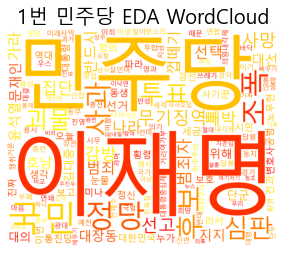

In [194]:
wc = WordCloud(font_path= 'malgun',stopwords=stop_words,background_color ='white', colormap='autumn', width=1000, height=800, scale=2.0, max_font_size=500)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.axis("off")
plt.title('1번 민주당 EDA WordCloud', fontsize=20)
plt.imshow(gen)
plt.show()


In [184]:
eda_1['pred'].value_counts()

0    24
1    11
Name: pred, dtype: int64

C:\Users\USER\AppData\Local\Temp\ipykernel_18884\1891864320.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda_1['Length'] = eda_1['Text'].apply(length)
C:\Users\USER\anaconda3\envs\twitterscrape\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


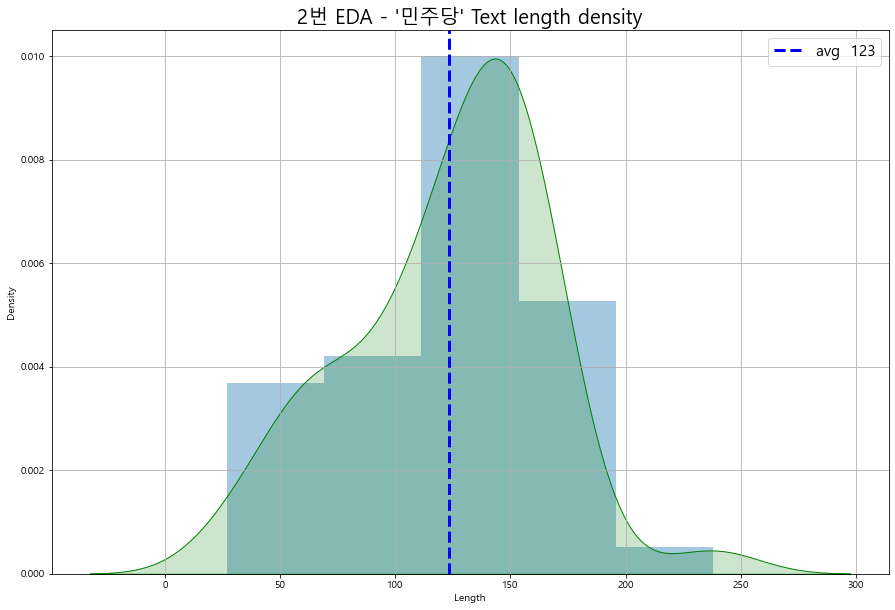

In [206]:
''' 문장 데이터 밀집 분석 '''
#Number of characters in tweets
def length(text):    
    '''a function which returns the length of text'''
    return len(text)
eda_1['Length'] = eda_1['Text'].apply(length)
eda_1
plt.figure(figsize=(15,10))
plt.grid()
sns.distplot(a= eda_1['Length'], bins=5, kde=True, kde_kws={"color":"g", "alpha":0.2, "linewidth":1, "shade":True})
x_label = int(np.average(eda_1['Length']))
plt.axvline(x=np.average(eda_1['Length']), color='b', linestyle='--', linewidth=3, label=f'avg  {x_label}')
plt.legend(fontsize=15)
plt.title("2번 EDA - '민주당' Text length density", fontsize=20)

plt.show()
# save_fig('Text length distribution')

In [188]:
eda_1['Length'].describe()

count     35.000000
mean     108.942857
std       39.152750
min       27.000000
25%       77.500000
50%      123.000000
75%      140.000000
max      157.000000
Name: Length, dtype: float64

In [204]:
eda_1 = number2[number2['Text'].str.contains('이재명')]
eda_like10 = eda_1[eda_1['Like Count'] >=10].reset_index(drop=True)

dfi.export(eda_like10.style.background_gradient(cmap='Reds'), './graph\images/1번 이재명 좋아요10건이상 EDA Table.png', max_cols=-1, max_rows=-1)

eda_like10.style.background_gradient(cmap='Reds')


,Unnamed: 0,Datetime,Username,Like Count,Text,pred
0,54,2022-03-05,kyoko1600,10,"여기 경남 함안 촌구석에 사시는 평생 1번만 찍어오신 찐보수 안영감님. 친한 문파동생 아부지신데 방금 이렇게 말씀하셨다고 함. ""느그 문꿀오소리들은 이재명 당선되면 보복당한다이"" 어디서 뭘 듣고 오신겐지... 너무 정확히 꿰뚫고 계셔서 소름돋는다 그래서 이번에는 #2번 딸을 위해서라도",0
1,117,2022-03-01,dnflskfk365,58,내 사랑하는 우리나라를 이재명패거리들에게 먹힐 수 없다. 그래서 나는 #2번_윤석열 을 대통령으로 뽑을거다.,0
2,155,2022-02-27,7jh9fj6BPXMcNsY,10,#2/ 하루백번복붙 # # #이재명_망신 #이재명_파이낸셜타임즈망신 #이재명_부정선거 #이재명_게이트 #대장동주범이재명 #대장동비리개발결재권자이재명수사 #윤석열_지지선언 #윤석열찍고_이재명퇴치하자 #윤석열찍으면이재명감옥간다 #나를위해윤석열 #2번엔_2번_윤석열,1
3,192,2022-02-25,jinyeongkim2002,13,¦‾ ‾ ‾ ‾ ‾ ‾ ‾ ‾ ‾ ‾ ‾ ‾ ‾ ‾ ¦ ¦ #극문_똥파리는_2번 ¦ ¦ #이재명_절대_안찍어¦ ¦_ _ _ _ _ _ _ _ _ _ _ __ _ _¦ ∖ ∕ ∖ 🧢 ∕ 0(👀)0 👔 👖 👟👟,0
4,203,2022-02-24,7mzdpBckxrIhhye,13,_ 이재명민주당은 이재명이 나서서 국민이 경악할 조폭같은 무시무시한 욕을 해댔다!!😱😱 좌적폐범죄당 조폭정당 괴물정당 썩은사과 이재명과 이재명민주당은 끝났다!!👎👎 #2번엔_2번 #2번엔_2번_윤석열 #2번엔_대통령_윤석열👍👍,0
5,210,2022-02-24,7mzdpBckxrIhhye,10,국민의 세금과 땅을 횡령한 단군이래 희대의 역대급 범죄자 조폭 전과4범 범죄자 이재명찢🐕. 전재수 너의 추악한 입으로 거론할 김대중대통령님이 아니시다!! 조폭정당 괴물정당 썩은사과 이재명과 이재명민주당은 끝났다!!👎👎 김대중정신을 잇는 윤석열!! #2번엔_2번_윤석열,0
6,234,2022-02-23,flowergen85,16,_ _ 그래...극문똥파리는 내표 알아서 찍을게~ 별 미친년을 다 본다. #이재명절대안찍어 #2번엔_2번_윤석열,0
7,241,2022-02-23,restart20220309,34,"📢민주당은 똑똑히 들어라 (+친이낙연계 포함) 김대중.노무현.문재인대통령 세 분의 자존심을 지키기 위해서라도 이재명 같은 건 절대 안 찍을거고, 우리의 피눈물을 딱아줄 윤석열 찍을거다. #이재명절대안찍어 #2번엔_2번_윤석열 #대장동설계인허가권자는_이재명이다",0
8,274,2022-02-21,lalapesto,140,"최배근 “한은이 돈을 마구 찍어서 물가가 0배 상승했다고 하면 돈 0억 원 가진 사람은 돈의 실질가치가 1억 원으로 줄지만 돈이 없는 사람은 피해가 없다 돈 없는 사람은 돈을 확보하게 해야 한다"" 이재명 책사 최배근이 진짜 젤 무서움 뭐 돈 확보해서 베네수엘라 하라고? #나라지키려면_2번",1


C:\Users\USER\anaconda3\envs\twitterscrape\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


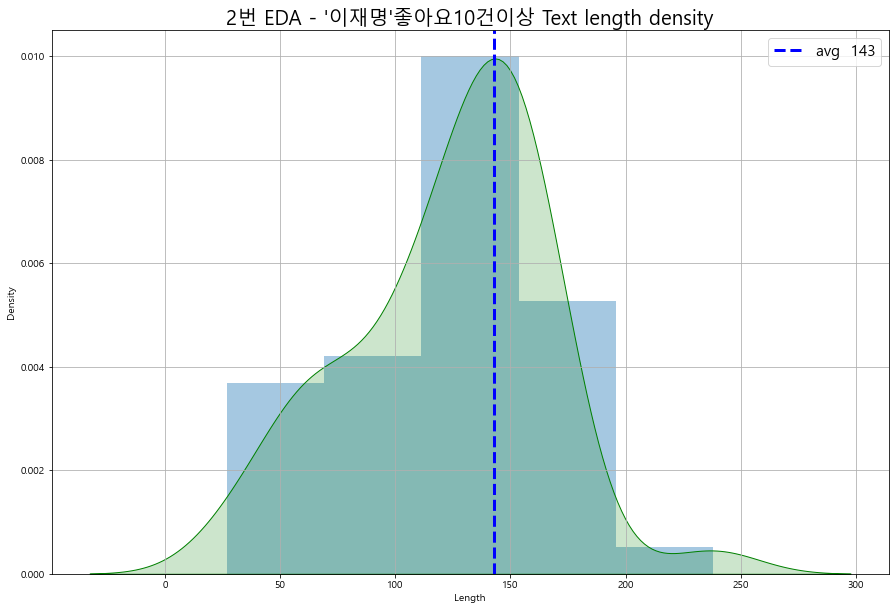

In [207]:
eda_like10['Length'] = eda_like10['Text'].apply(length)
eda_like10
plt.figure(figsize=(15,10))
plt.grid()
sns.distplot(a= eda_1['Length'], bins=5, kde=True, kde_kws={"color":"g", "alpha":0.2, "linewidth":1, "shade":True})
x_label = int(np.average(eda_like10['Length']))
plt.axvline(x=np.average(eda_like10['Length']), color='b', linestyle='--', linewidth=3, label=f'avg  {x_label}')
plt.legend(fontsize=15)
plt.title("2번 EDA - '이재명'좋아요10건이상 Text length density", fontsize=20)

plt.show()
# save_fig('Text length distribution')

In [208]:
eda_like10['Length'].describe()

count      9.000000
mean     143.000000
std       54.722025
min       60.000000
25%      128.000000
50%      150.000000
75%      165.000000
max      238.000000
Name: Length, dtype: float64

In [212]:
# 형태소분석 및 명사 카운터 
okt = Okt()
text = str(eda_like10['Text'].values)
nouns = okt.nouns(text) # 명사만 추출
words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외
c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함
c

Counter({'여기': 1,
         '경남': 1,
         '함안': 1,
         '구석': 1,
         '사시': 1,
         '평생': 1,
         '번만': 1,
         '보수': 1,
         '영감': 1,
         '동생': 1,
         '아부지': 1,
         '방금': 1,
         '말씀': 1,
         '오소리': 1,
         '이재명': 11,
         '당선': 1,
         '보복': 1,
         '겐지': 1,
         '소름': 1,
         '이번': 1,
         '사랑': 1,
         '우리나라': 1,
         '패거리': 1,
         '대통령': 3,
         '하루': 1,
         '번복': 1,
         '민주당': 4,
         '국민': 2,
         '경악': 1,
         '조폭': 4,
         '범죄': 1,
         '정당': 4,
         '괴물': 2,
         '사과': 2,
         '세금': 1,
         '횡령': 1,
         '단군': 1,
         '대의': 1,
         '역대': 1,
         '범죄자': 2,
         '전과': 1,
         '전재수': 1,
         '거론': 1,
         '김대중': 3,
         '정신': 1,
         '윤석열': 2,
         '똥파리': 1,
         '이낙연': 1,
         '포함': 1,
         '노무현': 1,
         '문재인': 1,
         '자존심': 1,
         '절대': 1,
         '우리': 1,
         '

In [215]:
# 대표단어 삭제
# ignore = ['남자','번녀','웅웅', '아스트로','로하','오프', '진짜','번남번남', '이번', '지금', '우리', '번남', '정말','때문','사실', '오늘','한다', '세요', '합니다', '입니다', 'ㅋㅋㅋ', 'ㅋㅋ','진짜', '아니', '근데', '그냥', '라고', '한다고', '해서', '이런', '어차피', '버리', '된다는','생겼', '인데', '해도', '된다', '이거'] #제거할 불필요한 단어 및 표현 리스트
ignore = ['이재명', '윤석열', '번']
for word in ignore:
    if word in c:
        del c[word] #위에서 정한 불필요한 단어 및 표현 리스트에 속한 단어 및 표현을 제거

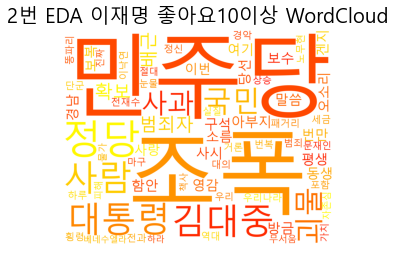

In [217]:

wc = WordCloud(font_path= 'malgun',stopwords=stop_words,background_color ='white', colormap='autumn', width=1000, height=800, scale=2.0, max_font_size=500)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.axis("off")
plt.title('2번 EDA 이재명 좋아요10이상 WordCloud', fontsize=20)
plt.imshow(gen)
plt.show()



### 감성분석

In [218]:
print(number2['pred'].describe())
number2['pred'].value_counts()

count    277.000000
mean       0.610108
std        0.488608
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: pred, dtype: float64


1    169
0    108
Name: pred, dtype: int64

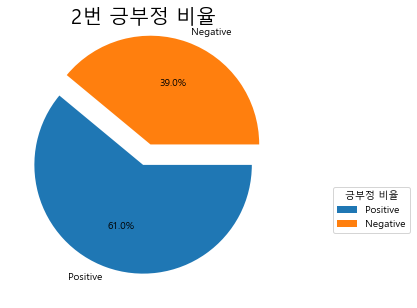

In [219]:
plt.rcParams['font.family'] = "Malgun Gothic"
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(5,5)) 
plt.title('2번 긍부정 비율', fontsize=20)
plt.pie(number2['pred'].value_counts(), autopct='%0.1f%%', labels=['Positive','Negative'], counterclock=False, explode = [0, 0.2])
plt.legend(loc = (1.2, 0.25), title = '긍부정 비율')


##### 긍정

In [ ]:
pos_df = number2[number2['pred']==1].reset_index(drop=True) #긍정
# #그룹핑 사용시 
# number1.groupby('pred').get_group(1) #긍정
print(pos_df.info())
dfi.export(pos_df.style.background_gradient(cmap='Reds'), './graph\images/2번 긍정분석 Table.png', max_cols=-1, max_rows=-1)

pos_df.style.background_gradient(cmap='Reds')

In [222]:
pos_df_like_top20 = pos_df[pos_df['Like Count'] >= 20].sort_values(["Like Count"], ascending=[True]).reset_index(drop=True)
dfi.export(pos_df_like_top20.style.background_gradient(cmap='Reds'), './graph\images/2번 긍정 좋아요 20이상 Table.png', max_cols=-1, max_rows=-1)

pos_df_like_top20.style.background_gradient(cmap='Reds')


,Unnamed: 0,Datetime,Username,Like Count,Text,pred
0,50,2022-03-05,lehlovey0,21,_ #2번엔_2번_윤석열,1
1,297,2022-02-16,cocomong337,22,#윤더조이 #일반인을_단한번도_고발한적이없는_2번_윤석열 서초동 검찰청앞 집회때 집회하는 시민들을 시위하게 내버려뒀던 윤석열 이런 사람인데 정치보복 안합니다,1
2,61,2022-03-04,moda126917,24,난 인물 봅니다 #2번‼️ 😜😝 1번은 암만봐도 사기꾼 상 😨,1
3,95,2022-03-02,bh5742,26,윤석열 후보 오늘 토론회 몇일전 문프가 하신 넥타이랑 같은색 이네용^^ 그래서 무조건 #2번_윤석열 입니다,1
4,236,2022-02-23,bh5742,29,윤석열 후보는 언행일치가 됨 대통령깜이 됨 진영을 넘고 이념을 넘어 평화의 시대 #2번엔_2번_윤석열,1
5,254,2022-02-22,ba1675510,29,죄명이 처벌받고 감옥 가는 것 꼭 보고싶다 #2번에는_2번_윤석렬로_가는거야,1
6,25,2022-03-08,sunnyhwany0094,38,"1. 자식을 개 같이 키운 후보 2. 개를 자식 같이 키운 후보 개 같이 키운 자식은 사회 악이며, 선량한 시민에게 에게 해 를 끼치게 됩니다. 그래서 나는 개를 자식처럼 키운 #토리아빠_선택 할 겁니다. #2번 에도 사람에게 투표 할 겁니다.",1
7,213,2022-02-24,lead_off,64,당보다 사람이 먼저입니다. 진영보다 나라가 먼저입니다. #2번엔_2번_윤석열,1
8,59,2022-03-04,qDwvgsmAjVaeqT8,66,#2번 에 투표하시면 재명이 깜방가는 문이 열립니다.,1
9,96,2022-03-02,bh5742,117,문재인 대통령님 말씀 처럼 보수 진보 이분법적 시대는 지났고 이념을 넘어 대한민국이 통합하는 미래로 나아 가길 간절히 바라는 마음으로 #2번_윤석열 후보를 지지합니다 문파는 평화를 사랑하고 옳음의 가치를 따르고 의리있는 사람을 좋아 합니다,1


Counter({'윤석열': 26, '후보': 21, '국민': 20, '투표': 20, '사람': 13, '위해': 12, '대통령': 12, '이재명': 12, '진영': 10, '지지': 10, '나라': 10, '사전투표': 8, '민주당': 8, '오늘': 7, '대한민국': 6, '문재인': 6, '고생': 6, '반드시': 5, '선택': 5, '통합': 5, '보고': 4, '내일': 4, '자식': 4, '시민': 4, '지역': 4, '응원': 4, '우리': 4, '댓글': 4, '마음': 4, '이번': 4, '평화': 4, '정당': 4, '선언': 4, '적극': 4, '먼저': 4, '검사': 3, '정치': 3, '선거': 3, '범죄': 3, '미래': 3, '출처': 3, '네이버': 3, '번은': 3, '무조건': 3, '처럼': 3, '사랑': 3, '아빠': 3, '문자': 3, '조폭': 3, '심판': 3, '간다': 3, '대선': 3, '차돌': 3, '정부': 3, '도덕성': 3, '속보': 3, '모임': 3, '둘리': 3, '무기징역': 3, '감방': 3, '빼박': 3, '누가': 3, '이동': 3, '진짜': 3, '모든': 2, '처벌': 2, '말씀': 2, '흉악': 2, '전쟁': 2, '선포': 2, '포스': 2, '합법': 2, '드럼통': 2, '오직': 2, '모두': 2, '영업': 2, '열망': 2, '타고': 2, '중앙': 2, '일보': 2, '정말': 2, '삭제': 2, '기호': 2, '인물': 2, '암만': 2, '사기꾼': 2, '일이': 2, '진보': 2, '시대': 2, '이념': 2, '가치': 2, '언어': 2, '또한': 2, '토리': 2, '정도': 2, '만세': 2, '품위': 2, '구속': 2, '괴물': 2, '사과': 2, '민주주의': 2, '하늘': 2, '전과': 2, '일체': 2, '형수': 2, '쌍욕': 2, '막말': 2

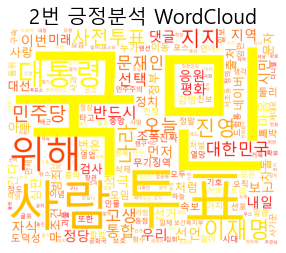

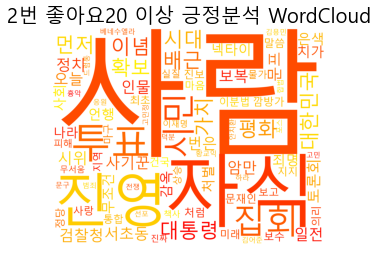

In [226]:
# 형태소분석 및 명사 카운터 
okt = Okt()
text_pos = str(pos_df['Text'].values)
like20_text_pos = str(pos_df_like_top20['Text'].values)
nouns = okt.nouns(text_pos) # 명사만 추출
like20_nouns = okt.nouns(like20_text_pos) # 명사만 추출

words_pos = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외
like20_words_pos = [n for n in like20_nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

c_pos = Counter(words_pos) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함
like20_c_pos = Counter(like20_words_pos)
print(c_pos, like20_c_pos)

# 대표단어 삭제
# ignore = ['남자','번녀','웅웅', '아스트로','로하','오프', '진짜','번남번남', '이번', '지금', '우리', '번남', '정말','때문','사실', '오늘','한다', '세요', '합니다', '입니다', 'ㅋㅋㅋ', 'ㅋㅋ','진짜', '아니', '근데', '그냥', '라고', '한다고', '해서', '이런', '어차피', '버리', '된다는','생겼', '인데', '해도', '된다', '이거'] #제거할 불필요한 단어 및 표현 리스트
ignore = ['윤석열','후보']
for word in ignore:
    if word in c_pos:
        del c_pos[word] #위에서 정한 불필요한 단어 및 표현 리스트에 속한 단어 및 표현을 제거
        
for like20_word in ignore:
    if like20_word in like20_c_pos:
        del like20_c_pos[like20_word] #위에서 정한 불필요한 단어 및 표현 리스트에 속한 단어 및 표현을 제거

wc = WordCloud(font_path= 'malgun',stopwords=stop_words,background_color ='white', colormap='autumn', width=1000, height=800, scale=2.0, max_font_size=1000)
pos_gen = wc.generate_from_frequencies(c_pos)
plt.figure()
plt.axis("off")
plt.title('2번 긍정분석 WordCloud', fontsize=20)
plt.imshow(pos_gen)
plt.show()

like20_pos_gen = wc.generate_from_frequencies(like20_c_pos)
plt.figure()
plt.axis("off")
plt.title('2번 좋아요20 이상 긍정분석 WordCloud', fontsize=20)
plt.imshow(like20_pos_gen)
plt.show()



##### 부정

In [227]:
neg_df = number2[number2['pred']==0].reset_index(drop=True) #긍정
# #그룹핑 사용시 
# number1.groupby('pred').get_group(1) #긍정
print(neg_df.info())
dfi.export(neg_df.style.background_gradient(cmap='Reds'), './graph\images/2번 부정분석 Table.png', max_cols=-1, max_rows=-1)

neg_df.style.background_gradient(cmap='Reds')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  108 non-null    int64 
 1   Datetime    108 non-null    object
 2   Username    108 non-null    object
 3   Like Count  108 non-null    int64 
 4   Text        108 non-null    object
 5   pred        108 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 5.2+ KB
None


C:\Users\USER\anaconda3\envs\twitterscrape\lib\site-packages\dataframe_image\_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'


,Unnamed: 0,Datetime,Username,Like Count,Text,pred
0,2,2022-03-09,the_b017,2,;- 1번 뽑혔을때 2번 뽑혔을때- ;,0
1,3,2022-03-09,2needukjeel,0,뭐 먹을까? 고민된다 일단 2렇게 즐겨본다 #2번_윤석열,0
2,5,2022-03-09,worldcutyjimin,2,#2번엔_2번_윤석열 #민주당응징 #이재명_감옥,0
3,7,2022-03-09,makgang,0,#윤석열 되면 #유리천장 절대 안깨진다. 여성들이 #2번 찍는 것은 스스로 발목 잡는거,0
4,10,2022-03-09,ddochi_2,7,"원래 약점많고 부패한 사람은 부패한 사람 좋아합니다 ""다 집어 넣어요욬~"" 몇번을 들어도 빵터진다 우렁찬 아주머니들 짱✌️✌️✌️ 잠깐이었지만~ 국힘당 아주머니들과 찢빠들 욕 무진장 하고 옴🤭 #투표하세요 #문파라서_2번 ✌️✌️✌️",0
5,14,2022-03-08,lehlovey0,1,연예인인줄. 그동안 오해해서 죄송스럽네. #2번엔_2번_윤석열 앞으로도 지금처럼 조용히 내조하시길.,0
6,16,2022-03-08,sincere_astral,6,오호!!!👍 저도 닉네임에 ;악귀퇴치 ; 넣었습니다^^ 닉네임설정도 바꿀수 있는 트윗초년생인 저는 #2번에_2길_2번 #정치초년생_트위터생초보 #윤석열지지합니다 ✋ 더레프트님 고생많으셨어요 너무너무너무 감사합니다 ❤🧡💛💚💙😍💜,0
7,19,2022-03-08,2needukjeel,1,얼굴 썩었네 내일 밤 1차로 치유 받는 날이닷! 프로 넘게 이겨라 #2번_윤석열,0
8,21,2022-03-08,kapuchi14796891,0,열번을 물으셔도 전 #2번 입니다. 좋아서 하는거 아닙니돠.,0
9,22,2022-03-08,kapuchi14796891,2,허수아비를 대통으로 뽑을순 없습니다. 진영을 넘어 지역을 넘어 #2번엔_2번.,0


In [228]:
neg_df_like_top20 = neg_df[neg_df['Like Count'] >= 20].sort_values(["Like Count"], ascending=[True]).reset_index(drop=True)
dfi.export(neg_df_like_top20.style.background_gradient(cmap='Reds'), './graph\images/2번 부정 좋아요 20이상 Table.png', max_cols=-1, max_rows=-1)

neg_df_like_top20.style.background_gradient(cmap='Reds')


,Unnamed: 0,Datetime,Username,Like Count,Text,pred
0,301,2022-02-15,cocomong337,20,윤석열 영업은 나의 생사가 달린 문제가 됏다 #내가_살기위해서_2번_윤석열 #단한번도_시민들을_고발한적이없는_2번_윤석열 #국가미래를_말하고있는_2번_윤석열,0
1,158,2022-02-26,dlwoaudrotorl,21,)문파라서 2번 뽑습니다 아시겠습니까? 달봉이 보면서 눈물이 난다 나한테 이런 선택을 하게한 민주당 용서 못한다 #문파라면_2번,0
2,26,2022-03-08,lehlovey0,22,평범하고 상식껏 살아온 내가. 전과4범에 쌍욕을 하는 쓰레기를?? 내 자존감을 후려치는 후보를?? 니들 그러는거 아냐. 절박?? 간절?? 웃기고 있네. 니들이 못하면 할 수 없지~ 간다~~ #2번엔_2번_윤석열,0
3,272,2022-02-22,ba1675510,22,한국에 있는 정치에 별 관심없다는 지인과의 통화에서도 이죄명은 정말 큰일 낼 넘이라고 너무도 극혐하는 종자라고 말하더라 #2번에는_2번_윤석렬로_가는거야,0
4,126,2022-02-28,ba1675510,23,코리언 사이코 곧 감옥 가야지 #2번에는_2번_윤석렬로_투표,0
5,106,2022-03-02,bh5742,24,년 대선 년 대선 문재인 후보를 지지하고 소중한 한표를 행사 했다 민주당 후보라서가 아니라 문재인 후보였기 때문에 지지했다 년 대선은 #2번_윤석열 후보로 정했다 국민의힘 후보라서가 아니라 윤석열 후보 이기에 선택하고 지지하는 것임 진영과 이념을 넘어 통합의 대한민국을 위해,0
6,183,2022-02-25,ba1675510,30,에휴 저 악귀색히 또 문프 이미지 도용해 썼네 혐오감만 더 생기게 하는 저 짓 이젠 그만 보고싶다 #2번엔_2번_윤석렬_대통령 #재명이는_감방가자,0
7,30,2022-03-07,ya0248,32,대장동 몸통이 누군지 궁금하시죠? 이번에는 #2번 찍으면 분명해 집니다 몸통이 누군지 그래서 #2번입니다.,0
8,241,2022-02-23,restart20220309,34,"📢민주당은 똑똑히 들어라 (+친이낙연계 포함) 김대중.노무현.문재인대통령 세 분의 자존심을 지키기 위해서라도 이재명 같은 건 절대 안 찍을거고, 우리의 피눈물을 딱아줄 윤석열 찍을거다. #이재명절대안찍어 #2번엔_2번_윤석열 #대장동설계인허가권자는_이재명이다",0
9,191,2022-02-25,ba1675510,37,태어나지 말았어야 할 저 악귀색히를 없애려면 #2번_윤석렬을_찍자,0


Counter({'이재명': 37, '민주당': 23, '후보': 19, '국민': 16, '조폭': 11, '투표': 10, '윤석열': 10, '사과': 10, '정당': 9, '나라': 8, '사람': 7, '이번': 7, '대선': 7, '우리': 7, '심판': 6, '문재인': 6, '대통령': 6, '범죄자': 6, '진영': 5, '범죄': 5, '지지': 5, '정치': 5, '무기징역': 5, '사망': 5, '선고': 5, '괴물': 5, '집단': 5, '껍떼기': 5, '가라': 5, '절대': 4, '지금': 4, '악귀': 4, '전과': 4, '대장동': 4, '때문': 4, '선택': 4, '위해': 4, '풍산개': 4, '호남': 4, '완전': 4, '김대중': 4, '감방': 4, '빼박': 4, '반드시': 4, '얼굴': 3, '지역': 3, '선거': 3, '상식': 3, '사전투표': 3, '보수': 3, '통합': 3, '모두': 3, '동생': 3, '내각제': 3, '청와대': 3, '가야': 3, '영업': 3, '사이코': 3, '비리': 3, '역대': 3, '단군': 3, '대의': 3, '공범': 3, '정신': 3, '정말': 3, '노무현': 3, '아주머니': 2, '그동안': 2, '닉네임': 2, '내일': 2, '차로': 2, '치유': 2, '문자': 2, '지인': 2, '전화': 2, '쓰레기': 2, '간다': 2, '이상': 2, '몸통': 2, '것임': 2, '침묵': 2, '보복': 2, '걱정': 2, '서점': 2, '다시': 2, '이제': 2, '좌우': 2, '무조건': 2, '민영화': 2, '계속': 2, '똥파리': 2, '라서': 2, '진보': 2, '사랑': 2, '예전': 2, '코리언': 2, '감옥': 2, '문프': 2, '이미지': 2, '국가': 2, '파란': 2, '잠바': 2, '눈물': 2, '혐오': 2, '관심': 2, '통진당': 2,

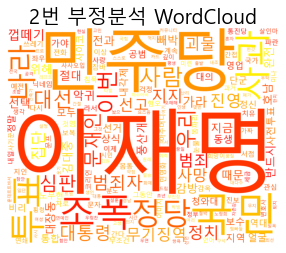

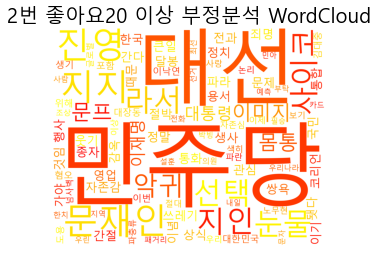

In [229]:
# 형태소분석 및 명사 카운터 
okt = Okt()
text_neg = str(neg_df['Text'].values)
like20_text_neg = str(neg_df_like_top20['Text'].values)
nouns = okt.nouns(text_neg) # 명사만 추출
like20_nouns = okt.nouns(like20_text_neg) # 명사만 추출

words_neg = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외
like20_words_neg = [n for n in like20_nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

c_neg = Counter(words_neg) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함
like20_c_neg = Counter(like20_words_neg)
print(c_neg, like20_c_neg)

# 대표단어 삭제
# ignore = ['남자','번녀','웅웅', '아스트로','로하','오프', '진짜','번남번남', '이번', '지금', '우리', '번남', '정말','때문','사실', '오늘','한다', '세요', '합니다', '입니다', 'ㅋㅋㅋ', 'ㅋㅋ','진짜', '아니', '근데', '그냥', '라고', '한다고', '해서', '이런', '어차피', '버리', '된다는','생겼', '인데', '해도', '된다', '이거'] #제거할 불필요한 단어 및 표현 리스트
ignore = ['윤석열','후보']
for word in ignore:
    if word in c_neg:
        del c_neg[word] #위에서 정한 불필요한 단어 및 표현 리스트에 속한 단어 및 표현을 제거
        
for like20_word in ignore:
    if like20_word in like20_c_neg:
        del like20_c_neg[like20_word] #위에서 정한 불필요한 단어 및 표현 리스트에 속한 단어 및 표현을 제거

wc = WordCloud(font_path= 'malgun',stopwords=stop_words,background_color ='white', colormap='autumn', width=1000, height=800, scale=2.0, max_font_size=1000)
neg_gen = wc.generate_from_frequencies(c_neg)
plt.figure()
plt.axis("off")
plt.title('2번 부정분석 WordCloud', fontsize=20)
plt.imshow(neg_gen)
plt.show()

like20_neg_gen = wc.generate_from_frequencies(like20_c_neg)
plt.figure()
plt.axis("off")
plt.title('2번 좋아요20 이상 부정분석 WordCloud', fontsize=20)
plt.imshow(like20_neg_gen)
plt.show()



# 키워드: 1번남 데이터

In [8]:
number1_men = pd.read_csv('D:\PY4E\DS\snsscrape/1번남_라벨링.csv')
number1_men.describe()

,Unnamed: 0.1,Unnamed: 0,Like Count,pred
count,6398.000000,6398.000000,6398.000000,6398.000000
mean,3198.500000,3274.715067,16.649422,0.124258
std,1847.087843,1894.493884,164.165346,0.329901
min,0.000000,0.000000,0.000000,0.000000
25%,1599.250000,1628.250000,0.000000,0.000000
50%,3198.500000,3282.500000,1.000000,0.000000
75%,4797.750000,4915.750000,3.000000,0.000000
max,6397.000000,6550.000000,5898.000000,1.000000


#### 다중 분석

In [ ]:
number1_men_multi = pd.read_csv('D:\PY4E\DS\snsscrape/1번_라벨링.csv')
number1_multi.describe()

# 키워드: 2번남 데이터

In [9]:
number2_men = pd.read_csv('D:\PY4E\DS\snsscrape/2번남_라벨링.csv')
number2_men.describe()

,Unnamed: 0,Like Count,pred
count,16661.000000,16661.000000,16661.000000
mean,8421.862193,12.846168,0.095312
std,4889.573922,152.266894,0.293655
min,0.000000,0.000000,0.000000
25%,4176.000000,0.000000,0.000000
50%,8400.000000,1.000000,0.000000
75%,12660.000000,2.000000,0.000000
max,16912.000000,8340.000000,1.000000
